In [1]:
import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.cm as cm
from scipy.stats import spearmanr

plt.style.use(astropy_mpl_style)

In [2]:
path = os.path.expanduser('~/notebook/Forrest/')
#Full Sample of 682 with all filters- Parameters
HW=Table.read(os.path.expanduser(path+'FORREST-PARAMETERS.csv')) 
HW=HW.to_pandas()
#EELGs from full sample
path2 = os.path.expanduser('~/Documents/')
comp_ew=Table.read(os.path.expanduser(path2+'comp_ew.dat'),format='ascii')
xy = comp_ew.to_pandas()
xyz = xy[xy['col1']<100000]
stuff = xyz.drop(['col3','col4'],axis=1)
stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)
EELGs=pd.merge(left=stuff['id'], right=HW, left_on='id', right_on='Galaxy_ID')
EELGs=EELGs.drop(['col0','id'],axis=1)
##########################################MAGPHYS DATA###########################################################
#######Full Sample#######
F = Table.read(os.path.expanduser(path+'FINAL-PARAMETERS.csv'), format='ascii')
F=F.to_pandas()
#EELGs
FELG = pd.merge(left=F,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')
#Errorbars
Fers=Table.read(os.path.expanduser(path+'FINAL_ERRORBARS.csv')) 
Fers=Fers.to_pandas()
#######Kband Removed Sample########
FM = Table.read(os.path.expanduser(path+'FINALM-PARAMETERS.csv'), format='ascii')
FM=FM.to_pandas()
#EELGs
FMELG = pd.merge(left=FM,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')
#Errorbars
FMers=Table.read(os.path.expanduser(path+'FINALM_ERRORBARS.csv')) 
FMers=FMers.to_pandas()
###########Tommy#################
T = Table.read(os.path.expanduser(path+'Tommy-Parameters.csv'), format='ascii')
T=T.to_pandas()
##########Unconstrained Sample############
Fun2 = Table.read(os.path.expanduser(path+'Unconstrained-FINAL.csv'), format='ascii')
Fun2=Fun2.to_pandas()
Fun=pd.merge(left=F,right=Fun2['Galaxy_ID'], left_on='Galaxy_ID',right_on='Galaxy_ID')
##########################################ProSpect DATA###########################################################
#######Full Sample#######
S = Table.read(os.path.expanduser('~/Documents/Sample_un.csv'), format='ascii')
S=S.to_pandas()
pd.set_option('display.max_columns', None)
S.sort_values(by=['id'],inplace=True)
S
#EELGs
SELG = pd.merge(left=S,right=EELGs['Galaxy_ID'],left_on='id',right_on='Galaxy_ID')
#######Emission Removed#######
Sem = Table.read(os.path.expanduser('~/Documents/Sample_em_un.csv'), format='ascii')
Sem=Sem.to_pandas()
pd.set_option('display.max_columns', None)
Sem.sort_values(by=['id'],inplace=True)
#EELGs
SemELG = pd.merge(left=Sem,right=EELGs['Galaxy_ID'],left_on='id',right_on='Galaxy_ID')
########################################Bluminosity#############################################################
# B = Table.read(os.path.expanduser(path+'Bluminosity2.csv'),format='ascii')
# B = B.to_pandas()
# B=pd.concat([B,F['Galaxy_ID']],axis=1)
BF = Table.read(os.path.expanduser(path+'Bluminosity-FINAL.csv'), format='ascii')
BF=BF.to_pandas()
BF=pd.concat([BF,F['Galaxy_ID']],axis=1)
BFELG = pd.merge(left=BF,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')

BFM = Table.read(os.path.expanduser(path+'Bluminosity-FINALM.csv'), format='ascii')
BFM=BFM.to_pandas()
BFM=pd.concat([BFM,FM['Galaxy_ID']],axis=1)
BFMELG = pd.merge(left=BFM,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')

BIGM = Table.read(os.path.expanduser(path+'Bluminosity-NOIGM.csv'), format='ascii')
BIGM=BIGM.to_pandas()
BIGM=pd.concat([BIGM,F['Galaxy_ID']],axis=1)
BIGMELG = pd.merge(left=BIGM,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')

BFIGM = Table.read(os.path.expanduser(path+'Bluminosity-FMIGM.csv'), format='ascii')
BFIGM=BFIGM.to_pandas()
BFIGM=pd.concat([BFIGM,FM['Galaxy_ID']],axis=1)
BFIGMELG = pd.merge(left=BFIGM,right=EELGs['Galaxy_ID'],left_on='Galaxy_ID',right_on='Galaxy_ID')

#########Parameters#########
IGM = Table.read(os.path.expanduser(path+'NOIGM-Parameters.csv'), format='ascii')
IGM=IGM.to_pandas()
FMIGM=Table.read(os.path.expanduser(path+'FMIGM-Parameters.csv'), format='ascii')
FMIGM=FMIGM.to_pandas()
# Parameters=[r'SFH $f_{mu}$',r'IR $f_{mu}$',r'$\mu$',r'$\tau_V$',r'sSFR$_{0.1Gyr}$','M(stars)','Ldust',r'$T_C^{ISM}$',r'$T_W^{BC}$',r'$\chi_C^{tot}$',r'$\chi_{PAH}^{tot}$',r'$\chi_{MIR}^{tot}$',r'$\chi_{W}^{tot}$',r'$\tau_{V}^{ISM}$','M(dust)',r'$SFR_{0.1Gyr}$',r'$A_V$',r'$age_M$','Tdust','lg(M/Lh)','lg(M/Lk)']

In [5]:
path = os.path.expanduser('~/Documents/FINALM/')
Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 
Montague

id  redshift       WFI_U38      WFI_U38*             U            U*  \
0     6020   2.50071 -9.500000e+01 -9.400000e+01  1.317023e-07  1.697357e-08   
1     6235   2.77694 -9.500000e+01 -9.400000e+01  3.564296e-08  1.064518e-08   
2     6329   2.55376  8.459289e-08  1.687600e-07  3.748744e-08  1.504118e-08   
3     6465   2.80100  1.169858e-06  1.514148e-07  1.218726e-06  1.319788e-08   
4     6525   2.87872 -9.500000e+01 -9.400000e+01  1.338292e-07  1.651759e-08   
..     ...       ...           ...           ...           ...           ...   
677  30249   2.50950  1.063332e-06  1.551186e-07  1.148776e-06  1.671669e-08   
678  30397   3.51017  1.269980e-08  1.424482e-07  6.143564e-10  1.265754e-08   
679  30465   3.49404 -9.500000e+01 -9.400000e+01  1.817372e-08  2.008200e-08   
680  30690   2.67692  9.982965e-06  1.568123e-07  1.142761e-05  2.002198e-08   
681  30781   2.62456  5.159092e-05  1.367566e-07  7.141720e-05  1.213917e-08   

                B            B*         IA484        IA484*         IA527  \
0    1.619148e-07  5.798884e-08  2.807626e-08  6.591514e-08  1.014937e-07   
1    1.712112e-07  3.622527e-08  3.128087e-07  4.139863e-08  2.800071e-07   
2    1.158055e-07  5.068060e-08  2.165985e-07  5.838775e-08  2.440783e-07   
3    1.901193e-06  4.561431e-08  1.918203e-06  4.977316e-08  1.679105e-06   
4    1.722115e-07  5.991826e-08  5.566277e-07  6.619549e-08  7.262716e-07   
..            ...           ...           ...           ...           ...   
677  1.271703e-06  4.736010e-08  1.474539e-06  5.332927e-08  1.574298e-06   
678  4.786118e-07  4.795576e-08  6.898119e-07  5.043355e-08  5.972135e-07   
679  2.261105e-07  4.758800e-08  3.465451e-07  5.368826e-08  3.016740e-07   
680  8.560682e-06  4.754764e-08  1.282290e-05  5.387165e-08  1.385048e-05   
681  4.927731e-05  4.635416e-08  9.605224e-05  4.847443e-08  1.121579e-04   

           IA527*         WFI_V        WFI_V*         IA574        IA574*  \
0    6.943881e-08  1.072759e-07  5.990505e-08  1.713705e-07  1.750446e-07   
1    4.361145e-08  4.191112e-07  3.742297e-08  4.145517e-07  1.099452e-07   
2    6.150062e-08  2.857948e-07  5.414980e-08  5.817726e-08  1.550206e-07   
3    5.241329e-08  2.054679e-06  4.634735e-08  2.840052e-06  1.321372e-07   
4    6.963041e-08  6.551868e-07  6.064996e-08  4.713085e-07  1.756864e-07   
..            ...           ...           ...           ...           ...   
677  5.620389e-08  1.550051e-06  4.925319e-08  1.553942e-06  1.409454e-07   
678  5.331338e-08  8.894416e-07  4.494990e-08  7.713978e-07  1.347432e-07   
679  5.662035e-08  5.287895e-07  4.945168e-08  6.687655e-07  1.414783e-07   
680  5.678902e-08  1.122017e-05  4.963976e-08  1.286591e-05  1.420948e-07   
681  5.123214e-08  7.669046e-05  4.373849e-08  1.240854e-04  1.292963e-07   

                V            V*         IA598        IA598*         IA624  \
0    2.792529e-07  5.101292e-08  1.474792e-07  6.876801e-08  3.267261e-07   
1    5.388332e-07  3.217862e-08  3.439946e-07  4.319628e-08  4.835376e-07   
2    3.525486e-07  5.012722e-08  3.516582e-07  6.087768e-08  4.371010e-07   
3    2.148403e-06  3.908442e-08  2.530639e-06  5.187102e-08  2.012496e-06   
4    7.938923e-07  5.269634e-08  6.565082e-07  6.886604e-08  8.735911e-07   
..            ...           ...           ...           ...           ...   
677  1.439540e-06  4.139988e-08  1.451183e-06  5.396273e-08  1.463494e-06   
678  1.105622e-06  4.044748e-08  1.441951e-06  5.155018e-08  1.290954e-06   
679  7.736064e-07  4.128354e-08  7.468270e-07  5.438574e-08  9.737417e-07   
680  8.912628e-06  4.137899e-08  1.190229e-05  5.451343e-08  1.227644e-05   
681  6.849042e-05  3.873157e-08  1.028208e-04  4.963159e-08  1.027995e-04   

           IA624*             R            R*        WFI_Rc       WFI_Rc*  \
0    7.752919e-08  2.966741e-07  4.495541e-08  3.132619e-07  5.518506e-08   
1    4.870963e-08  4.708790e-07  2.432586e-08  5.204872e-07  3.412319e-08   
2    6.866633e-08  4.179176e-07  3.983755

In [6]:
Montague['plot']=(Montague ==-105).sum(axis=1)
Montague
Montatwo=pd.merge(left=Montague,right=stuff['id'],left_on='id',right_on='id')
Montatwo
Montague2 = subset_Montague = Montague[~Montague['id'].isin(set(FMELG['Galaxy_ID']))]
Montague2

id  redshift       WFI_U38      WFI_U38*             U            U*  \
0     6020   2.50071 -9.500000e+01 -9.400000e+01  1.317023e-07  1.697357e-08   
1     6235   2.77694 -9.500000e+01 -9.400000e+01  3.564296e-08  1.064518e-08   
2     6329   2.55376  8.459289e-08  1.687600e-07  3.748744e-08  1.504118e-08   
3     6465   2.80100  1.169858e-06  1.514148e-07  1.218726e-06  1.319788e-08   
4     6525   2.87872 -9.500000e+01 -9.400000e+01  1.338292e-07  1.651759e-08   
..     ...       ...           ...           ...           ...           ...   
675  30022   3.12312 -9.500000e+01 -9.400000e+01  8.642435e-08  1.776004e-08   
677  30249   2.50950  1.063332e-06  1.551186e-07  1.148776e-06  1.671669e-08   
679  30465   3.49404 -9.500000e+01 -9.400000e+01  1.817372e-08  2.008200e-08   
680  30690   2.67692  9.982965e-06  1.568123e-07  1.142761e-05  2.002198e-08   
681  30781   2.62456  5.159092e-05  1.367566e-07  7.141720e-05  1.213917e-08   

                B            B*         IA484        IA484*         IA527  \
0    1.619148e-07  5.798884e-08  2.807626e-08  6.591514e-08  1.014937e-07   
1    1.712112e-07  3.622527e-08  3.128087e-07  4.139863e-08  2.800071e-07   
2    1.158055e-07  5.068060e-08  2.165985e-07  5.838775e-08  2.440783e-07   
3    1.901193e-06  4.561431e-08  1.918203e-06  4.977316e-08  1.679105e-06   
4    1.722115e-07  5.991826e-08  5.566277e-07  6.619549e-08  7.262716e-07   
..            ...           ...           ...           ...           ...   
675  2.803484e-07  4.779771e-08  4.442380e-07  5.483922e-08  7.647511e-07   
677  1.271703e-06  4.736010e-08  1.474539e-06  5.332927e-08  1.574298e-06   
679  2.261105e-07  4.758800e-08  3.465451e-07  5.368826e-08  3.016740e-07   
680  8.560682e-06  4.754764e-08  1.282290e-05  5.387165e-08  1.385048e-05   
681  4.927731e-05  4.635416e-08  9.605224e-05  4.847443e-08  1.121579e-04   

           IA527*         WFI_V        WFI_V*         IA574        IA574*  \
0    6.943881e-08  1.072759e-07  5.990505e-08  1.713705e-07  1.750446e-07   
1    4.361145e-08  4.191112e-07  3.742297e-08  4.145517e-07  1.099452e-07   
2    6.150062e-08  2.857948e-07  5.414980e-08  5.817726e-08  1.550206e-07   
3    5.241329e-08  2.054679e-06  4.634735e-08  2.840052e-06  1.321372e-07   
4    6.963041e-08  6.551868e-07  6.064996e-08  4.713085e-07  1.756864e-07   
..            ...           ...           ...           ...           ...   
675  5.771563e-08  9.539476e-07  5.073090e-08  1.065483e-06  1.441324e-07   
677  5.620389e-08  1.550051e-06  4.925319e-08  1.553942e-06  1.409454e-07   
679  5.662035e-08  5.287895e-07  4.945168e-08  6.687655e-07  1.414783e-07   
680  5.678902e-08  1.122017e-05  4.963976e-08  1.286591e-05  1.420948e-07   
681  5.123214e-08  7.669046e-05  4.373849e-08  1.240854e-04  1.292963e-07   

                V            V*         IA598        IA598*         IA624  \
0    2.792529e-07  5.101292e-08  1.474792e-07  6.876801e-08  3.267261e-07   
1    5.388332e-07  3.217862e-08  3.439946e-07  4.319628e-08  4.835376e-07   
2    3.525486e-07  5.012722e-08  3.516582e-07  6.087768e-08  4.371010e-07   
3    2.148403e-06  3.908442e-08  2.530639e-06  5.187102e-08  2.012496e-06   
4    7.938923e-07  5.269634e-08  6.565082e-07  6.886604e-08  8.735911e-07   
..            ...           ...           ...           ...           ...   
675  9.687893e-07  4.743531e-08  9.433580e-07  5.533508e-08  1.090367e-06   
677  1.439540e-06  4.139988e-08  1.451183e-06  5.396273e-08  1.463494e-06   
679  7.736064e-07  4.128354e-08  7.468270e-07  5.438574e-08  9.737417e-07   
680  8.912628e-06  4.137899e-08  1.190229e-05  5.451343e-08  1.227644e-05   
681  6.849042e-05  3.873157e-08  1.028208e-04  4.963159e-08  1.027995e-04   

           IA624*             R            R*        WFI_Rc       WFI_Rc*  \
0    7.752919e-08  2.966741e-07  4.495541e-08  3.132619e-07  5.518506e-08   
1    4.870963e-08  4.708790e-07  2.432586e-08  5.204872e-07  3.412319e-08   
2    6.866633e-08  4.179176e-07  3.983755

In [7]:
unique_ids_FMELG = set(FMELG['Galaxy_ID'])

# Use boolean indexing to select rows from FM that do not share an 'id' value with FMELG
subset_FM = FM[~FM['Galaxy_ID'].isin(unique_ids_FMELG)]
subset_FM
subset_F = F[~F['Galaxy_ID'].isin(unique_ids_FMELG)]
subset_F

Galaxy_ID  redshift  SFH $f_{mu}$  IR $f_{mu}$  $\mu$  $\tau_V$  \
0         6020   2.50071         0.808        0.689  0.353     0.605   
1         6235   2.77694         0.336        0.385  0.529     2.675   
2         6329   2.55376         0.381        0.385  0.129     7.868   
3         6465   2.80100         0.099        0.015  0.225     0.017   
4         6525   2.87872         0.356        0.385  0.404     1.262   
..         ...       ...           ...          ...    ...       ...   
675      30022   3.12312         0.388        0.385  0.314     2.236   
677      30249   2.50950         0.358        0.385  0.341     1.573   
679      30465   3.49404         0.383        0.385  0.465     1.577   
680      30690   2.67692         0.104        0.015  0.404     0.061   
681      30781   2.62456         0.066        0.015  0.199     0.015   

     sSFR$_{0.1Gyr}$      M(stars)          Ldust  $T_C^{ISM}$  $T_W^{BC}$  \
0       2.005000e-11  259000000000   147100000000         45.1        26.1   
1       1.076000e-08   30000000000  4465000000000         60.2        24.0   
2       2.516000e-09   37760000000  1044000000000         60.2        24.0   
3       7.852000e-10   37110000000    15870000000         63.3        39.3   
4       1.415000e-09   56180000000   787400000000         60.2        24.0   
..               ...           ...            ...          ...         ...   
675     3.964000e-09   41720000000  1938000000000         60.2        24.0   
677     4.197000e-09   26000000000  1145000000000         60.2        24.0   
679     3.775000e-09   54690000000  2349000000000         60.2        24.0   
680     7.800000e-09   18780000000   287100000000         63.3        39.3   
681     1.876000e-09  552000000000   506900000000         63.3        39.3   

     $\chi_C^{tot}$  $\chi_{PAH}^{tot}$  $\chi_{MIR}^{tot}$  $\chi_{W}^{tot}$  \
0             0.612               0.137               0.053             0.198   
1             0.282               0.113               0.320             0.285   
2             0.282               0.113               0.320             0.285   
3             0.010               0.128               0.224             0.637   
4             0.282               0.113               0.320             0.285   
..              ...                 ...                 ...               ...   
675           0.282               0.113               0.320             0.285   
677           0.282               0.113               0.320             0.285   
679           0.282               0.113               0.320             0.285   
680           0.010               0.128               0.224             0.637   
681           0.010               0.128               0.224             0.637   

     $\tau_{V}^{ISM}$     M(dust)  $SFR_{0.1Gyr}$  $A_V$  $age_M$   Tdust  \
0               0.214    55460000           5.194  0.234    9.041  31.569   
1               1.416  1271000000         322.800  1.865    7.741  42.334   
2               1.013   297300000          94.990  1.337    8.350  42.334   
3               0.004      142000          29.140  0.006    8.846  62.863   
4               0.510   224200000          79.500  0.646    8.780  42.334   
..                ...         ...             ...    ...      ...     ...   
675             0.701   551700000         165.400  0.948    8.326  42.334   
677             0.537   326000000         109.100  0.736    8.464  42.334   
679             0.733   668700000         206.400  0.935    8.354  42.334   
680             0.025     2569000         146.500  0.041    7.924  62.863   
681             0.003     4536000        1035.000  0.006    8.705  62.863   

     lg(M/Lh)  lg(M/Lk)    chi2  
0      -0.053     0.159   1.558  
1      -0.167     0.048   2.257  
2      -0.246    -0.072   0.943  
3      -0.230    -0.013   7.400  
4      -0.196     0.008   1.603  
..        ...       ...     ...  
675    -0.243    -0.037   1.905  
677    -0.207     0.012   9.102  

In [8]:
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=13,size_y=12):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    mpl.rcParams['mathtext.default'] = 'regular'
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax.grid(False)
    return fig,ax

/tmp/ipykernel_3216009/3274612124.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']


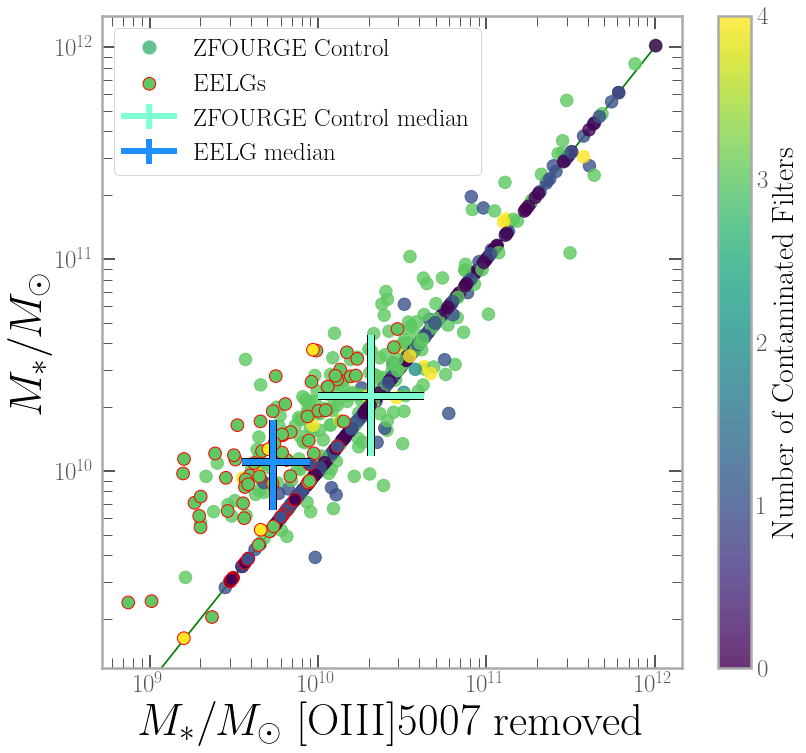

In [27]:
mpl.rcParams.update({'font.size': 22})
# fig,ax =plt.subplots(1,1,figsize=(16,10))
fig,ax=FancyPlot(r'$M_*/M_{\odot}$ [OIII]5007 removed',r'$M_*/M_{\odot}$')
# plt.scatter(FM['M(stars)'],F['M(stars)'])
ax.plot(linspace(0,10**12,100),linspace(0,10**12,100),zorder=1,c='green')
# plt.xlabel('Magphys Mass without Kband')
# plt.ylabel('Magphys Mass')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(10**9,10**12)
# plt.title('Magphys Stellar Mass with and without contamination')
plt.grid(False)

sc = plt.scatter(subset_FM['M(stars)'],subset_F['M(stars)'],c=Montague2['plot'],cmap=cm.viridis,s=155,alpha=0.8,label='ZFOURGE Control')
plt.scatter(FMELG['M(stars)'], FELG['M(stars)'], marker='o', s=160, c=Montatwo['plot'], cmap=cm.viridis, edgecolor='red',label='EELGs')

plt.colorbar(sc,label='Number of Contaminated Filters',ticks=[0,1,2,3,4])#,aspect=8,fraction=0.04)

med1=median(subset_FM['M(stars)'])
med2=median(subset_F['M(stars)'])
percentile11=percentile(subset_FM['M(stars)'].values,25)
percentile12=percentile(subset_FM['M(stars)'].values,75)
percentile21=percentile(subset_F['M(stars)'].values,25)
percentile22=percentile(subset_F['M(stars)'].values,75)
x_error = np.array([[med1-percentile11],[percentile12-med1]])
y_error = np.array([[med2-percentile21],[percentile22-med2]])

ax.errorbar(median(subset_FM['M(stars)']),median(subset_F['M(stars)']),xerr=x_error,yerr=y_error,ecolor='black',linewidth=8,zorder=9)
ax.errorbar(median(subset_FM['M(stars)']),median(subset_F['M(stars)']),xerr=x_error,yerr=y_error,c='aquamarine',ecolor='aquamarine',linewidth=6,zorder=10,label='ZFOURGE Control median')


med1=median(FMELG['M(stars)'])
med2=median(FELG['M(stars)'])
percentile11=percentile(FMELG['M(stars)'].values,25)
percentile12=percentile(FMELG['M(stars)'].values,75)
percentile21=percentile(FELG['M(stars)'].values,25)
percentile22=percentile(FELG['M(stars)'].values,75)
x_error = np.array([[med1-percentile11],[percentile12-med1]])
y_error = np.array([[med2-percentile21],[percentile22-med2]])

ax.errorbar(median(FMELG['M(stars)']),median(FELG['M(stars)']),xerr=x_error,yerr=y_error,ecolor='black',linewidth=8,zorder=9)
ax.errorbar(median(FMELG['M(stars)']),median(FELG['M(stars)']),xerr=x_error,yerr=y_error,c='dodgerblue',ecolor='dodgerblue',linewidth=6,zorder=10,label='EELG median')

legend1 = plt.Line2D([0], [0], marker='o', color='w', label='ZFOURGE Control',
                     markerfacecolor='mediumseagreen', markersize=15, alpha=0.8)

# plt.legend(loc='best',handles=[legend1])
handles, labels = ax.get_legend_handles_labels()
for i, label in enumerate(labels):
    if label == 'ZFOURGE Control':
        handles[i] = legend1

# Add the modified legend
ax.legend(handles=handles, labels=labels, loc='best')
fig.savefig('MassContam.pdf', format='pdf', dpi=600, bbox_inches='tight')
# plt.colorbar(sc2,label='z')

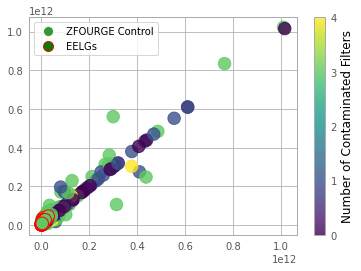

In [11]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.cm as cm

# Assuming you have imported cm from matplotlib like this:
# from matplotlib import cm

# Create the first scatter plot without a red outline
sc1 = plt.scatter(subset_FM['M(stars)'], subset_F['M(stars)'],
                  c=Montague2['plot'], cmap=cm.viridis, s=155, alpha=0.8,
                  label='ZFOURGE Control')

# Create the second scatter plot with a red outline
sc2 = plt.scatter(FMELG['M(stars)'], FELG['M(stars)'],
                  marker='o', s=160, c=Montatwo['plot'], cmap=cm.viridis,
                  edgecolor='red', linewidth=1)

# Create custom legend entries
legend1 = plt.Line2D([0], [0], marker='o', color='w', label='ZFOURGE Control',
                     markerfacecolor='green', markersize=10, alpha=0.8)

legend2 = plt.Line2D([0], [0], marker='o', color='w', label='EELGs',
                     markerfacecolor='green', markersize=10, markeredgecolor='red')

# Add a colorbar
plt.colorbar(sc1, label='Number of Contaminated Filters', ticks=[0, 1, 2, 3, 4])

# Add legends
plt.legend(handles=[legend1, legend2])

# Show the plot
plt.show()


In [4]:
BF

beta   beta_er     betaU  betaU_er     betaP  betaP_er     bouwen  \
0    0.890812  0.067876 -0.365302  0.064535  1.430816  0.323253  24.149181   
1   -0.323225  0.013161 -2.695507  0.007718 -0.167478  0.081307  25.895057   
2   -0.233452  0.028779 -2.174125  0.021945 -0.551884  0.156005  25.321538   
3   -2.087415  0.018545 -2.137091  0.018492 -1.726278  0.033310  25.280800   
4   -0.886267  0.021042 -2.230474  0.018343 -0.789213  0.088215  25.383522   
..        ...       ...       ...       ...       ...       ...        ...   
677 -1.400064  0.008994 -2.553155  0.007709 -1.338209  0.059119  25.738470   
678 -2.010485  0.006714 -2.656625  0.006456 -1.987157  0.054499  25.852287   
679 -0.929986  0.013479 -2.456917  0.011374 -0.758557  0.092164  25.632609   
680 -2.195999  0.020587 -2.358997  0.020350 -2.397684  0.009307  25.524896   
681 -2.146960  0.021849 -2.196277  0.021790 -2.345313  0.001069  25.345905   

       bouwenA       sion  Galaxy_ID  
0    23.395513 -80.416540       6020  
1    24.123935 -82.272663       6235  
2    24.070071 -81.656673       6329  
3    25.226156 -81.121878       6465  
4    24.461760 -81.554538       6525  
..         ...        ...        ...  
677  24.770039 -81.776990      30249  
678  25.141534 -81.511651      30397  
679  24.487992 -81.953200      30465  
680  25.345598 -81.896767      30690  
681  25.291656 -82.673592      30781  

[682 rows x 10 columns]

In [6]:
FELG

Galaxy_ID  redshift  SFH $f_{mu}$  IR $f_{mu}$  $\mu$  $\tau_V$  \
0        7624   3.47300         0.309        0.385  0.330     0.677   
1        8366   3.03200         0.097        0.015  0.130     0.192   
2        8841   3.50109         0.309        0.385  0.330     0.677   
3        8941   3.55717         0.183        0.015  0.199     0.456   
4        9517   3.52566         0.097        0.015  0.114     0.189   
..        ...       ...           ...          ...    ...       ...   
71      28479   3.50674         0.309        0.385  0.330     0.677   
72      29009   3.37636         0.097        0.015  0.114     0.189   
73      29093   3.71105         0.083        0.015  0.153     0.328   
74      30231   3.16485         0.066        0.015  0.199     0.015   
75      30397   3.51017         0.205        0.385  0.155     1.276   

    sSFR$_{0.1Gyr}$     M(stars)         Ldust  $T_C^{ISM}$  $T_W^{BC}$  \
0      2.385000e-09  36980000000  772000000000         60.2        24.0   
1      2.314000e-09   8855000000   88550000000         63.3        39.3   
2      2.385000e-09  11390000000  237800000000         60.2        24.0   
3      1.847000e-09   9731000000  131700000000         63.3        39.3   
4      1.243000e-09  14730000000   77050000000         63.3        39.3   
..              ...          ...           ...          ...         ...   
71     2.385000e-09  26360000000  550400000000         60.2        24.0   
72     1.243000e-09  16450000000   86050000000         63.3        39.3   
73     5.513000e-09   8966000000  455500000000         63.3        39.3   
74     1.876000e-09  28190000000   25890000000         63.3        39.3   
75     7.447000e-09   9422000000  669600000000         60.2        24.0   

    $\chi_C^{tot}$  $\chi_{PAH}^{tot}$  $\chi_{MIR}^{tot}$  $\chi_{W}^{tot}$  \
0            0.282               0.113               0.320             0.285   
1            0.010               0.128               0.224             0.637   
2            0.282               0.113               0.320             0.285   
3            0.010               0.128               0.224             0.637   
4            0.010               0.128               0.224             0.637   
..             ...                 ...                 ...               ...   
71           0.282               0.113               0.320             0.285   
72           0.010               0.128               0.224             0.637   
73           0.010               0.128               0.224             0.637   
74           0.010               0.128               0.224             0.637   
75           0.282               0.113               0.320             0.285   

    $\tau_{V}^{ISM}$    M(dust)  $SFR_{0.1Gyr}$  $A_V$  $age_M$   Tdust  \
0              0.223  219800000           88.19  0.289    8.496  42.334   
1              0.025     792400           20.49  0.049    8.604  62.863   
2              0.223   67690000           27.16  0.289    8.496  42.334   
3              0.091    1179000           17.97  0.136    8.691  62.863   
4              0.021     689500           18.31  0.038    8.805  62.863   
..               ...        ...             ...    ...      ...     ...   
71             0.223  156700000           62.87  0.289    8.496  42.334   
72             0.021     769900           20.44  0.038    8.805  62.863   
73             0.050    4076000           49.42  0.149    8.550  62.863   
74             0.003     231700           52.88  0.006    8.705  62.863   
75             0.197  190600000           70.16  0.418    7.990  42.334   

    lg(M/Lh)  lg(M/Lk)   chi2  
0     -0.093     0.129  2.289  
1     -0.167     0.066  2.150  
2     -0.093     0.129  2.273  
3     -0.090     0.141  2.207  
4     -0.068     0.167  2.484  
..       ...       ...    ...  
71    -0.093     0.129  2.819  
72    -0.068     0.167  8.639  
73    -0.373    -0.117  1.284  
74    -0.394    -0.182  8.745  
75    -0.307    -0.068  4.479  

[76

In [27]:
Fers

col0  Galaxy_ID         sSFRl         sSFRh           SMl           SMh  \
0       0       6020  2.137962e-11  4.265795e-11  2.570396e+11  3.388442e+11   
1       1       6235  5.308844e-09  1.188502e-08  2.454709e+10  3.019952e+10   
2       2       6329  1.059254e-09  5.956621e-09  3.162278e+10  4.677351e+10   
3       3       6465  7.498942e-10  7.498942e-10  3.715352e+10  3.715352e+10   
4       4       6525  9.440609e-10  4.216965e-09  3.715352e+10  6.025596e+10   
..    ...        ...           ...           ...           ...           ...   
677   677      30249  4.216965e-09  1.059254e-08  1.584893e+10  2.570396e+10   
678   678      30397  2.371374e-09  7.498942e-09  9.375620e+09  1.288250e+10   
679   679      30465  1.333521e-09  5.956621e-09  4.897788e+10  1.023293e+11   
680   680      30690  7.498942e-09  7.498942e-09  1.862087e+10  1.862087e+10   
681   681      30781  1.883649e-09  1.883649e-09  5.495409e+11  5.495409e+11   

            SFRl         SFRh  
0       5.211947    15.559656  
1     132.434154   321.366054  
2      49.773708   224.905461  
3      28.973436    28.973436  
4      55.847019   202.768272  
..           ...          ...  
677    98.174794   198.152703  
678    29.648314    70.307232  
679    79.799469   448.745390  
680   146.892628   146.892628  
681  1028.016298  1028.016298  

[682 rows x 8 columns]

In [8]:
FM

Galaxy_ID  redshift  SFH $f_{mu}$  IR $f_{mu}$  $\mu$  $\tau_V$  \
0         6020   2.50071         0.808        0.689  0.353     0.605   
1         6235   2.77694         0.336        0.385  0.529     2.675   
2         6329   2.55376         0.381        0.385  0.129     7.868   
3         6465   2.80100         0.099        0.015  0.225     0.017   
4         6525   2.87872         0.356        0.385  0.404     1.262   
..         ...       ...           ...          ...    ...       ...   
677      30249   2.50950         0.358        0.385  0.341     1.573   
678      30397   3.51017         0.159        0.015  0.322     0.602   
679      30465   3.49404         0.305        0.385  0.283     3.752   
680      30690   2.67692         0.104        0.015  0.404     0.061   
681      30781   2.62456         0.066        0.015  0.199     0.015   

     sSFR$_{0.1Gyr}$      M(stars)          Ldust  $T_C^{ISM}$  $T_W^{BC}$  \
0       2.005000e-11  259200000000   147200000000         45.1        26.1   
1       1.076000e-08   30000000000  4465000000000         60.2        24.0   
2       2.516000e-09   37670000000  1042000000000         60.2        24.0   
3       7.852000e-10   37110000000    15870000000         63.3        39.3   
4       1.415000e-09   56180000000   787400000000         60.2        24.0   
..               ...           ...            ...          ...         ...   
677     4.197000e-09   26080000000  1149000000000         60.2        24.0   
678     1.239000e-08    4489000000   708400000000         63.3        39.3   
679     1.131000e-08   42730000000  6936000000000         60.2        24.0   
680     7.800000e-09   18780000000   287100000000         63.3        39.3   
681     1.876000e-09  554300000000   509000000000         63.3        39.3   

     $\chi_C^{tot}$  $\chi_{PAH}^{tot}$  $\chi_{MIR}^{tot}$  $\chi_{W}^{tot}$  \
0             0.612               0.137               0.053             0.198   
1             0.282               0.113               0.320             0.285   
2             0.282               0.113               0.320             0.285   
3             0.010               0.128               0.224             0.637   
4             0.282               0.113               0.320             0.285   
..              ...                 ...                 ...               ...   
677           0.282               0.113               0.320             0.285   
678           0.010               0.128               0.224             0.637   
679           0.282               0.113               0.320             0.285   
680           0.010               0.128               0.224             0.637   
681           0.010               0.128               0.224             0.637   

     $\tau_{V}^{ISM}$     M(dust)  $SFR_{0.1Gyr}$  $A_V$  $age_M$   Tdust  \
0               0.214    55510000           5.198  0.234    9.041  31.569   
1               1.416  1271000000         322.800  1.865    7.741  42.334   
2               1.013   296600000          94.770  1.337    8.350  42.334   
3               0.004      142000          29.140  0.006    8.846  62.863   
4               0.510   224200000          79.500  0.646    8.780  42.334   
..                ...         ...             ...    ...      ...     ...   
677             0.537   327100000         109.500  0.736    8.464  42.334   
678             0.194     6339000          55.600  0.373    7.550  62.863   
679             1.064  1975000000         483.200  1.651    7.698  42.334   
680             0.025     2569000         146.500  0.041    7.924  62.863   
681             0.003     4555000        1040.000  0.006    8.705  62.863   

     lg(M/Lh)  lg(M/Lk)    chi2  
0      -0.053     0.159   1.600  
1      -0.167     0.048   2.257  
2      -0.246    -0.072   0.950  
3      -0.230    -0.013   7.400  
4      -0.196     0.008   1.603  
..        ...       ...     ...  
677    -0.207     0.012   9.274  
678    -0.274     0.005   2.540  

In [110]:
IGM

Galaxy_ID  redshift  SFH $f_{mu}$  IR $f_{mu}$  $\mu$  $\tau_V$  \
0         6020   2.50071         0.808        0.689  0.353     0.605   
1         6235   2.77694         0.336        0.385  0.529     2.675   
2         6329   2.55376         0.381        0.385  0.129     7.868   
3         6465   2.80100         0.099        0.015  0.225     0.017   
4         6525   2.87872         0.356        0.385  0.404     1.262   
..         ...       ...           ...          ...    ...       ...   
677      30249   2.50950         0.358        0.385  0.341     1.573   
678      30397   3.51017         0.205        0.385  0.155     1.276   
679      30465   3.49404         0.383        0.385  0.465     1.577   
680      30690   2.67692         0.104        0.015  0.404     0.061   
681      30781   2.62456         0.066        0.015  0.199     0.015   

     sSFR$_{0.1Gyr}$      M(stars)         Ldust  $T_C^{ISM}$  $T_W^{BC}$  \
0       2.005000e-11  2.590000e+11  1.471000e+11         45.1        26.1   
1       1.076000e-08  3.000000e+10  4.465000e+12         60.2        24.0   
2       2.516000e-09  3.776000e+10  1.044000e+12         60.2        24.0   
3       7.852000e-10  3.711000e+10  1.587000e+10         63.3        39.3   
4       1.415000e-09  5.618000e+10  7.874000e+11         60.2        24.0   
..               ...           ...           ...          ...         ...   
677     4.197000e-09  2.600000e+10  1.145000e+12         60.2        24.0   
678     7.447000e-09  9.422000e+09  6.696000e+11         60.2        24.0   
679     3.775000e-09  5.469000e+10  2.349000e+12         60.2        24.0   
680     7.800000e-09  1.878000e+10  2.871000e+11         63.3        39.3   
681     1.876000e-09  5.520000e+11  5.069000e+11         63.3        39.3   

     $\chi_C^{tot}$  $\chi_{PAH}^{tot}$  $\chi_{MIR}^{tot}$  $\chi_{W}^{tot}$  \
0             0.612               0.137               0.053             0.198   
1             0.282               0.113               0.320             0.285   
2             0.282               0.113               0.320             0.285   
3             0.010               0.128               0.224             0.637   
4             0.282               0.113               0.320             0.285   
..              ...                 ...                 ...               ...   
677           0.282               0.113               0.320             0.285   
678           0.282               0.113               0.320             0.285   
679           0.282               0.113               0.320             0.285   
680           0.010               0.128               0.224             0.637   
681           0.010               0.128               0.224             0.637   

     $\tau_{V}^{ISM}$       M(dust)  $SFR_{0.1Gyr}$  $A_V$  $age_M$   Tdust  \
0               0.214  5.546000e+07           5.194  0.234    9.041  31.569   
1               1.416  1.271000e+09         322.800  1.865    7.741  42.334   
2               1.013  2.973000e+08          94.990  1.337    8.350  42.334   
3               0.004  1.420000e+05          29.140  0.006    8.846  62.863   
4               0.510  2.242000e+08          79.500  0.646    8.780  42.334   
..                ...           ...             ...    ...      ...     ...   
677             0.537  3.260000e+08         109.100  0.736    8.464  42.334   
678             0.197  1.906000e+08          70.160  0.418    7.990  42.334   
679             0.733  6.687000e+08         206.400  0.935    8.354  42.334   
680             0.025  2.569000e+06         146.500  0.041    7.924  62.863   
681             0.003  4.536000e+06        1035.000  0.006    8.705  62.863   

     lg(M/Lh)  lg(M/Lk)    chi2  
0      -0.053     0.159   1.558  
1      -0.167     0.048   2.257  
2      -0.246    -0.072   0.943  
3      -0.230    -0.013   7.400  
4      -0.196     0.008   1.603  
..        ...       ...     ...  
677    -0.207     0.012   9.102  
678    -0.307    -0.0

In [11]:
# S

id        z      mSFR     mpeak   mperiod     mskew  tau_birth  \
597   6020  2.50071  3.097305  1.281920 -1.000000  0.013271  -0.852194   
598   6235  2.77694  2.342452  0.221850 -0.636386  0.996335  -0.889691   
599   6329  2.55376  1.952156  0.260772 -0.362836  0.615819   0.474204   
600   6465  2.80100  1.525758  0.640748  0.171198  0.339749  -0.026787   
601   6525  2.87872  2.005214 -0.362010  0.162928  0.645789   0.152690   
..     ...      ...       ...       ...       ...       ...        ...   
592  30249  2.50950  1.511130  1.923115  0.214624  0.894632  -0.054756   
593  30397  3.51017  1.685549  0.274291 -0.412091  0.788086   1.202450   
594  30465  3.49404  2.266614  0.307770 -0.596977  0.027704  -0.151107   
595  30690  2.67692  2.316616 -0.067228 -0.426278  1.000000  -1.757471   
596  30781  2.62456  3.159912 -0.145526 -0.296752 -0.124467  -1.988639   

     tau_screen  alpha_SF_birth  alpha_SF_screen    Zfinal          LP  \
597   -2.339088        0.719620         1.213503 -1.569428  -73.281759   
598    0.187768        3.142960         0.000000 -3.268389  -83.930503   
599   -0.047143        3.810147         0.460761 -1.300000  -54.921809   
600   -2.357854        2.668287         1.694030 -3.659255 -115.363467   
601   -0.321632        2.165801         2.890518 -1.352377  -65.002892   
..          ...             ...              ...       ...         ...   
592   -0.663522        2.930297         0.246745 -3.971322  -95.909681   
593   -2.048503        2.339843         0.299942 -1.942131  -94.401655   
594   -0.339019        0.736849         0.922512 -1.580423  -67.143745   
595   -0.796255        3.563835         3.193060 -2.980637 -176.789516   
596   -0.891781        1.983863         1.256517 -3.666349 -442.381629   

          masstot  dustmass.birth  dustmass.screen  dustmass.total  \
597  3.067041e+11    0.000000e+00     2.222933e+05    2.222933e+05   
598  7.763276e+10    4.409874e+09     1.930423e+07    4.429179e+09   
599  5.119341e+10    6.011800e+09     3.690490e+06    6.015490e+09   
600  6.415437e+10    1.430324e+09     2.338343e+06    1.432663e+09   
601  7.197575e+10    2.062958e+09     2.101665e+09    4.164623e+09   
..            ...             ...              ...             ...   
592  9.237768e+10    1.652192e+09     1.151455e+06    1.653343e+09   
593  2.542020e+10    1.450843e+09     4.899737e+04    1.450892e+09   
594  1.003548e+11    9.597912e+06     1.366355e+07    2.326146e+07   
595  3.487563e+10    8.465035e+08     7.896549e+09    8.743053e+09   
596  8.447830e+11    7.826574e+08     6.647957e+08    1.447453e+09   

     dustlum.birth  dustlum.screen  dustlum.total      SFRburst   StellarMass  \
597   0.000000e+00    2.280328e+09   2.280328e+09  1.478529e-26  1.787595e+11   
598   4.744104e+11    2.190812e+12   2.665222e+12  2.011730e+02  5.382340e+10   
599   5.271177e+11    3.023514e+11   8.294691e+11  8.218302e+01  3.398932e+10   
600   2.060411e+11    2.824257e+09   2.088654e+11  3.111560e+01  2.521740e+10   
601   5.861012e+11    2.577670e+11   8.438681e+11  9.263480e+01  3.296600e+10   
..             ...             ...            ...           ...           ...   
592   1.978940e+11    1.160727e+11   3.139667e+11  2.885472e+01  3.716456e+10   
593   3.034361e+11    4.731145e+09   3.081672e+11  4.432243e+01  1.680090e+10   
594   4.942141e+11    4.261292e+11   9.203433e+11  1.106077e+02  6.365572e+10   
595   7.873370e+10    8.315847e+11   9.103184e+11  1.826350e+02  2.513418e+10   
596   3.458651e+11    5.643938e+12   5.989804e+12  1.313253e+03  4.540135e+11   

      mSFR_LB  mpeak_LB  mperiod_LB  mskew_LB  tau_birth_LB  tau_screen_LB  \
597  3.085349  1.263964   -1.000000 -0.258152     -1.331583      -2.500000   
598  2.306905  0.127486   -1.000000  0.031212     -2.500000       0.180736   
599  1.858122  0.050629   -0.386581  0.049171      0.156545      -0.075189   
600  1.491733  0.222372    0.054542 -0.318847     -0.418177      -2.500000   
601  1.969548 -0.800397   

In [13]:
# Sem

id        z      mSFR     mpeak   mperiod     mskew  tau_birth  \
597   6020  2.50071  3.337316  0.600257 -0.474427 -0.074041   1.339071   
598   6235  2.77694  2.647954 -0.990952  0.175265  0.826095  -0.040267   
599   6329  2.55376  2.044198  0.394100 -0.686533  0.863554  -0.004921   
600   6465  2.80100  1.577558 -0.336449  0.544127  0.717604   0.108529   
601   6525  2.87872  2.042860  0.588923 -0.871046  1.000000   0.220484   
..     ...      ...       ...       ...       ...       ...        ...   
592  30249  2.50950  1.552146  0.056370  0.220916 -0.271780   0.156545   
593  30397  3.51017  1.768893  0.191489 -0.673617  0.071098   0.899916   
594  30465  3.49404  2.691018 -0.034576 -0.510230  0.097185   1.399006   
595  30690  2.67692  2.363401  0.009415 -0.913954  0.628697  -0.832179   
596  30781  2.62456  3.127595  0.076301 -0.128669  0.673318  -2.176760   

     tau_screen  alpha_SF_birth  alpha_SF_screen    Zfinal          LP  \
597    0.373334        2.088764         0.054844 -3.145448  -71.404702   
598    0.146163        2.652333         2.812616 -3.876114  -84.591579   
599    0.028641        3.339279         0.564011 -1.430872  -55.236114   
600   -1.236836        3.156621         0.098754 -4.000000 -112.046109   
601   -0.258754        3.490718         3.852638 -1.531183  -63.036617   
..          ...             ...              ...       ...         ...   
592   -0.598171        0.219373         0.506015 -4.000000  -96.504154   
593   -2.386977        3.104618         3.396773 -1.920503  -93.208377   
594    0.046504        0.000000         2.322521 -3.121451  -67.706658   
595   -1.007916        1.905699         0.922512 -1.536447 -186.404151   
596   -0.959314        1.662464         0.545456 -3.655324 -447.349382   

          masstot  dustmass.birth  dustmass.screen  dustmass.total  \
597  1.767445e+12    4.596436e+09     7.162904e+07    4.668065e+09   
598  7.510506e+10    7.030220e+09     1.575603e+10    2.278626e+10   
599  5.414857e+10    4.558936e+09     7.611759e+06    4.566547e+09   
600  7.744835e+10    1.585997e+09     1.223852e+06    1.587221e+09   
601  6.719760e+10    5.299587e+09     5.038711e+09    1.033830e+10   
..            ...             ...              ...             ...   
592  1.018130e+11    1.587419e+06     3.057241e+06    4.644660e+06   
593  2.387114e+10    1.991452e+09     6.821266e+08    2.673578e+09   
594  1.499982e+11    2.058762e+07     1.656253e+10    1.658312e+10   
595  2.309590e+10    1.174664e+09     8.827101e+06    1.183491e+09   
596  8.217542e+11    2.396470e+09     1.714344e+07    2.413614e+09   

     dustlum.birth  dustlum.screen  dustlum.total     SFRburst   StellarMass  \
597   1.547997e+12    8.129084e+12   9.677081e+12   426.684873  1.024352e+12   
598   1.026769e+12    2.032557e+12   3.059326e+12   209.832284  3.389702e+10   
599   4.542630e+11    5.415170e+11   9.957800e+11    93.509333  3.700891e+10   
600   1.696088e+11    1.361167e+11   3.057255e+11    36.423586  1.799685e+10   
601   5.031697e+11    4.379069e+11   9.410766e+11    96.303495  4.549828e+10   
..             ...             ...            ...          ...           ...   
592   1.633189e+11    2.363974e+11   3.997163e+11    34.843942  2.313073e+10   
593   2.179644e+11    6.667036e+10   2.846347e+11    46.732777  1.589399e+10   
594   2.336461e+12    3.556262e+12   5.892724e+12   458.364266  9.622728e+10   
595   6.563508e+11    2.752935e+11   9.316442e+11   194.481355  1.796129e+10   
596   3.296016e+12    1.254072e+12   4.550087e+12  1309.922525  5.055382e+11   

      mSFR_LB  mpeak_LB  mperiod_LB  mskew_LB  tau_birth_LB  tau_screen_LB  \
597  3.323912  0.572269   -0.481329 -0.173457     -0.542998       0.373198   
598  2.607126 -1.009888    0.168805  0.738660     -0.413304       0.141388   
599  1.968374  0.394100   -1.000000  0.759554     -0.498204       0.018960   
600  1.562437 -0.660444    0.355790  0.105116     -0.009539      -1.419111   
601  2.003850  0.438938   -1.000000  0

In [6]:
# Sem2 = Table.read(os.path.expanduser('~/Documents/Sample2_t.csv'), format='ascii')
# Sem2=Sem2.to_pandas()
# pd.set_option('display.max_columns', None)
# Sem2.sort_values(by=['id'],inplace=True)
# Sem2

id        z      mSFR     mpeak   mperiod     mskew  tau_birth  \
597   6020  2.50071  2.556514  1.526072 -0.085880 -0.339837  -0.511762   
598   6235  2.77694  2.372455 -0.196017 -0.179805  0.941045  -0.115581   
599   6329  2.55376  2.056102 -0.309346  0.101481  1.095200   0.093488   
600   6465  2.80100  1.529361 -0.356543  0.658691  1.096488   0.075959   
601   6525  2.87872  2.267533 -1.833109  0.498843  0.959266   0.268982   
..     ...      ...       ...       ...       ...       ...        ...   
592  30249  2.50950  1.555849  2.541241 -1.436026  1.355140   1.325515   
593  30397  3.51017  1.768966  0.309795 -0.707367  0.444922   1.407657   
594  30465  3.49404  2.446423  0.600290 -0.466189  1.041806   0.973893   
595  30690  2.67692  2.507936  0.032030 -0.946699  0.841219   0.144012   
596  30781  2.62456  3.049223 -0.127640 -0.497779 -0.392705  -1.768298   

     tau_screen  alpha_SF_birth  alpha_SF_screen    Zfinal          LP  \
597   -0.133969        1.859860         4.000000 -2.219473  -69.559860   
598    0.133609        2.607925         1.475659 -3.071713  -84.222502   
599    0.029757        2.611155         3.275076 -1.358368  -55.069641   
600   -1.406895        2.912128         3.655365 -4.000000 -112.162759   
601   -0.297993        2.559038         0.928189 -1.356279  -62.392638   
..          ...             ...              ...       ...         ...   
592   -0.562600        0.000000         0.000000 -4.000000  -96.661396   
593   -2.209139        0.093334         0.067716 -2.012455  -93.293666   
594    0.000998        2.725056         3.299247 -4.000000  -68.223297   
595   -1.123230        0.601834         0.724973 -3.163726 -179.018932   
596   -2.165582        2.244726         0.295064 -1.561948 -442.944771   

          masstot  dustmass.birth  dustmass.screen  dustmass.total  \
597  8.844121e+11    2.569116e+07     6.726092e+09    6.751783e+09   
598  5.517844e+10    6.090976e+09     5.339647e+08    6.624940e+09   
599  5.181607e+10    3.567804e+09     5.237375e+09    8.805178e+09   
600  7.621786e+10    1.247142e+09     1.205339e+09    2.452481e+09   
601  7.137357e+10    3.607943e+09     1.242207e+07    3.620365e+09   
..            ...             ...              ...             ...   
592  9.005204e+10    1.533587e+06     2.244502e+06    3.778089e+06   
593  2.468528e+10    1.847846e+06     5.964320e+05    2.444278e+06   
594  2.136370e+11    8.849667e+09     2.515983e+10    3.400950e+10   
595  3.438503e+10    2.161131e+07     1.906305e+07    4.067436e+07   
596  7.780562e+11    5.742764e+09     0.000000e+00    5.742764e+09   

     dustlum.birth  dustlum.screen  dustlum.total    SFRburst   StellarMass  \
597   1.668818e+10    5.684482e+11   5.851364e+11    6.350522  2.248256e+11   
598   9.261113e+11    1.670114e+12   2.596225e+12  199.182998  3.640722e+10   
599   5.408347e+11    5.340620e+11   1.074897e+12  102.409892  3.028766e+10   
600   1.509795e+11    1.094880e+11   2.604674e+11   32.660215  1.623803e+10   
601   5.754116e+11    3.804726e+11   9.558842e+11  101.894302  1.640493e+10   
..             ...             ...            ...         ...           ...   
592   1.740448e+11    2.547255e+11   4.287703e+11   35.764032  4.519422e+10   
593   2.061558e+11    6.749722e+10   2.736530e+11   41.413476  1.670350e+10   
594   1.217112e+12    2.542831e+12   3.759942e+12  250.438698  1.360128e+11   
595   1.447185e+12    1.007757e+12   2.454942e+12  289.787567  2.671884e+10   
596   1.402702e+12    0.000000e+00   1.402702e+12  984.037601  3.711733e+11   

      mSFR_LB  mpeak_LB  mperiod_LB  mskew_LB  tau_birth_LB  tau_screen_LB  \
597  2.532585  1.526072   -0.087296 -0.379685     -1.290682      -0.147971   
598  2.333861 -0.244762   -0.246535  0.741063     -0.411284       0.126196   
599  1.997257 -0.583767    0.063057  0.339405     -0.147317       0.020030   
600  1.510252 -0.816739    0.431462  0.142166     -0.125939      -2.500000   
601  2.257538 -1.957870    0.498564  0.839864     

In [64]:
Fun

Galaxy_ID  redshift  SFH $f_{mu}$  IR $f_{mu}$  $\mu$  $\tau_V$  \
0        6465   2.80100         0.099        0.015  0.225     0.017   
1        6849   3.11840         0.280        0.385  0.251     3.472   
2        7071   3.38090         0.099        0.015  0.225     0.017   
3        7624   3.47300         0.309        0.385  0.330     0.677   
4        8024   3.02000         0.219        0.385  0.562     0.923   
..        ...       ...           ...          ...    ...       ...   
65      29139   2.73465         0.419        0.385  0.899     0.463   
66      29263   2.74177         0.419        0.385  0.899     0.463   
67      29639   2.62113         0.136        0.015  0.495     0.024   
68      30690   2.67692         0.104        0.015  0.404     0.061   
69      30781   2.62456         0.066        0.015  0.199     0.015   

    sSFR$_{0.1Gyr}$      M(stars)          Ldust  $T_C^{ISM}$  $T_W^{BC}$  \
0      7.852000e-10   37110000000    15870000000         63.3        39.3   
1      1.030000e-08   25780000000  4228000000000         60.2        24.0   
2      7.852000e-10   26590000000    11370000000         63.3        39.3   
3      2.385000e-09   36980000000   772000000000         60.2        24.0   
4      1.085000e-08   10060000000  1388000000000         60.2        24.0   
..              ...           ...            ...          ...         ...   
65     6.331000e-10   76380000000   355200000000         60.2        24.0   
66     6.331000e-10   96490000000   448700000000         60.2        24.0   
67     3.226000e-09  609700000000  1348000000000         63.3        39.3   
68     7.800000e-09   18780000000   287100000000         63.3        39.3   
69     1.876000e-09  552000000000   506900000000         63.3        39.3   

    $\chi_C^{tot}$  $\chi_{PAH}^{tot}$  $\chi_{MIR}^{tot}$  $\chi_{W}^{tot}$  \
0            0.010               0.128               0.224             0.637   
1            0.282               0.113               0.320             0.285   
2            0.010               0.128               0.224             0.637   
3            0.282               0.113               0.320             0.285   
4            0.282               0.113               0.320             0.285   
..             ...                 ...                 ...               ...   
65           0.282               0.113               0.320             0.285   
66           0.282               0.113               0.320             0.285   
67           0.010               0.128               0.224             0.637   
68           0.010               0.128               0.224             0.637   
69           0.010               0.128               0.224             0.637   

    $\tau_{V}^{ISM}$     M(dust)  $SFR_{0.1Gyr}$  $A_V$  $age_M$   Tdust  \
0              0.004      142000           29.14  0.006    8.846  62.863   
1              0.870  1204000000          265.50  1.460    7.599  42.334   
2              0.004      101700           20.88  0.006    8.846  62.863   
3              0.223   219800000           88.19  0.289    8.496  42.334   
4              0.518   395300000          109.20  0.748    7.587  42.334   
..               ...         ...             ...    ...      ...     ...   
65             0.417   101100000           48.36  0.459    8.997  42.334   
66             0.417   127800000           61.09  0.459    8.997  42.334   
67             0.012    12060000         1967.00  0.016    8.456  62.863   
68             0.025     2569000          146.50  0.041    7.924  62.863   
69             0.003     4536000         1035.00  0.006    8.705  62.863   

    lg(M/Lh)  lg(M/Lk)    chi2  
0     -0.230    -0.013   7.400  
1     -0.193     0.047   5.643  
2     -0.230    -0.013  16.394  
3     -0.093     0.129   2.289  
4     -0.706    -0.487  20.838  
..       ...       ...     ...  
65    -0.161     0.023   3.192  
66    -0.161     0.023   1.457  
67    -0.525    -0.322   8.455  
68    -0.714    -0.489

In [29]:
B

beta   beta_er     betaU  betaU_er     betaP  betaP_er     bouwen  \
0    0.890812  0.067876 -0.365302  0.064535  1.430816  0.323253  24.149181   
1   -0.323225  0.013161 -2.695507  0.007718 -0.167478  0.081307  25.895057   
2   -0.233452  0.028779 -2.174125  0.021945 -0.551884  0.156005  25.321538   
3   -2.087415  0.018545 -2.137091  0.018492 -1.726278  0.033310  25.280800   
4   -0.886267  0.021042 -2.230474  0.018343 -0.789213  0.088215  25.383522   
..        ...       ...       ...       ...       ...       ...        ...   
677 -1.400064  0.008994 -2.553155  0.007709 -1.338209  0.059119  25.738470   
678 -2.010485  0.006714 -2.656625  0.006456 -1.987157  0.054499  25.852287   
679 -0.929986  0.013479 -2.456917  0.011374 -0.758557  0.092164  25.632609   
680 -2.195999  0.020587 -2.358997  0.020350 -2.397684  0.009307  25.524896   
681 -2.146960  0.021849 -2.196277  0.021790 -2.345313  0.001069  25.345905   

       bouwenA       sion  Galaxy_ID  
0    23.395513  25.079881       6020  
1    24.123935  25.235803       6235  
2    24.070071  25.042581       6329  
3    25.226156  25.071172       6465  
4    24.461760  25.085390       6525  
..         ...        ...        ...  
677  24.770039  25.174837      30249  
678  25.141534  25.216142      30397  
679  24.487992  25.142472      30465  
680  25.345598  25.110717      30690  
681  25.291656  25.050793      30781  

[682 rows x 10 columns]

In [5]:
max(BF['sion'])

-79.55477047486605

Text(0, 0.5, 'SM-IGM-REMOVED')

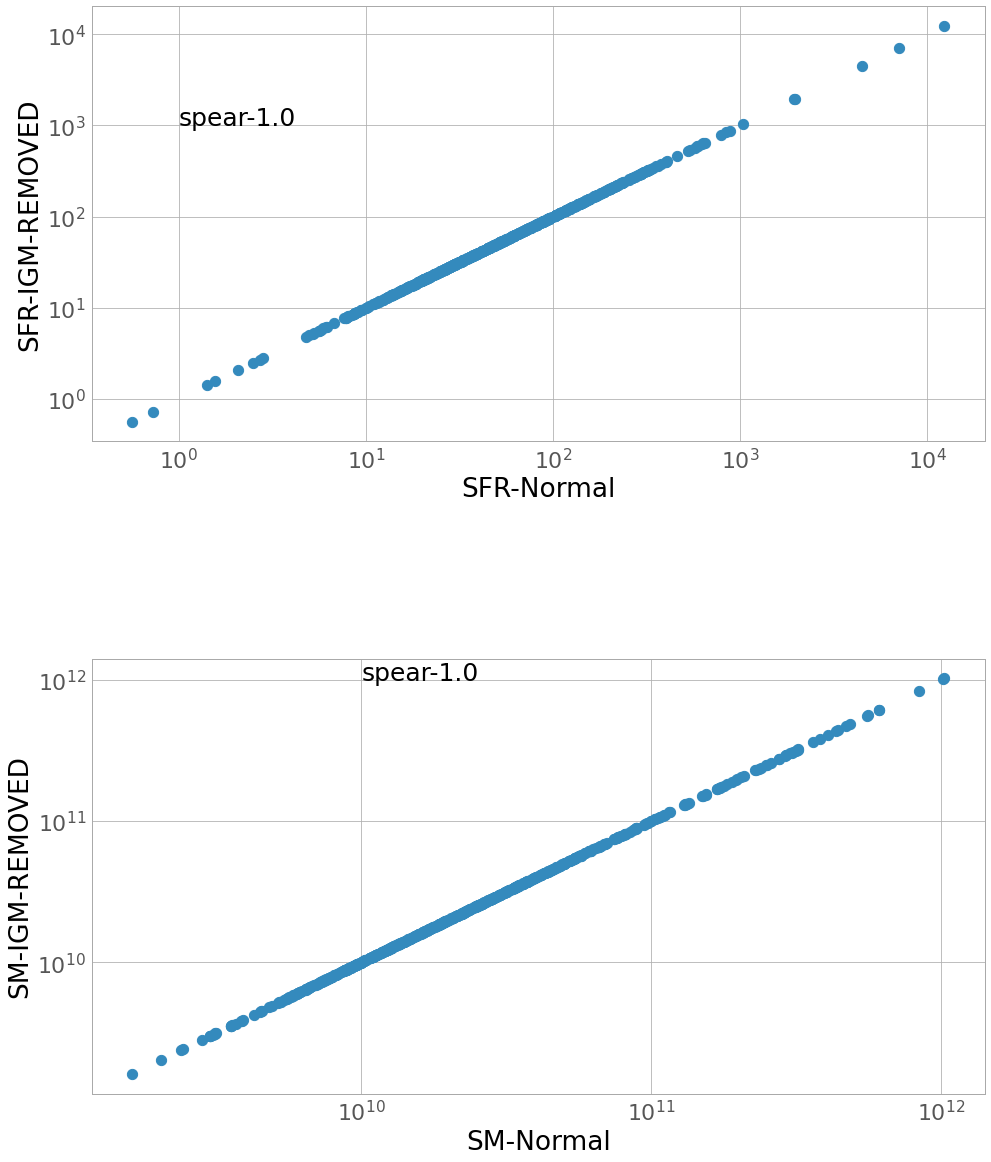

In [26]:
mpl.rcParams.update({'font.size': 22})

fig,ax=plt.subplots(2,1,figsize=(16,20))

ax[0].scatter(F[r'$SFR_{0.1Gyr}$'],IGM[r'$SFR_{0.1Gyr}$'],label='SFR',s=105)
corr_coef, p_value = spearmanr(F[r'$SFR_{0.1Gyr}$'],IGM[r'$SFR_{0.1Gyr}$'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(10**0,1000),size=25)
# ax[0].annotate('p-'+str(round(p_value,5)),xy=(10**-10.8,3.5),size=25)
ax[1].scatter(F['M(stars)'],IGM['M(stars)'],label='attenuated',s=105)
corr_coef, p_value = spearmanr(F['M(stars)'],IGM['M(stars)'])
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(10**10,10**12),size=25)
# plt.scatter(F[r'$SFR_{0.1Gyr}$'],B['betaP'],label='photometry',s=105, alpha=0.5)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
# plt.legend()
ax[0].set_xlabel('SFR-Normal')
ax[0].set_ylabel('SFR-IGM-REMOVED')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
# plt.legend()
ax[1].set_xlabel('SM-Normal')
ax[1].set_ylabel('SM-IGM-REMOVED')
# ax.set_xlim(1,10**3)
# ax.set_ylim(-3,1)#r'sSFR$_{0.1Gyr}$'

# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaP'],label='photometry',s=105, alpha=0.5)
# ax.set_xscale('log')
# plt.legend()
# plt.xlabel(r'log sSFR/ /yr')
# plt.ylabel('Bluminosity (beta)')

NameError: name 'B' is not defined

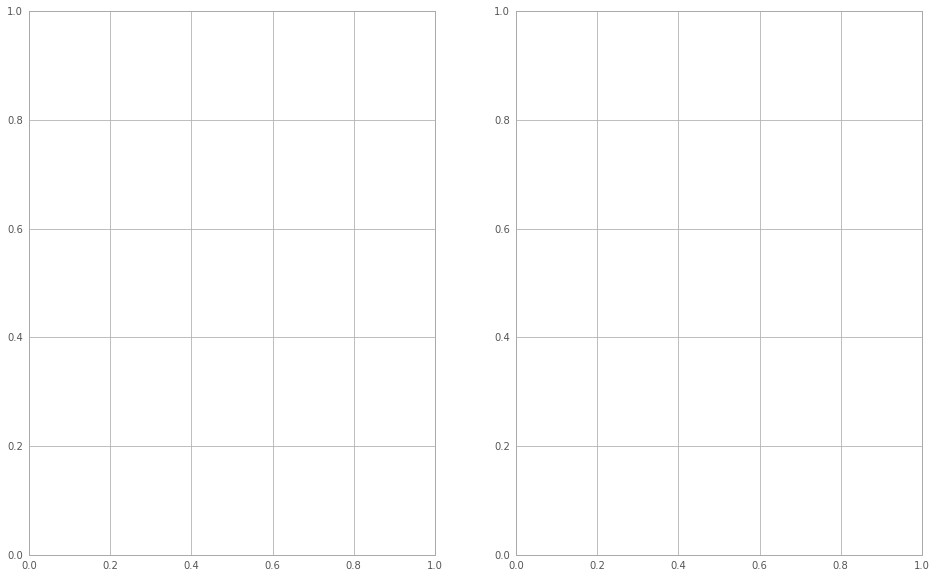

In [3]:
mpl.rcParams.update({'font.size': 22})

fig,ax=plt.subplots(1,2,figsize=(16,10))
#correlation of sion with beta from photometry 
#correlation of sion with ssfr
#sion with tau (exponential declining time factor)
# plt.errorbar(F[r'$SFR_{0.1Gyr}$'],B['betaU'],yerr=B['betaU_er'],label='unattenuated',fmt='o')#,s=105)
# plt.scatter(F[r'$SFR_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
ax[0].errorbar(F[r'$SFR_{0.1Gyr}$'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG[r'$SFR_{0.1Gyr}$'],B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP'],yerr=B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP_er'],label='EELG',fmt='*',c='yellow')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'log SFR/ M$_{\odot}$/yr')
ax[0].set_ylabel('Bluminosity (beta)')
ax[0].set_xlim(1,10**3)
ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(log10(F[r'$SFR_{0.1Gyr}$']),B['betaP'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)

corr_coef, p_value = spearmanr(log10(FM[r'$SFR_{0.1Gyr}$']),B['betaP'])
ax[1].errorbar(FM[r'$SFR_{0.1Gyr}$'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG[r'$SFR_{0.1Gyr}$'],B.where(B['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['betaP'],yerr=B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'log SFR/ M$_{\odot}$/yr')
ax[1].set_xscale('log')
ax[1].set_xlim(1,10**3)
ax[1].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'



fig,ax=plt.subplots(1,2,figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
ax[0].errorbar(F[r'sSFR$_{0.1Gyr}$'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG[r'sSFR$_{0.1Gyr}$'],B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP'],yerr=B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP_er'],label='EELG',fmt='*',c='yellow')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'log sSFR/ /yr')
ax[0].set_ylabel('Bluminosity (beta)')
# ax[0].set_xlim(1,10**3)
# ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(F[r'sSFR$_{0.1Gyr}$'],B['betaP'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(10**-10.8,4),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(10**-10.8,3.5),size=25)


corr_coef, p_value = spearmanr(log10(FM[r'$SFR_{0.1Gyr}$']),B['betaP'])
ax[1].errorbar(FM[r'sSFR$_{0.1Gyr}$'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG[r'sSFR$_{0.1Gyr}$'],B.where(B['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['betaP'],yerr=B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'log sSFR/ /yr')
ax[1].set_xscale('log')
# ax[1].set_xlim(1,10**3)
# ax[1].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(FM[r'sSFR$_{0.1Gyr}$'],B['betaP'])
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(10**-10.8,4),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(10**-10.8,3.5),size=25)


# plt.errorbar(F[r'sSFR$_{0.1Gyr}$'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
# ax.set_xscale('log')
# plt.legend()
# plt.xlabel(r'log sSFR/ /yr')
# plt.ylabel('Bluminosity (beta)')
# corr_coef, p_value = spearmanr(F[r'sSFR$_{0.1Gyr}$'],B['betaP'])
# plt.annotate('spear-'+str(round(corr_coef,3)),xy=(10**-10.8,4),size=25)
# plt.annotate('p-'+str(round(p_value,5)),xy=(10**-10.8,3.5),size=25)


# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
fig,ax=plt.subplots(1,2,figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
ax[0].errorbar(F['Ldust'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG['Ldust'],B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP'],yerr=B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP_er'],label='EELG',fmt='*',c='yellow')
ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'log Dust Luminosity /L$_\odot$')
ax[0].set_ylabel('Bluminosity (beta)')
# ax[0].set_xlim(1,10**3)
# ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(log10(F['Ldust']),B['betaP'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(10**10,4),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(10**10,3.5),size=25)


corr_coef, p_value = spearmanr(log10(FM[r'$SFR_{0.1Gyr}$']),B['betaP'])
ax[1].errorbar(FM['Ldust'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG['Ldust'],B.where(B['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['betaP'],yerr=B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'log Dust Luminosity /L$_\odot$')
ax[1].set_xscale('log')
# ax[1].set_xlim(1,10**3)
# ax[1].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(FM['Ldust'],B['betaP'])
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(10**10,4),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(10**10,3.5),size=25)

#####################################################################
fig,ax=plt.subplots(1,2,figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
ax[0].errorbar(F[r'$age_M$'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax[0].errorbar(FELG[r'$age_M$'],B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP'],yerr=B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP_er'],label='EELG',fmt='*',c='yellow')
# ax[0].set_xscale('log')
ax[0].legend()
ax[0].set_xlabel(r'$age_M$ /Gyr')
ax[0].set_ylabel('Bluminosity (beta)')
# ax[0].set_xlim(1,10**3)
# ax[0].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(F[r'$age_M$'],B['betaP'])
ax[0].annotate('spear-'+str(round(corr_coef,3)),xy=(8,4),size=25)
ax[0].annotate('p-'+str(round(p_value,5)),xy=(8,3.5),size=25)


# corr_coef, p_value = spearmanr(log10(FM[r'$age_M$']),B['betaP'])
ax[1].errorbar(FM[r'$age_M$'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')
ax[1].errorbar(FMELG[r'$age_M$'],B.where(B['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['betaP'],yerr=B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP_er'],label='photometry',fmt='*',c='yellow')
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(1,1),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(1,0.8),size=25)
ax[1].set_xlabel(r'$age_M$ /Gyr')
ax[1].set_xscale('log')
# ax[1].set_xlim(1,10**3)
# ax[1].set_ylim(-4,3)#r'sSFR$_{0.1Gyr}$'
corr_coef, p_value = spearmanr(FM[r'$age_M$'],B['betaP'])
ax[1].annotate('spear-'+str(round(corr_coef,3)),xy=(8,4),size=25)
ax[1].annotate('p-'+str(round(p_value,5)),xy=(8,3.5),size=25)

# plt.errorbar(FM[r'$age_M$'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
# # ax.set_xscale('log')
# plt.errorbar(FMELG[r'$age_M$'],B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP'],yerr=B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP_er'],label='photometry',fmt='*',markersize=10)#, marker='*',c='yellow' )#,s=105, alpha=0.5)

# plt.legend()
# plt.xlabel(r'age /Gyr$')
# plt.ylabel('Bluminosity (beta)')
# corr_coef, p_value = spearmanr(F[r'$age_M$'],B['betaP'])#,weights=weights)
# plt.annotate('spear-'+str(round(corr_coef,3)),xy=(8,4),size=25)
# plt.annotate('p-'+str(round(p_value,5)),xy=(8,3.5),size=25)

# plt.errorbar(F['Ldust'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
# ax.set_xscale('log')
# plt.legend()
# plt.xlabel(r'log Dust Luminosity /L$_\odot$')
# plt.ylabel('Bluminosity (beta)')
# corr_coef, p_value = spearmanr(F['Ldust'],B['betaP'])
# plt.annotate('spear-'+str(round(corr_coef,3)),xy=(10**10,4),size=25)
# plt.annotate('p-'+str(round(p_value,5)),xy=(10**10,3.5),size=25)

fig,ax=plt.subplots(figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
plt.errorbar(F['M(dust)'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax.set_xscale('log')
plt.legend()
plt.xlabel(r'log Dust Mass /M$_\odot$')
plt.ylabel('Bluminosity (beta)')
corr_coef, p_value = spearmanr(F['M(dust)'],B['betaP'])
plt.annotate('spear-'+str(round(corr_coef,3)),xy=(10**5,4),size=25)
plt.annotate('p-'+str(round(p_value,5)),xy=(10**5,3.5),size=25)

fig,ax=plt.subplots(figsize=(16,10))
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['betaU'],label='unattenuated',s=105)
# plt.scatter(F[r'sSFR$_{0.1Gyr}$'],B['beta'],label='attenuated',s=105, alpha=0.5)
# def weighted_spearman(x,y,weights):
#     arr = np.asarray(x.values, dtype=np.float64)
#     weights = np.asarray(weights, dtype=np.float64)
#     x_weighted = np.repeat(arr, weights)
#     y_weighted = np.repeat(y.asarray(y, dtype=np.float64), weights)
#     corr_coef, p_value = spearmanr(x_weighted,y_weighted, nan_policy='propagate')#,weights=weights)
#     return corr_coef, p_value
# weights = np.zeros_like(B['betaP'])
# for i in range(len(B['betaP'])):
#     weights[i] = 1/(B['betaP_er'][i]*(Fers['SMh'][i]+Fers['SMl'][i])/2)
# corr_coef, p_value=weighted_spearman(F['M(stars)'],B['betaP'], weights)
plt.errorbar(F['M(stars)'],B['betaP'],yerr=B['betaP_er'],label='photometry',fmt='o')#,s=105, alpha=0.5)
ax.set_xscale('log')
plt.legend()
plt.xlabel(r'log Stellar Mass /M$_\odot$')
plt.ylabel('Bluminosity (beta)')
corr_coef, p_value = spearmanr(F['M(stars)'],B['betaP'])#,weights=weights)
plt.annotate('spear-'+str(round(corr_coef,3)),xy=(10**10,4),size=25)
plt.annotate('p-'+str(round(p_value,5)),xy=(10**10,3.5),size=25)
# fig,ax=plt.subplots(figsize=(16,10))
#r'$age_M$'


Text(0, 0.5, 'Attenuated Bluminosity')

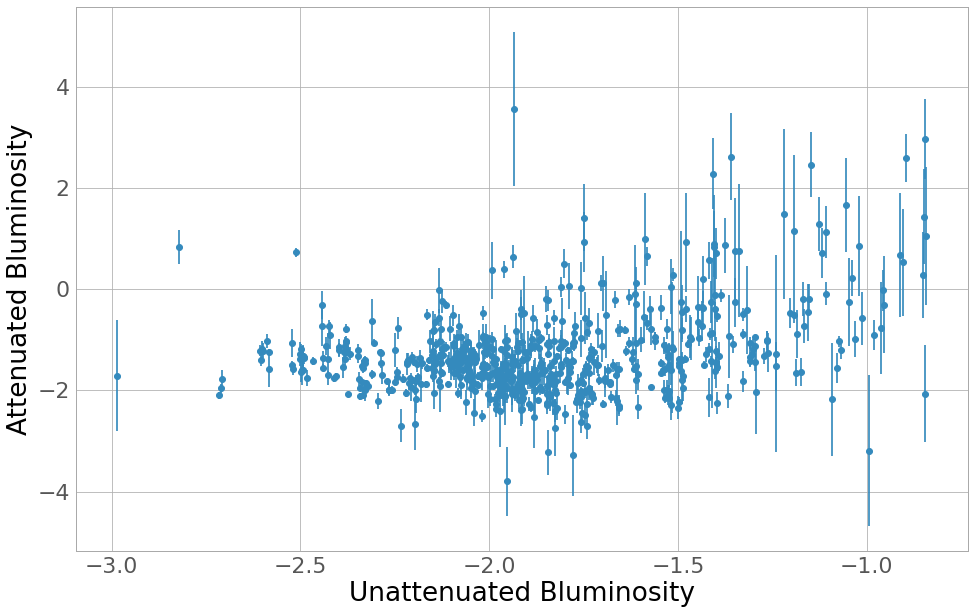

In [178]:
mpl.rcParams.update({'font.size': 22})
fig,ax=plt.subplots(figsize=(16,10))

plt.errorbar(B['betaU'],B['betaP'],xerr=B['betaU_er'],yerr=B['betaP_er'],fmt='o')
plt.xlabel('Unattenuated Bluminosity')
plt.ylabel('Attenuated Bluminosity')

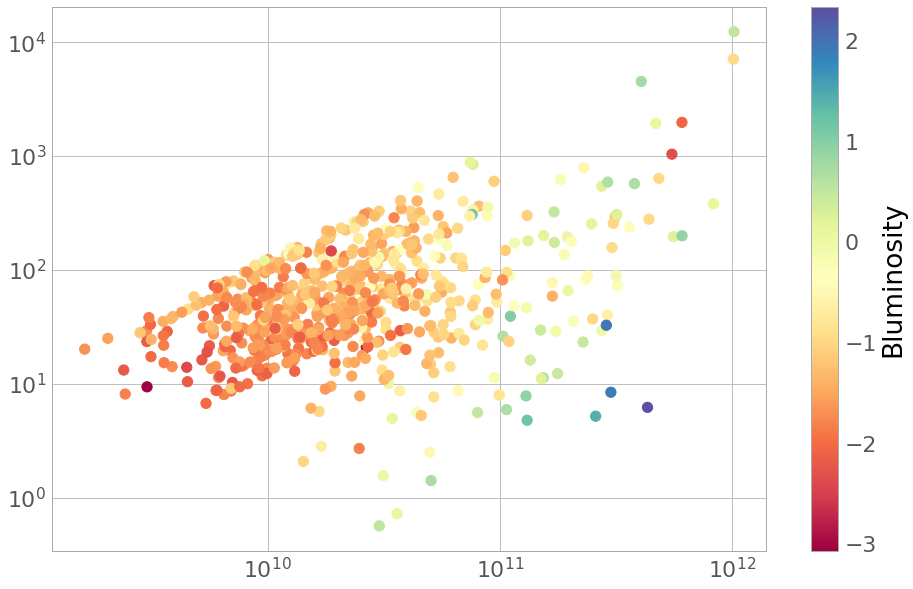

In [31]:
mpl.rcParams.update({'font.size': 22})

fig,ax=plt.subplots(figsize=(16,10))
sc = plt.scatter(F['M(stars)'],F[r'$SFR_{0.1Gyr}$'],label='unattenuated',s=105,c=BFIGM['betaP'],cmap=cm.Spectral)
# plt.scatter(FMELG['M(stars)'],FELG['M(stars)'],c='red',marker='*',s=80)
plt.colorbar(sc,label='Bluminosity')
# plt.scatter(F['M(stars)'],F[r'$SFR_{0.1Gyr}$'],label='unattenuated',s=105,c=B['betaU'])
ax.set_yscale('log')
ax.set_xscale('log')

Text(0, 0.5, 'sion')

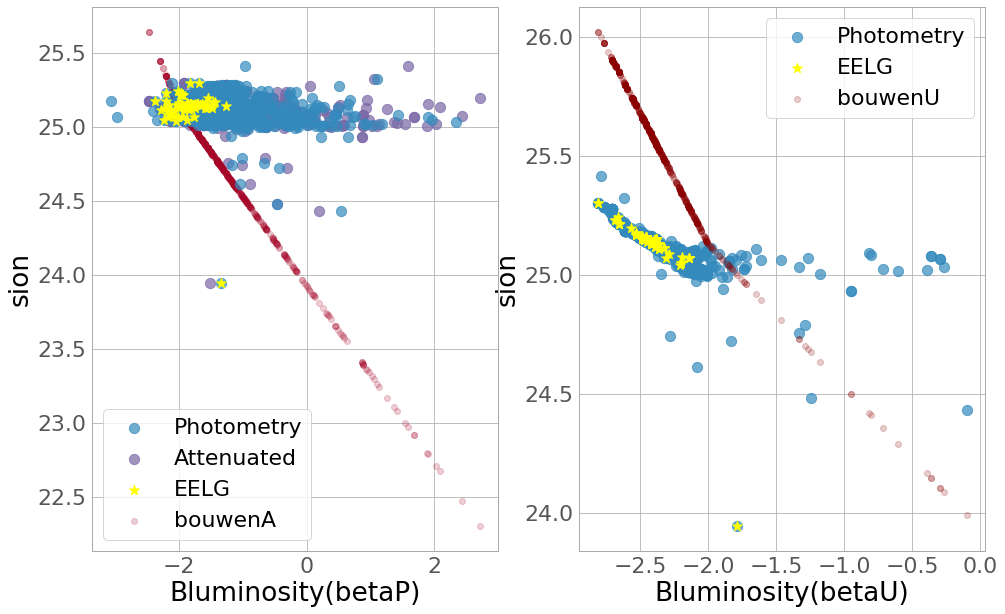

In [60]:
mpl.rcParams.update({'font.size': 22})

fig,ax=plt.subplots(1,2,figsize=(16,10))

# sc=plt.scatter(B['betaP'],B['sion'],label='integrated sion',s=105,c=B['betaU'], alpha=0.7)
# plt.colorbar(sc,label='Unattenuated beta')
ax[0].scatter(B['betaP'],B['sion'],label='Photometry',s=105, alpha=0.7,zorder=2)
ax[0].scatter(B['beta'],B['sion'],label='Attenuated',s=105, alpha=0.7)
# plt.scatter(B['betaU'],B['sion'],label='Unattenuated',s=105, alpha=0.7)
ax[0].scatter(B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaP'],
            B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['sion'],
            marker='*',s=105,c='yellow', label='EELG',zorder=3)
# plt.scatter(B['betaU'],B['bouwen'],label='bouwen')
ax[0].scatter(B['beta'],B['bouwenA'],label='bouwenA',alpha=0.2)
# plt.scatter(B['beta'],B['sion'],label='integrated sion',s=105,c='pink')
# plt.scatter(F[r'$SFR_{0.1Gyr}$'],B['betaP'],label='photometry')
ax[0].legend()
ax[0].set_xlabel('Bluminosity(betaP)')
ax[0].set_ylabel('sion')
# ax.set_xscale('log')
ax[1].scatter(B['betaU'],B['sion'],label='Photometry',s=105, alpha=0.7)
ax[1].scatter(B.where(B['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['betaU'],
            B.where(B['Galaxy_ID'].isin(FMELG['Galaxy_ID'])).dropna()['sion'],
            marker='*',s=105,c='yellow', label='EELG')
ax[1].scatter(B['betaU'],B['bouwen'],label='bouwenU',alpha=0.2,c='darkred')
# ax[1].scatter(B['beta'],B['bouwenA'],label='bouwenA',alpha=0.2,c='red')

ax[1].legend()
ax[1].set_xlabel('Bluminosity(betaU)')
ax[1].set_ylabel('sion')
# ax.set_xlim(0,10**3)
# ax.set_ylim(-3,1)



In [27]:
# B.where(B['Galaxy_ID'].isin(FELG['Galaxy_ID'])).dropna()['betaU']
# df1.where(df1['id'].isin(df2['id'])).dropna()

# B['Galaxy_ID'].iloc[where(B['sion']==min(B['sion']))]
# B.iloc[287]

beta            -2.034331
beta_er          0.003471
betaU           -2.041052
betaU_er         0.003474
betaP           -2.439047
betaP_er         0.272569
bouwen          25.175158
bouwenA         25.167764
sion            25.176576
Galaxy_ID    15561.000000
Name: 287, dtype: float64

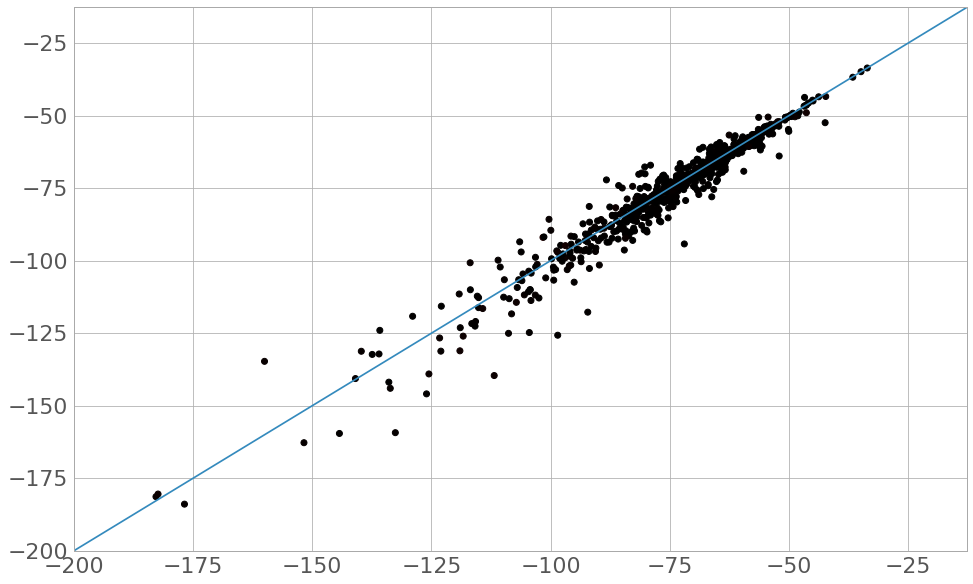

In [85]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))

# sc = plt.scatter(plt.scatter(FMELG['M(stars)'],FELG['M(stars)'],c='red',marker='*',s=80),cmap=cm.Blues,s=105,alpha=0.8)

plt.scatter(S['LP'],Sem['LP'],c=S['SFRburst'])
plt.xlim(-200)
plt.ylim(-200)
plt.plot(linspace(-200,0,10),linspace(-200,0,10))

(1000000000, 10000000000000)

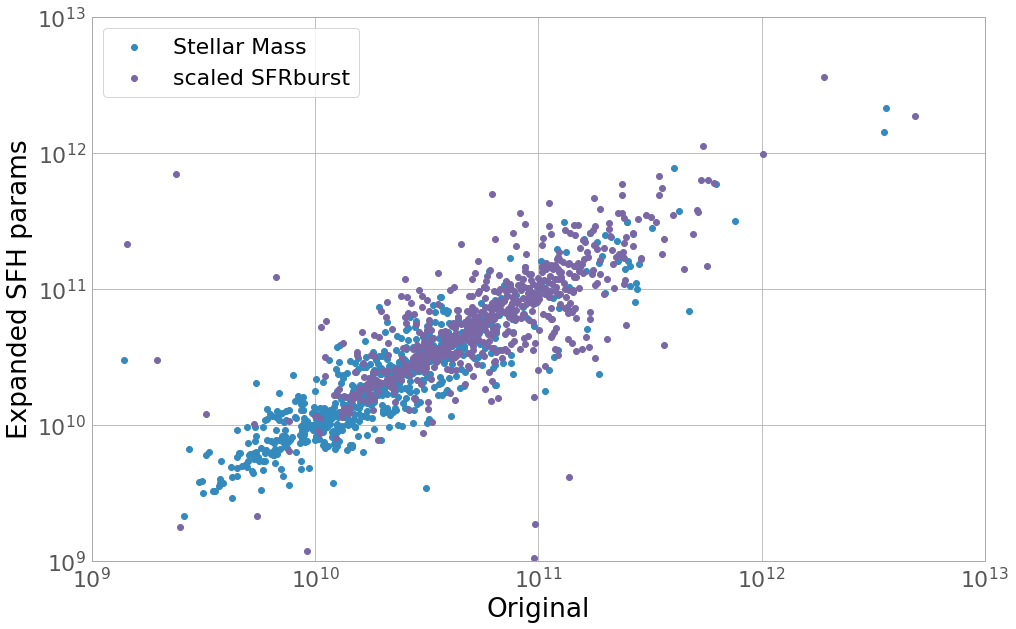

In [20]:
# plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))

plt.scatter(Sem['StellarMass'],Sem2['StellarMass'],label='Stellar Mass')
plt.scatter(Sem['SFRburst']*10**9,Sem2['SFRburst']*10**9,label='scaled SFRburst')
plt.xlabel('Original')
plt.ylabel('Expanded SFH params')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**9,10**13)
ax.set_xlim(10**9,10**13)

Text(0.5, 1.0, 'Expanded parameter limits ProSpect')

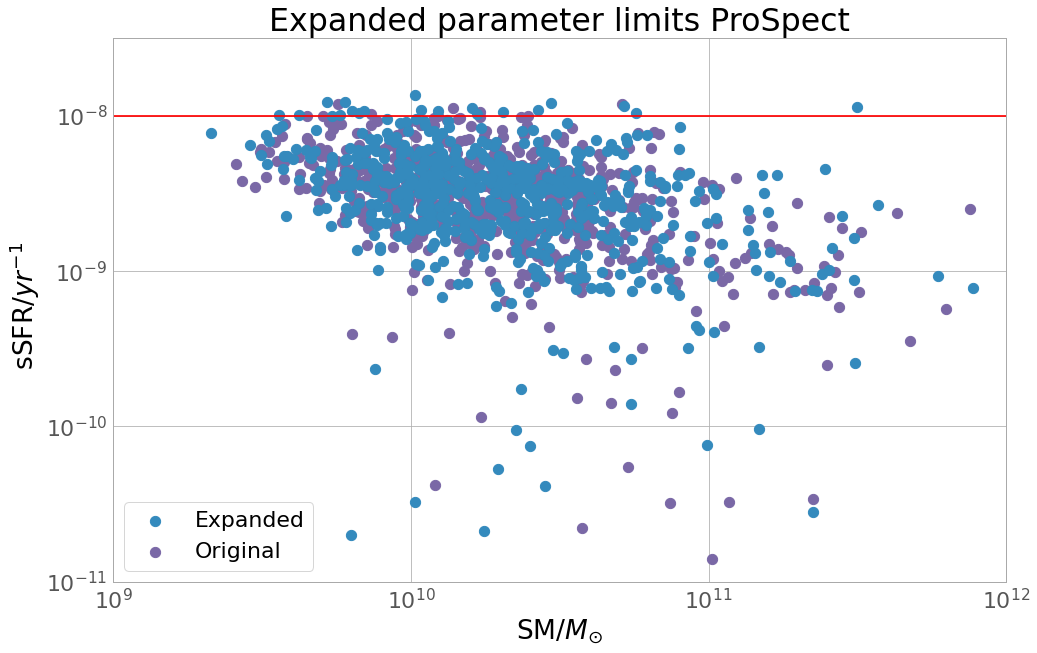

In [47]:
# plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter((ProEELG['StellarMass']),ProEELG['mSFR'])
# plt.scatter(SELG['StellarMass'],SELG['SFRburst']/SELG['StellarMass'], c='r', marker='*', s=105, zorder =2, label='EELGs')
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

plt.scatter(Sem2['StellarMass'],Sem2['SFRburst']/Sem2['StellarMass']
               ,marker='o', alpha=1, zorder=2,s=105, label='Expanded')
plt.scatter(Sem['StellarMass'],Sem['SFRburst']/Sem['StellarMass']
               ,marker='o', alpha=1, zorder=1,s=105, label='Original')
plt.plot(linspace(10**9,10**12,10),linspace(10**-8,10**-8,10),c='red')
# plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
#             (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
# plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
#             (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.ylabel(' sSFR/$yr^{-1}$')#log specific star formation rate/ /yr
plt.xlabel('SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**-11,10**-7.5)
ax.set_xlim(10**9,10**12)
    

plt.title('Expanded parameter limits ProSpect')

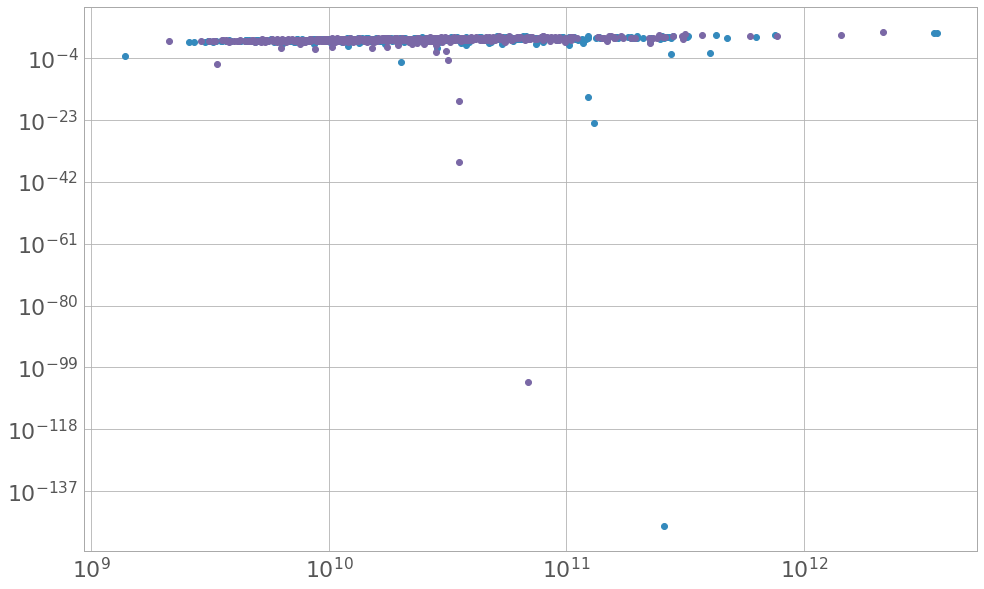

In [35]:
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(Sem['StellarMass'],Sem['SFRburst'])
plt.scatter(Sem2['StellarMass'],Sem2['SFRburst'])
ax.set_xscale('log')
ax.set_yscale('log')
# plt.xlim(10**-4,10**4)

Text(0, 0.5, 'SFH parameters')

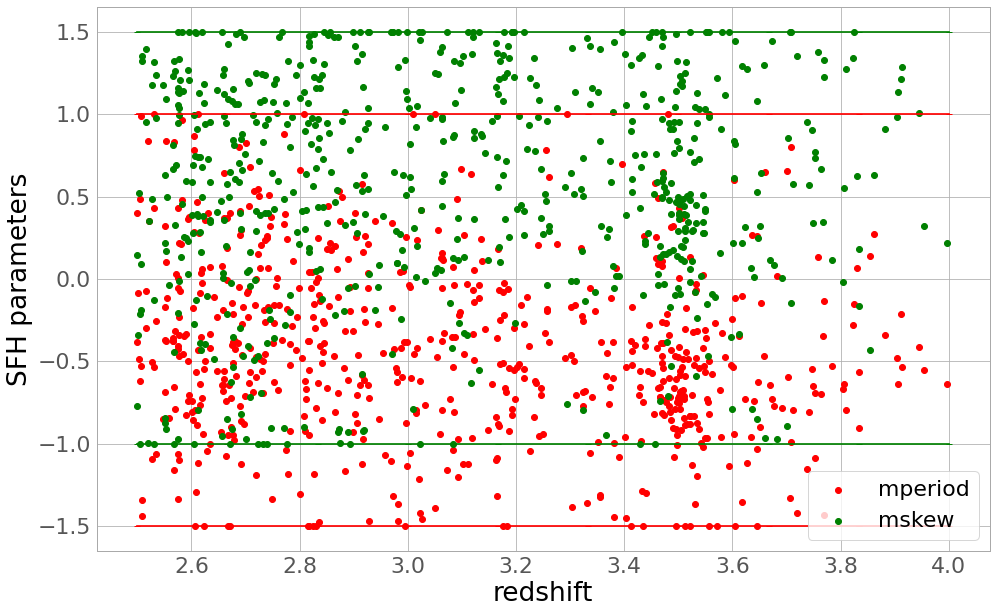

In [21]:
plt.figure(figsize=(16,10))
# plt.scatter(Sem['z'], Sem['mSFR'], c='blue')
# plt.plot(linspace(2.5,4,10),linspace(5,5,10),marker='_',c='blue')
# plt.plot(linspace(2.5,4,10),linspace(-4,-4,10),marker='_',c='blue')
# plt.scatter(Sem['z'], Sem['mpeak'],c='purple')
# plt.plot(linspace(2.5,4,10),linspace(-2,-2,10),marker='_',c='purple')
# plt.plot(linspace(2.5,4,10),linspace(3,3,10),marker='_',c='purple')
plt.scatter(Sem2['z'], Sem2['mperiod'],c='red',label='mperiod')
plt.plot(linspace(2.5,4,10),linspace(-1.5,-1.5,10),marker='_',c='red')
plt.plot(linspace(2.5,4,10),linspace(1,1,10),marker='_',c='red')
plt.scatter(Sem2['z'], Sem2['mskew'],c='green',label='mskew')
plt.plot(linspace(2.5,4,10),linspace(-1,-1,10),marker='_',c='green')
plt.plot(linspace(2.5,4,10),linspace(1.5,1.5,10),marker='_',c='green')
plt.legend()
plt.xlabel('redshift')
plt.ylabel('SFH parameters')
#Sem2 -4,-2,-1.5,-1.0 vs Sem -4, -2, -1,-0.5
#Sem2 5, 3,  1,  1.5  vs Sem  5,  3,  1, 1

In [30]:
sum(Sem2['mperiod']==-1.5)/(sum(Sem2['mperiod']==-1.5)+sum(Sem['mperiod']==-1))
sum(Sem2['mskew']==-1)/(sum(Sem2['mskew']==-1)+sum(Sem['mskew']==-0.5))

0.4375

Text(0, 0.5, 'SFH parameters')

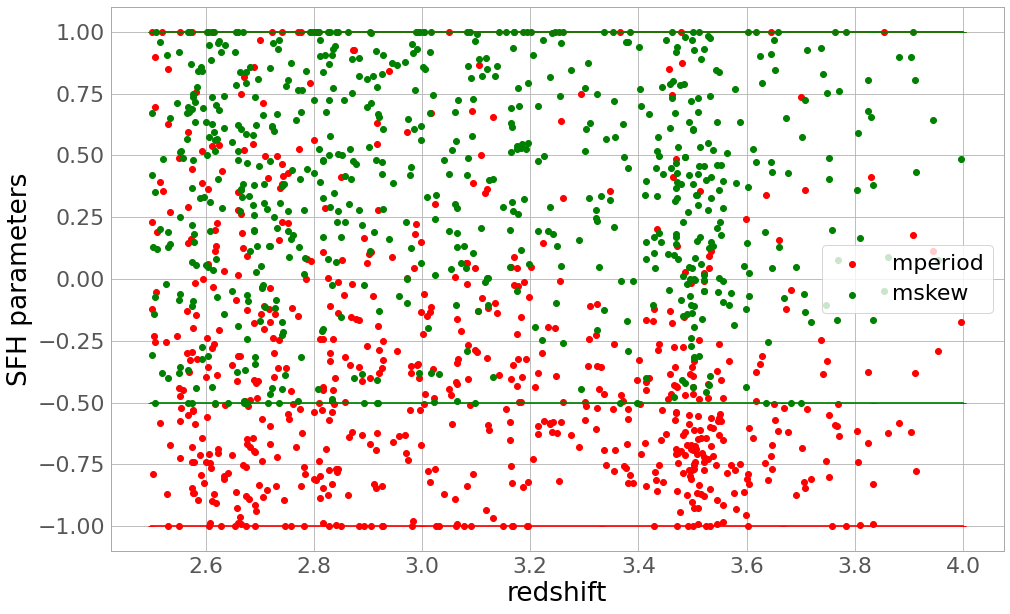

In [62]:
plt.figure(figsize=(16,10))
# plt.scatter(Sem['z'], Sem['mSFR'], c='blue')
# plt.plot(linspace(2.5,4,10),linspace(5,5,10),marker='_',c='blue')
# # plt.plot(linspace(2.5,4,10),linspace(-4,-4,10),marker='_',c='blue')
# plt.scatter(Sem['z'], Sem['mpeak'],c='purple')
# plt.plot(linspace(2.5,4,10),linspace(-2,-2,10),marker='_',c='purple')
# plt.plot(linspace(2.5,4,10),linspace(3,3,10),marker='_',c='purple')
plt.scatter(Sem['z'], Sem['mperiod'],c='red',label='mperiod')
plt.plot(linspace(2.5,4,10),linspace(-1,-1,10),marker='_',c='red')
plt.plot(linspace(2.5,4,10),linspace(1,1,10),marker='_',c='red')
plt.scatter(Sem['z'], Sem['mskew'],c='green',label='mskew')
plt.plot(linspace(2.5,4,10),linspace(-0.5,-0.5,10),marker='_',c='green')
plt.plot(linspace(2.5,4,10),linspace(1,1,10),marker='_',c='green')
plt.legend()
plt.xlabel('redshift')
plt.ylabel('SFH parameters')


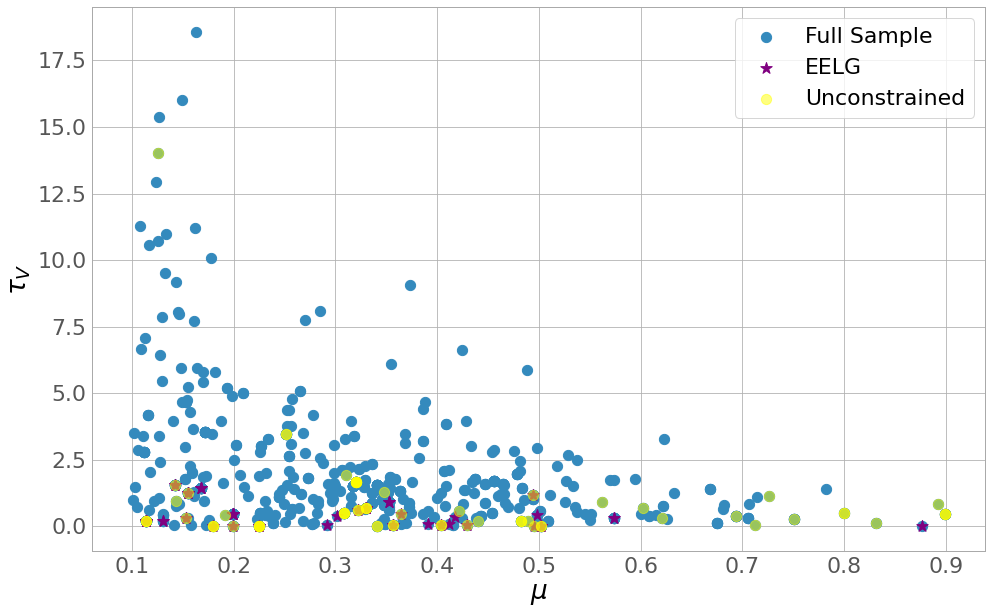

In [74]:
plt.figure(figsize=(16,10))
plt.scatter(F[r'$\mu$'],F[r'$\tau_V$'],label='Full Sample',s=105)
plt.scatter(FELG[r'$\mu$'],FELG[r'$\tau_V$'],label='EELG',s=145,marker='*',c='purple')
plt.scatter(Fun[r'$\mu$'],Fun[r'$\tau_V$'],label='Unconstrained',s=105,alpha=0.5,c='yellow')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\tau_V$')
plt.legend()

Text(0.5, 1.0, 'Stellar Mass vs Star Formation Rate ProSpect with Emission')

<Figure size 1152x720 with 0 Axes>

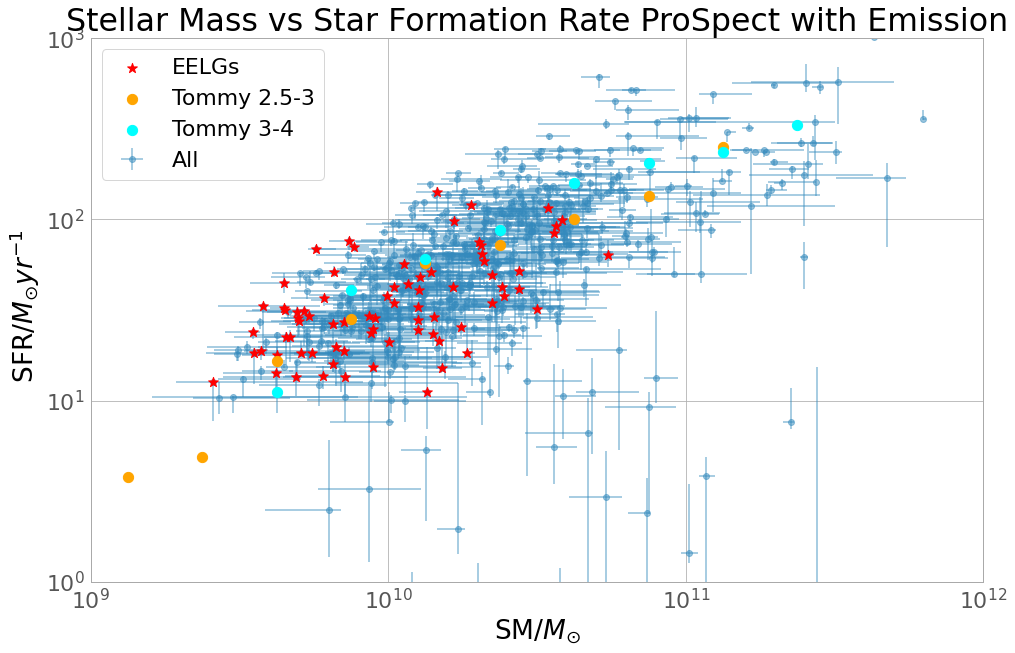

In [5]:
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter((ProEELG['StellarMass']),ProEELG['mSFR'])
plt.scatter(SemELG['StellarMass'],SemELG['SFRburst'], c='r', marker='*', s=105, zorder =2, label='EELGs')
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

plt.errorbar(Sem['StellarMass'],Sem['SFRburst']
             ,xerr=(Sem['StellarMass']-Sem['StellarMass_LB'],Sem['StellarMass_UB']-Sem['StellarMass'])
             ,yerr=(Sem['SFRburst']-Sem['SFRburst_LB'],Sem['SFRburst_UB']-Sem['SFRburst']),fmt='o', alpha=0.5, zorder=1, label='All')
plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
            (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
            (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.ylabel(' SFR/$M_{\odot}yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000)
ax.set_xlim(10**9,10**12)
    

plt.title('Stellar Mass vs Star Formation Rate ProSpect with Emission')

Text(0.5, 1.0, 'Stellar Mass vs Star Formation Rate ProSpect')

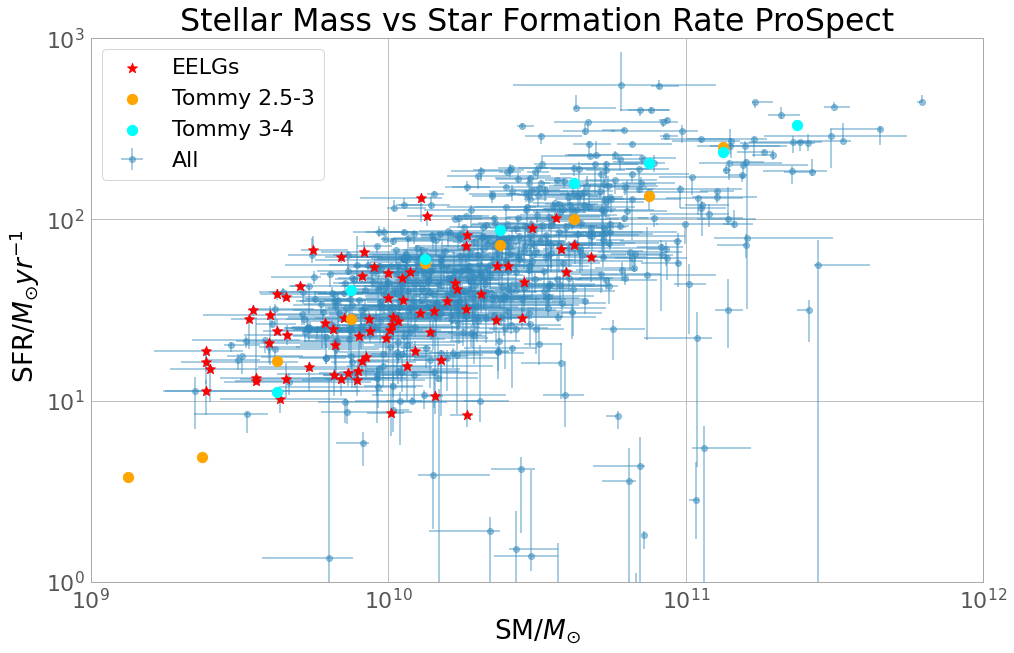

In [6]:
# plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter((SELG['StellarMass']),SELG['mSFR'])
plt.scatter(SELG['StellarMass'],SELG['SFRburst'], c='r', marker='*', s=105, zorder =2, label='EELGs')
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

plt.errorbar(S['StellarMass'],S['SFRburst']
             ,xerr=(S['StellarMass']-S['StellarMass_LB'],S['StellarMass_UB']-S['StellarMass'])
             ,yerr=(S['SFRburst']-S['SFRburst_LB'],S['SFRburst_UB']-S['SFRburst']),fmt='o', alpha=0.5, zorder=1, label='All')
plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
            (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
            (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.ylabel(' SFR/$M_{\odot}yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000)
ax.set_xlim(10**9,10**12)
    

plt.title('Stellar Mass vs Star Formation Rate ProSpect')

/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0.5, 1.0, 'Stellar Mass vs Specific Star Formation Rate ProSpect')

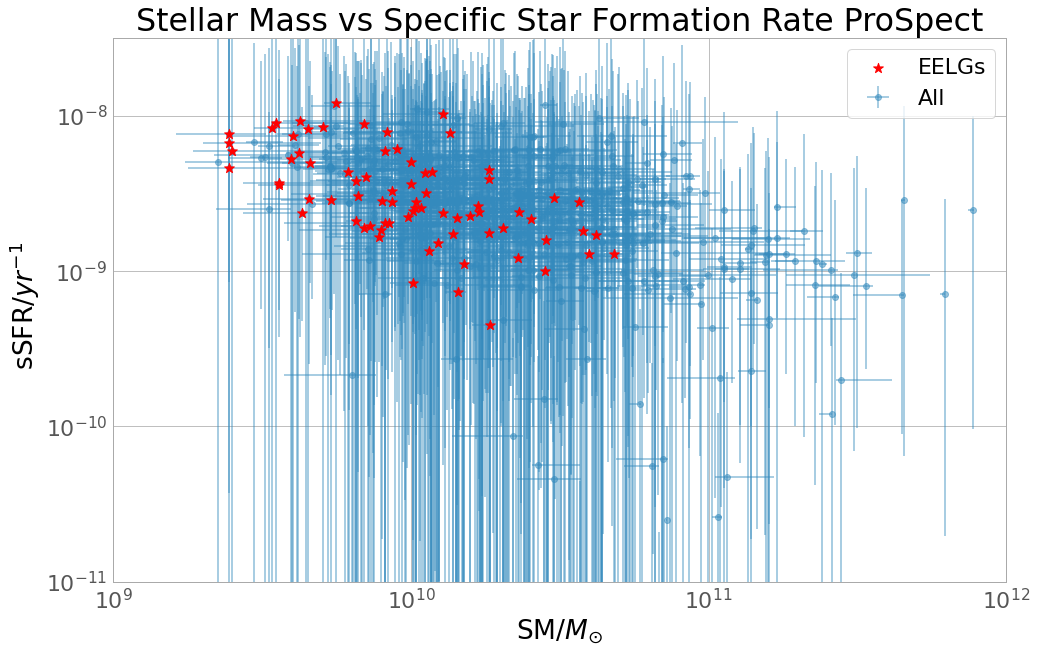

In [44]:
# plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter((ProEELG['StellarMass']),ProEELG['mSFR'])
plt.scatter(SELG['StellarMass'],SELG['SFRburst']/SELG['StellarMass'], c='r', marker='*', s=105, zorder =2, label='EELGs')
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

plt.errorbar(S['StellarMass'],S['SFRburst']/S['StellarMass']
             ,xerr=(S['StellarMass']-S['StellarMass_LB'],
                    S['StellarMass_UB']-S['StellarMass'])
             ,yerr=((S['SFRburst']/S['StellarMass']-((S['SFRburst']/S['StellarMass'])*(S['SFRburst_LB']/S['SFRburst']-S['StellarMass_LB']/S['StellarMass']))),
                    (((S['SFRburst_UB']/S['SFRburst']+S['StellarMass_UB']/S['StellarMass'])*S['SFRburst']/S['StellarMass'])+S['SFRburst']/S['StellarMass'])),
             fmt='o', alpha=0.5, zorder=1, label='All')
# plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
#             (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
# plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
#             (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.ylabel(' sSFR/$yr^{-1}$')#log specific star formation rate/ /yr
plt.xlabel('SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**-11,10**-7.5)
ax.set_xlim(10**9,10**12)
    

plt.title('Stellar Mass vs Specific Star Formation Rate ProSpect')

Text(0.5, 1.0, 'Stellar Mass vs Specific Star Formation Rate ProSpect- emission removed')

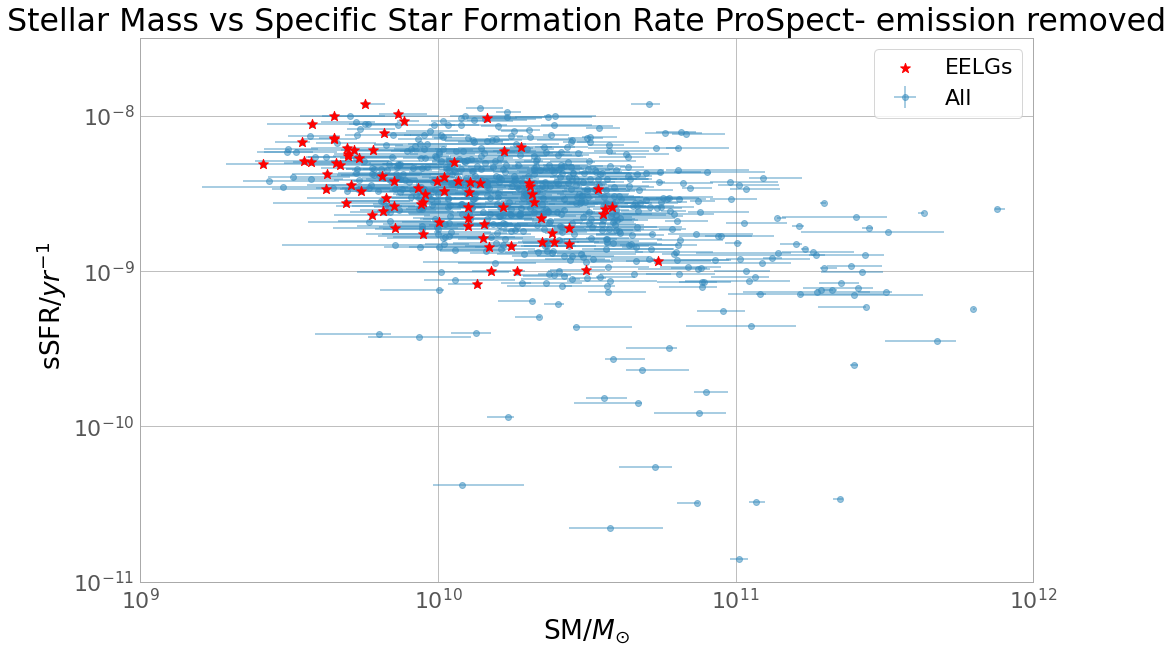

In [8]:
# plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter((ProEELG['StellarMass']),ProEELG['mSFR'])
plt.scatter(SemELG['StellarMass'],SemELG['SFRburst']/SemELG['StellarMass'], c='r', marker='*', s=105, zorder =2, label='EELGs')
# plt.errorbar(SAMPLE_em['StellarMass'],SAMPLE_em['mSFR']
#              ,xerr=(SAMPLE_em['StellarMass']-SAMPLE_em['StellarMass_LB'],SAMPLE_em['StellarMass_UB']-SAMPLE_em['StellarMass'])
#              ,yerr=(SAMPLE_em['mSFR']-SAMPLE_em['mSFR_LB'],SAMPLE_em['mSFR_UB']-SAMPLE_em['mSFR']),fmt='o', alpha=0.5, zorder=1, label='All')

plt.errorbar(Sem['StellarMass'],Sem['SFRburst']/Sem['StellarMass']
             ,xerr=(Sem['StellarMass']-Sem['StellarMass_LB'],
                    Sem['StellarMass_UB']-Sem['StellarMass'])
             ,yerr=(Sem['SFRburst']/Sem['StellarMass']-(Sem['SFRburst_LB']+Sem['StellarMass_LB']),
                    (Sem['SFRburst_UB']+Sem['StellarMass_UB'])-Sem['SFRburst']/Sem['StellarMass']),
             fmt='o', alpha=0.5, zorder=1, label='All')
# plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
#             (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
# plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
#             (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.ylabel(' sSFR/$yr^{-1}$')#log specific star formation rate/ /yr
plt.xlabel('SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**-11,10**-7.5)
ax.set_xlim(10**9,10**12)
    

plt.title('Stellar Mass vs Specific Star Formation Rate ProSpect- emission removed')

Text(0.5, 1.0, 'ProSpect Stellar Mass')

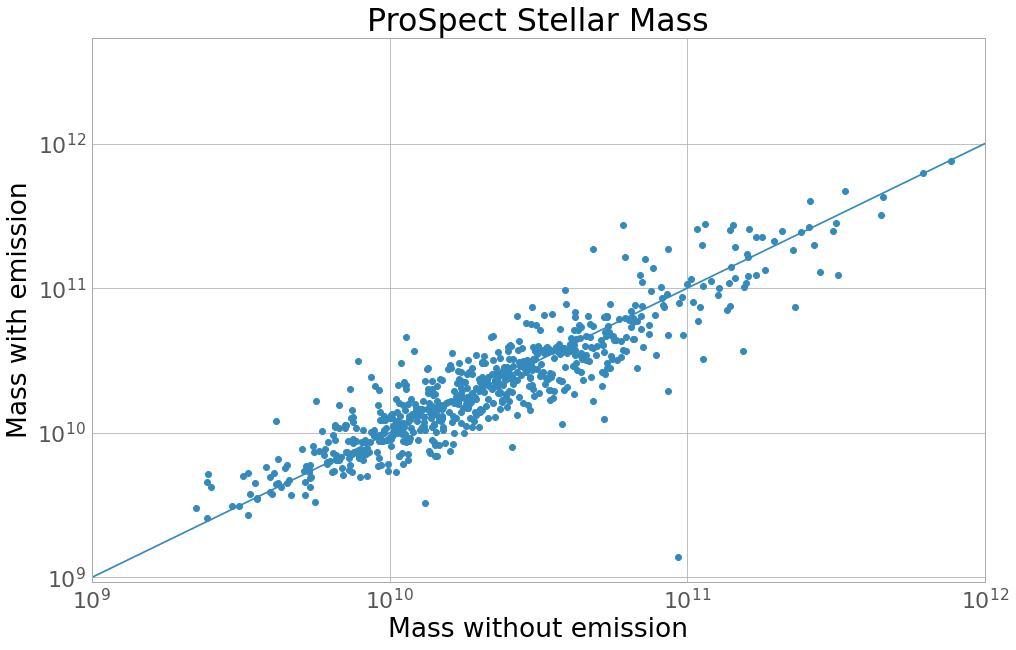

In [9]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(S['StellarMass'],Sem['StellarMass'])
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100))
plt.xlabel('Mass without emission')
plt.ylabel('Mass with emission')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**9,10**12)
plt.title('ProSpect Stellar Mass')

Text(0.5, 1.0, 'Stellar Mass vs Star Formation Rate MAGPHYS')

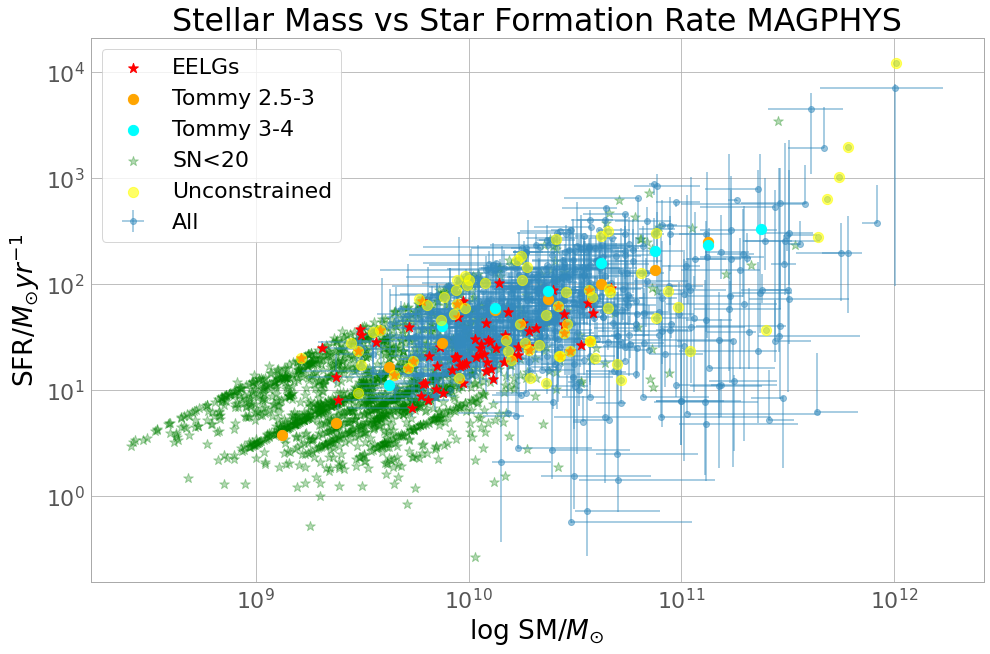

In [77]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(FELG['M(stars)'],(FELG[r'$SFR_{0.1Gyr}$']),c='r', marker='*', s=105, zorder =3, label='EELGs')

plt.errorbar(F['M(stars)'],(F[r'$SFR_{0.1Gyr}$'])
             ,xerr=(((F['M(stars)'])-(Fers['SMl']))
                    ,((Fers['SMh'])-(F['M(stars)'])))
             ,yerr=((F[r'$SFR_{0.1Gyr}$'])-(Fers['SFRl'])
                    ,(Fers['SFRh'])-(F[r'$SFR_{0.1Gyr}$']))
             ,fmt='o', alpha=0.5, zorder=2, label='All')
plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
            (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
            (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')

plt.scatter(T['M(stars)'],(T[r'$SFR_{0.1Gyr}$']),c='g', marker='*', s=105, zorder =1, label='SN<20',alpha=0.3)
plt.scatter(Fun['M(stars)'],Fun[r'$SFR_{0.1Gyr}$'],c='yellow',s=105,zorder=4,label='Unconstrained',alpha=0.6)
plt.ylabel('SFR/$M_{\odot}yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-2,5)
plt.title('Stellar Mass vs Star Formation Rate MAGPHYS')

Text(0.5, 0, 'log SM/$M_{\\odot}$')

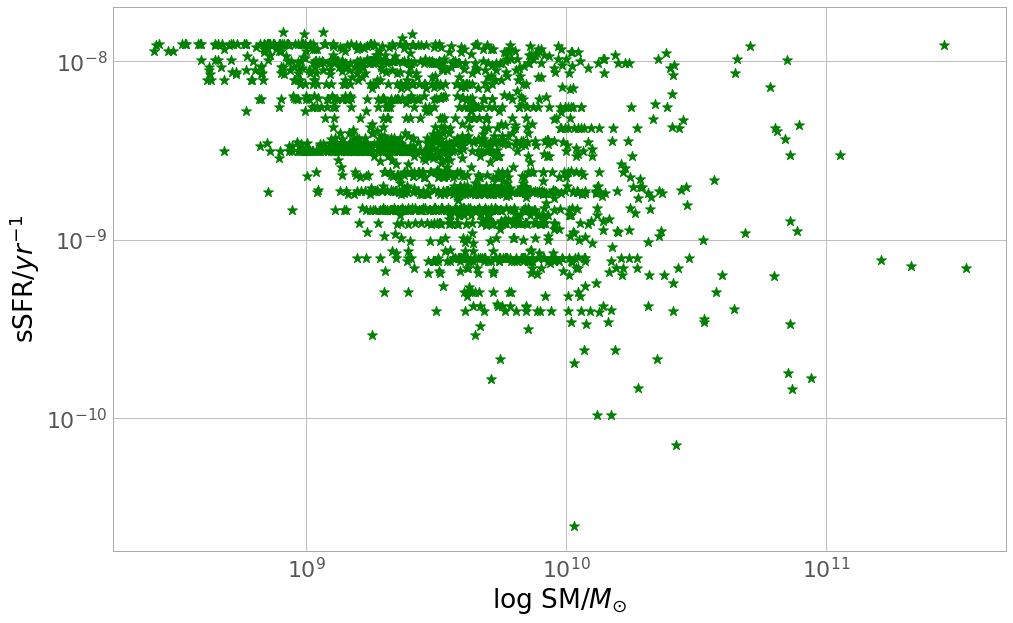

In [73]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))

plt.scatter(T['M(stars)'],(T[r'sSFR$_{0.1Gyr}$']),c='g', marker='*', s=105, zorder =4, label='SN<20')
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('sSFR/$yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')


Text(0.5, 1.0, 'Stellar Mass vs Star Formation Rate MAGPHYS- Kband removed')

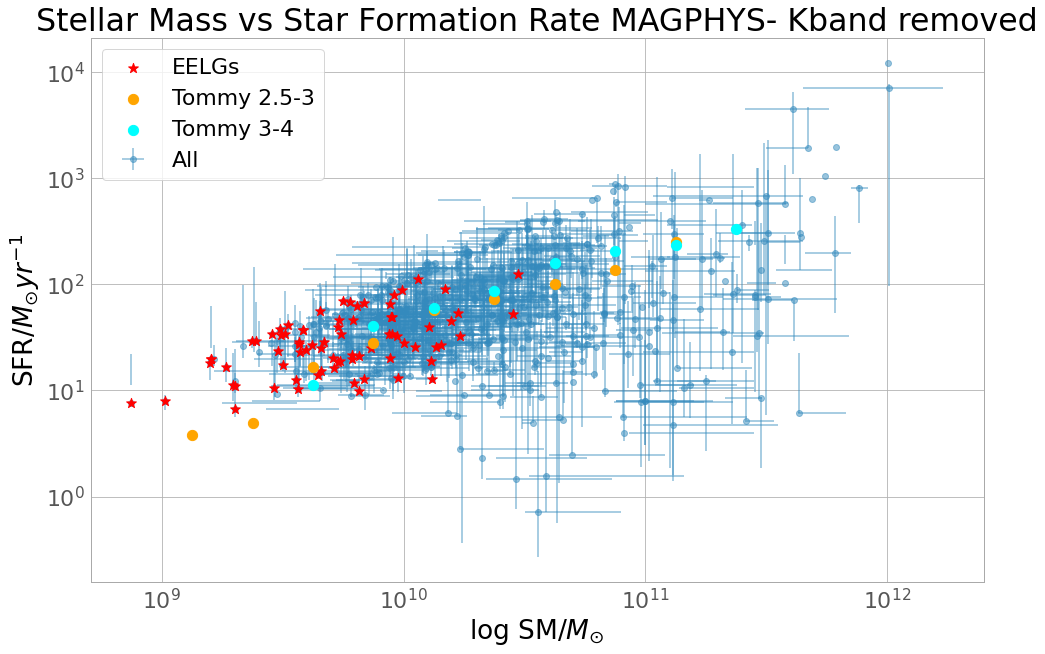

In [12]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(FMELG['M(stars)'],(FMELG[r'$SFR_{0.1Gyr}$']),c='r', marker='*', s=105, zorder =2, label='EELGs')

plt.errorbar(FM['M(stars)'],(FM[r'$SFR_{0.1Gyr}$'])
             ,xerr=(((FM['M(stars)'])-(FMers['SMl']))
                    ,((FMers['SMh'])-(FM['M(stars)'])))
             ,yerr=((FM[r'$SFR_{0.1Gyr}$'])-(FMers['SFRl'])
                    ,(FMers['SFRh'])-(FM[r'$SFR_{0.1Gyr}$']))
             ,fmt='o', alpha=0.5, zorder=1, label='All')
plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
            (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
            (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')


plt.ylabel('SFR/$M_{\odot}yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-2,5)
plt.title('Stellar Mass vs Star Formation Rate MAGPHYS- Kband removed')

Text(0.5, 1.0, 'Stellar Mass vs Specific Star Formation Rate MAGPHYS')

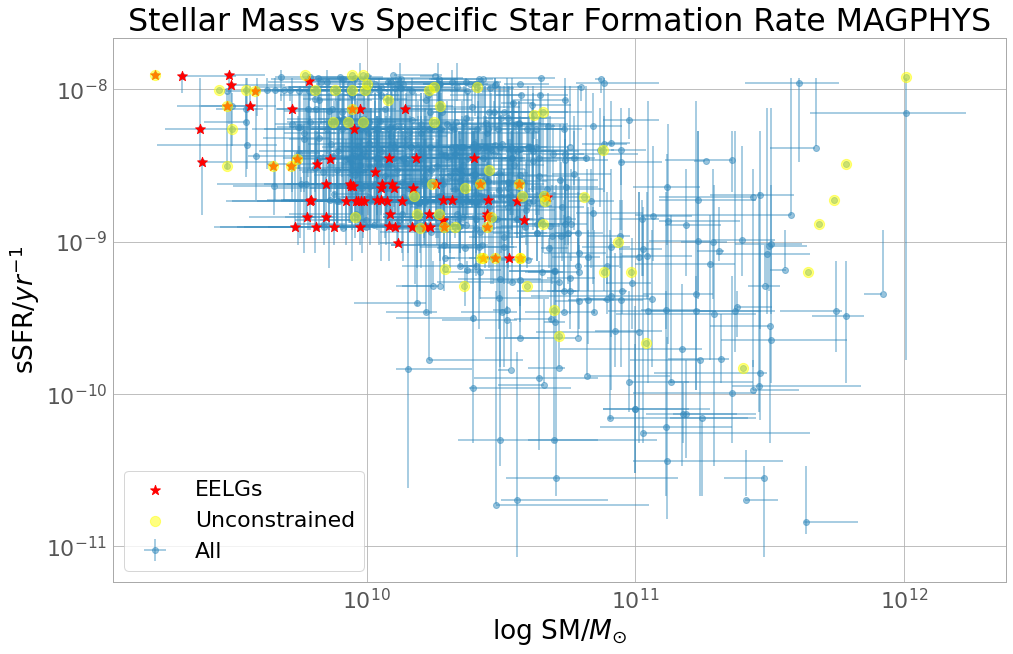

In [78]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(FELG['M(stars)'],(FELG[r'sSFR$_{0.1Gyr}$']),c='r', marker='*', s=105, zorder =2, label='EELGs')

plt.errorbar(F['M(stars)'],(F[r'sSFR$_{0.1Gyr}$'])
             ,xerr=(((F['M(stars)'])-(Fers['SMl']))
                    ,((Fers['SMh'])-(F['M(stars)'])))
             ,yerr=((F[r'sSFR$_{0.1Gyr}$'])-(Fers['sSFRl'])
                    ,(Fers['sSFRh'])-(F[r'sSFR$_{0.1Gyr}$']))
             ,fmt='o', alpha=0.5, zorder=1, label='All')
# plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
#             (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
# plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
#             (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')
plt.scatter(Fun['M(stars)'],Fun[r'sSFR$_{0.1Gyr}$'],c='yellow',s=105,zorder=3,label='Unconstrained',alpha=0.5)

plt.ylabel('sSFR/$yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-2,5)
plt.title('Stellar Mass vs Specific Star Formation Rate MAGPHYS')

Text(0.5, 1.0, 'Stellar Mass vs Specific Star Formation Rate MAGPHYS- Kband removed')

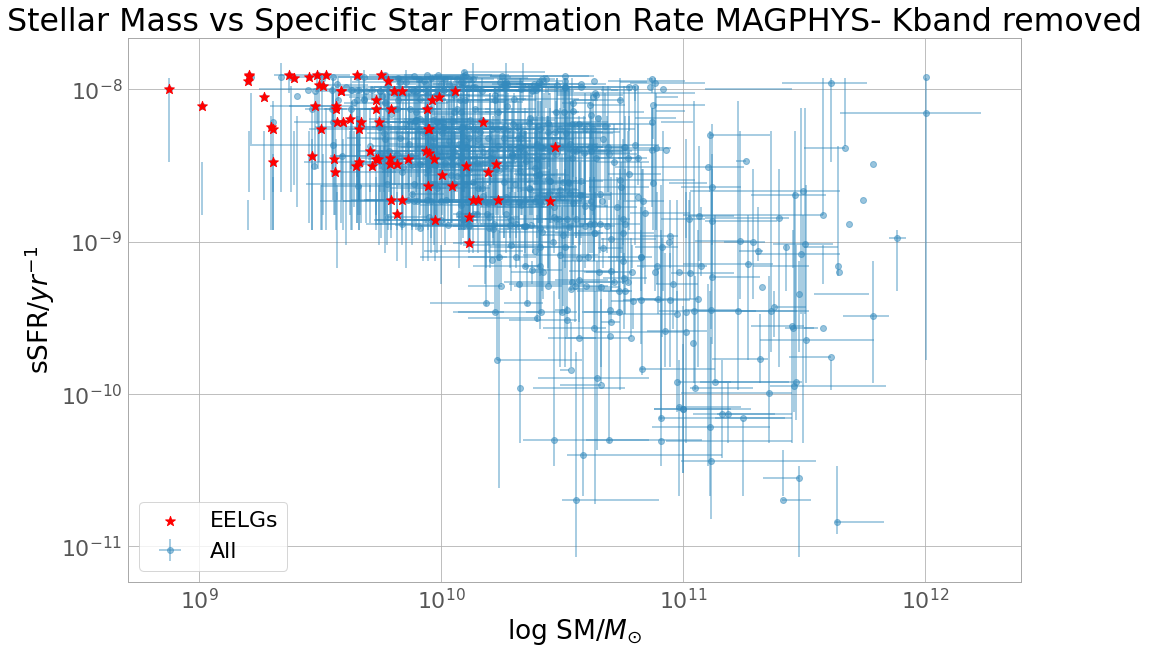

In [14]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(FMELG['M(stars)'],(FMELG[r'sSFR$_{0.1Gyr}$']),c='r', marker='*', s=105, zorder =2, label='EELGs')

plt.errorbar(FM['M(stars)'],(FM[r'sSFR$_{0.1Gyr}$'])
             ,xerr=(((FM['M(stars)'])-(FMers['SMl']))
                    ,((FMers['SMh'])-(FM['M(stars)'])))
             ,yerr=((FM[r'sSFR$_{0.1Gyr}$'])-(FMers['sSFRl'])
                    ,(FMers['sSFRh'])-(FM[r'sSFR$_{0.1Gyr}$']))
             ,fmt='o', alpha=0.5, zorder=1, label='All')
# plt.scatter((10**9.125,10**9.375,10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125),
#             (10**0.58,10**0.69,10**1.22,10**1.45,10**1.76,10**1.86,10**2.00,10**2.13,10**2.40),c='orange',s=105,zorder=3,label='Tommy 2.5-3')
# plt.scatter((10**9.625,10**9.875,10**10.125,10**10.375,10**10.625,10**10.875,10**11.125,10**11.375),
#             (10**1.05,10**1.61,10**1.78,10**1.94,10**2.2,10**2.31,10**2.37,10**2.52),c='cyan',s=105,zorder=4,label='Tommy 3-4')


plt.ylabel('sSFR/$yr^{-1}$')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(-2,5)
plt.title('Stellar Mass vs Specific Star Formation Rate MAGPHYS- Kband removed')

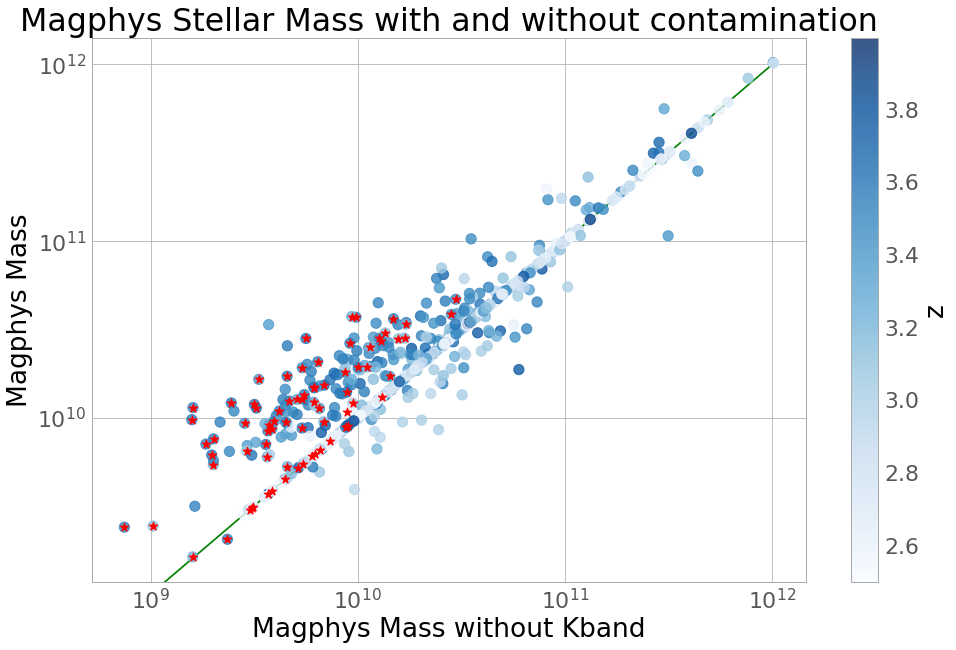

In [51]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter(FM['M(stars)'],F['M(stars)'])
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100),zorder=1,c='green')
plt.xlabel('Magphys Mass without Kband')
plt.ylabel('Magphys Mass')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(10**9,10**12)
plt.title('Magphys Stellar Mass with and without contamination')

sc = plt.scatter(FM['M(stars)'],F['M(stars)'],c=F['redshift'],cmap=cm.Blues,s=105,alpha=0.8)
plt.scatter(FMELG['M(stars)'],FELG['M(stars)'],c='red',marker='*',s=80)
plt.colorbar(sc,label='z')#,aspect=8,fraction=0.04)
# plt.colorbar(sc2,label='z')

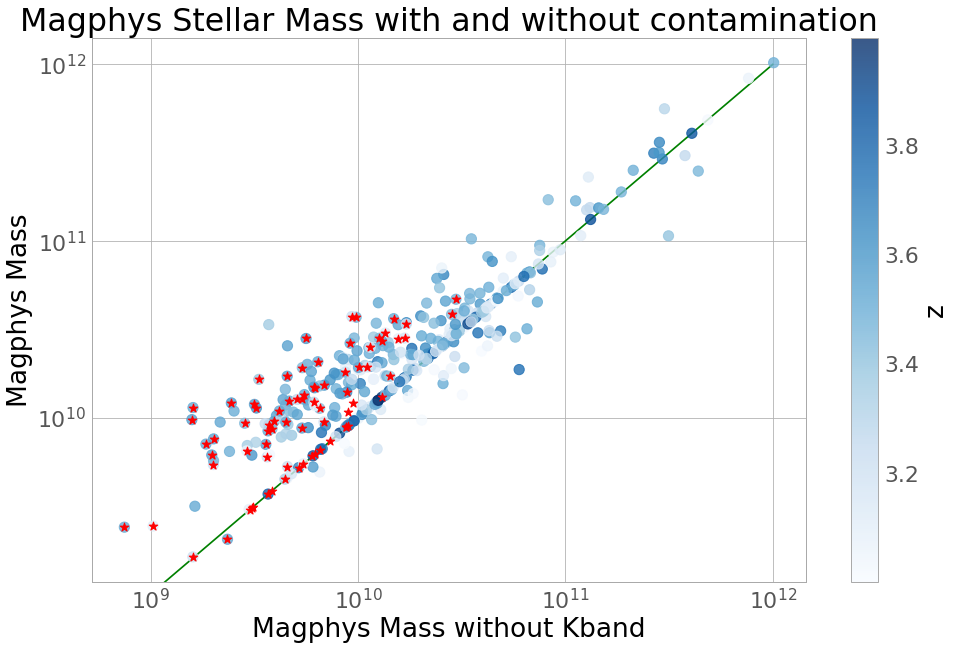

In [82]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
# plt.scatter(FM['M(stars)'],F['M(stars)'])

Q=F['redshift']>3
Q=F[Q]
QM=FM['redshift']>3
QM=FM[QM]
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100),zorder=1,c='green')
plt.xlabel('Magphys Mass without Kband')
plt.ylabel('Magphys Mass')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(10**9,10**12)
plt.title('Magphys Stellar Mass with and without contamination')

sc = plt.scatter(QM['M(stars)'],Q['M(stars)'],c=Q['redshift'],cmap=cm.Blues,s=105,alpha=0.8)
plt.scatter(FMELG['M(stars)'],FELG['M(stars)'],c='red',marker='*',s=80)
plt.colorbar(sc,label='z')#,aspect=8,fraction=0.04)
# plt.colorbar(sc2,label='z')

Text(0, 0.5, 'Dust Luminosity/$L_\\odot$')

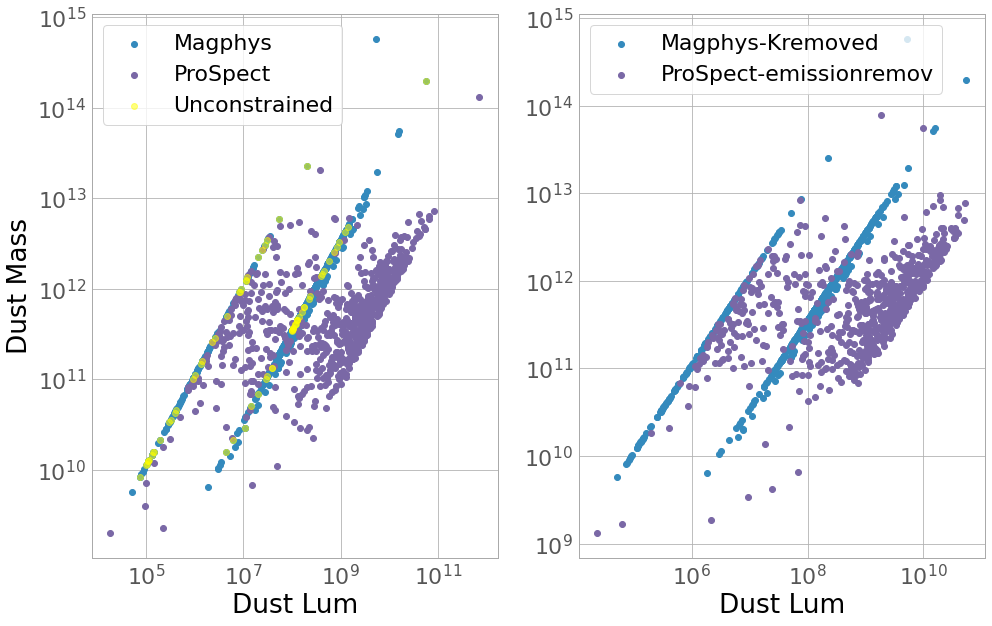

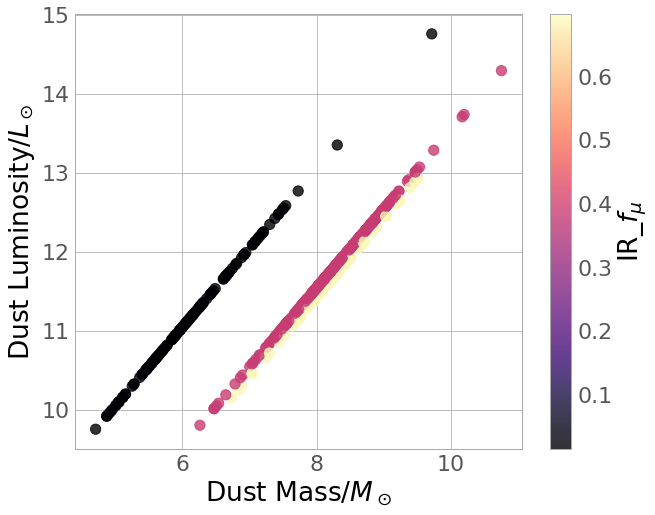

In [79]:

mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,2,figsize=(16,10))

# plt.scatter(F[r'SFH $f_{mu}$'],F[r'IR $f_{mu}$'])
ax[0].scatter(F['M(dust)'],F['Ldust'],label='Magphys')#,c=F[r'IR $f_{mu}$'])
ax[0].scatter(S['dustmass.total'],S['dustlum.total'],label='ProSpect')
ax[0].scatter(Fun['M(dust)'],Fun['Ldust'],label='Unconstrained',c='yellow',alpha=0.5)

ax[1].scatter(FM['M(dust)'],FM['Ldust'],label='Magphys-Kremoved')
ax[1].scatter(Sem['dustmass.total'],Sem['dustlum.total'],label='ProSpect-emissionremov')




ax[0].set_ylabel('Dust Mass')#log star formation rate/ M_star/yr
ax[0].set_xlabel('Dust Lum')
ax[1].set_xlabel('Dust Lum')
ax[0].legend()
ax[1].legend()
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

plt.figure(figsize=(10,8))
sc = plt.scatter(log10(F['M(dust)']),log10(F['Ldust']),c=F[r'IR $f_{mu}$'],cmap=cm.magma,s=105,alpha=0.8,label='Magphys')
# plt.scatter(FMELG['M(stars)'],FELG['M(stars)'],c='red',marker='*',s=80)
plt.colorbar(sc,label='IR_$f_\mu$')
plt.xlabel('Dust Mass/$M_\odot$')
plt.ylabel('Dust Luminosity/$L_\odot$')

Text(0.5, 1.0, 'ProSpect/Magphys Stellar Mass')

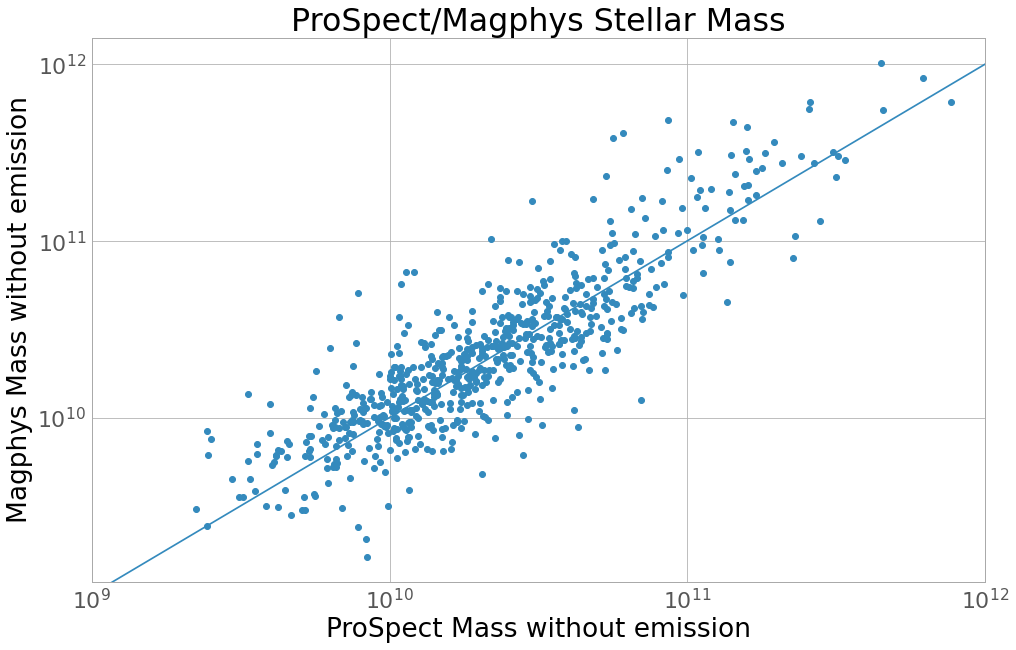

In [32]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(S['StellarMass'],F['M(stars)'])
plt.plot(linspace(0,10**12,100),linspace(0,10**12,100))
plt.xlabel('ProSpect Mass without emission')
plt.ylabel('Magphys Mass without emission')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**9,10**12)
plt.title('ProSpect/Magphys Stellar Mass')

In [73]:
Sem[Sem['StellarMass']==min(Sem['StellarMass'])]

id        z      mSFR     mpeak   mperiod    mskew  tau_birth  \
266  17374  2.74547  2.464755  2.863582 -0.892745  0.38609   0.710139   

     tau_screen  alpha_SF_birth  alpha_SF_screen  Zfinal         LP  \
266   -1.743625        1.875086         0.541355    -1.3 -52.431516   

          masstot  dustmass.birth  dustmass.screen  dustmass.total  \
266  1.177797e+11     5345.247717     17942.197001    23287.444718   

     dustlum.birth  dustlum.screen  dustlum.total  SFRburst   StellarMass  \
266   3.299257e+06    1.320402e+09   1.323701e+09  0.000664  1.385841e+09   

      mSFR_LB  mpeak_LB  mperiod_LB  mskew_LB  tau_birth_LB  tau_screen_LB  \
266  2.403681  2.398677        -1.0  0.175646     -1.109644       -2.23409   

     alpha_SF_birth_LB  alpha_SF_screen_LB  Zfinal_LB      LP_LB  \
266                0.0                 0.0  -2.018192 -57.353521   

       masstot_LB  dustmass.birth_LB  dustmass.screen_LB  dustmass.total_LB  \
266  8.480311e+10           2.068945         4139.217247        4141.531057   

     dustlum.birth_LB  dustlum.screen_LB  dustlum.total_LB   SFRburst_LB  \
266      35259.492308       4.652425e+08      4.665880e+08  7.972184e-43   

     StellarMass_LB   mSFR_UB  mpeak_UB  mperiod_UB  mskew_UB  tau_birth_UB  \
266    9.978259e+08  2.520411       3.0   -0.844577  0.427864           1.5   

     tau_screen_UB  alpha_SF_birth_UB  alpha_SF_screen_UB  Zfinal_UB  \
266      -0.784209           2.214584            1.370489       -1.3   

         LP_UB    masstot_UB  dustmass.birth_UB  dustmass.screen_UB  \
266 -52.431516  1.267145e+11      230772.043794        1.137601e+06   

     dustmass.total_UB  dustlum.birth_UB  dustlum.screen_UB  dustlum.total_UB  \
266       1.137654e+06      1.594722e+08       1.099369e+10      1.099380e+10   

     SFRburst_UB  StellarMass_UB  
266     0.012734    1.490972e+09

(1, 3000)

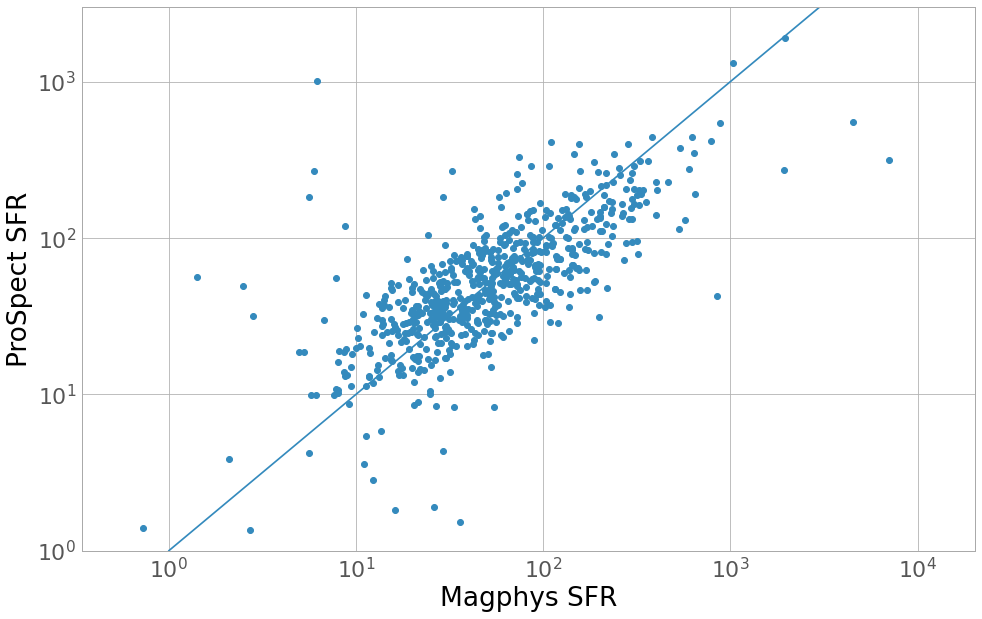

In [33]:
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter((F[r'$SFR_{0.1Gyr}$']),(S['SFRburst']))
plt.xlabel('Magphys SFR')
plt.ylabel('ProSpect SFR')
plt.plot(linspace(1,3500,10),linspace(1,3500,10))

ax.set_xscale('log')
ax.set_yscale('log')
plt.ylim(1,3000)

In [116]:
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    return fig,ax1,ax2,ax3

In [123]:
SAM_z = SAMPLE_em['z']
Pro_z = ProEELG['z']
SAM_SM = SAMPLE_em['StellarMass']
Pro_SM = ProEELG['StellarMass']
SAM_SFR = log10(SAMPLE_em['SFRburst'])
Pro_SFR = log10(ProEELG['SFRburst'])
SAM_dlum = SAMPLE_em['dustlum.total']
Pro_dlum = ProEELG['dustlum.total']
SAM_dmas = SAMPLE_em['dustmass.total']
Pro_dmas = ProEELG['dustmass.total']

/tmp/ipykernel_16351/1110885094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colour[i] =nan
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


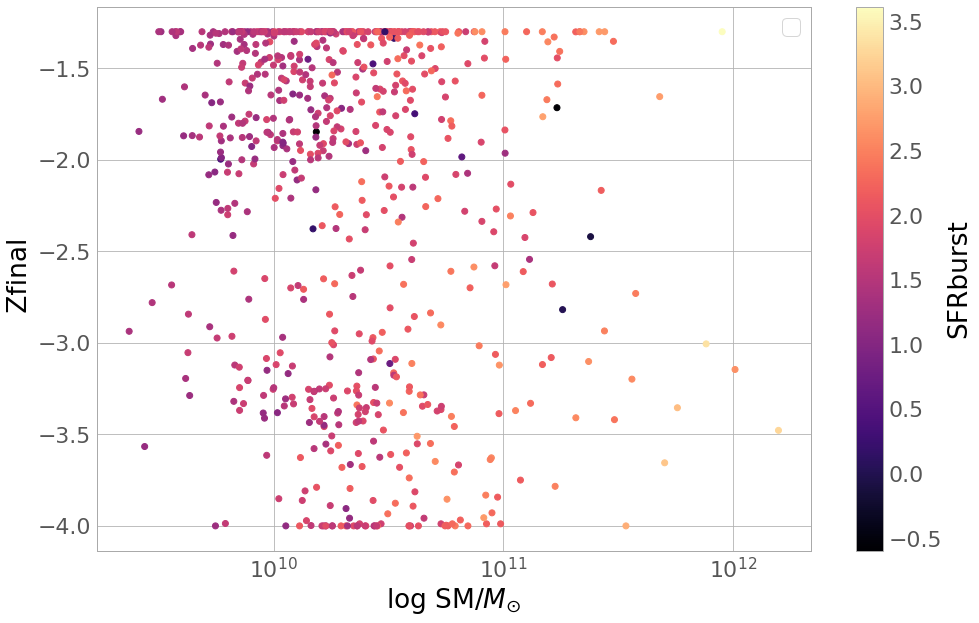

In [118]:
import matplotlib.cm as cm
colour=SAMPLE_em['SFRburst']
for i in range(len(colour)):
    if colour[i] < 1*10**-4:
        colour[i] =nan
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))

sc = plt.scatter(SAM_SM,SAMPLE_em['Zfinal'],c=log10(colour),cmap=cm.magma)
plt.colorbar(sc,label='SFRburst')#,aspect=8,fraction=0.04)

plt.ylabel(' Zfinal')#log star formation rate/ M_star/yr
plt.xlabel('log SM/$M_{\odot}$')
plt.legend()
ax.set_xscale('log')


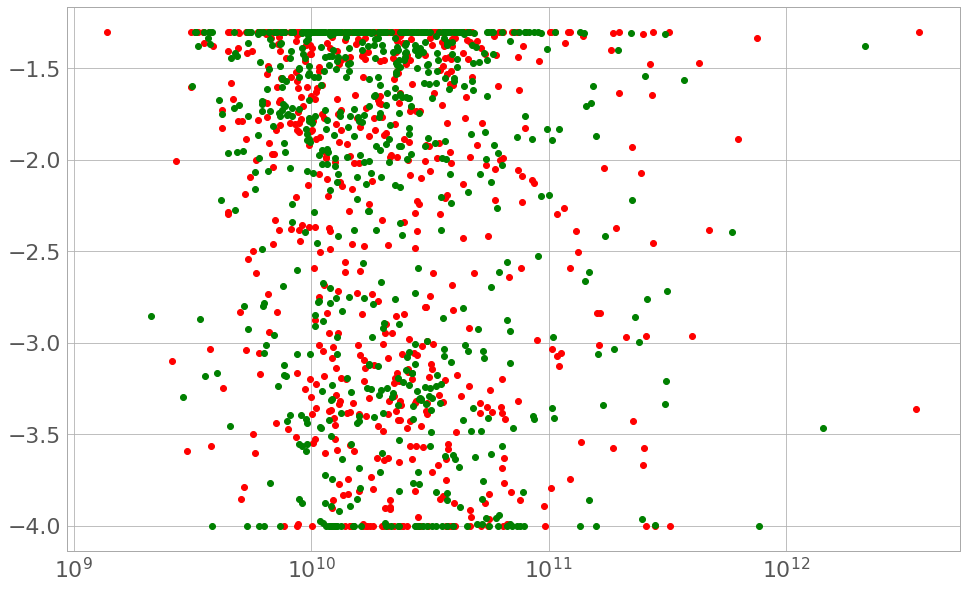

In [52]:
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(Sem['StellarMass'],Sem['Zfinal'],c='red')
plt.scatter(Sem2['StellarMass'],Sem2['Zfinal'],c='green')
ax.set_xscale('log')

/tmp/ipykernel_16351/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_16351/4146921367.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


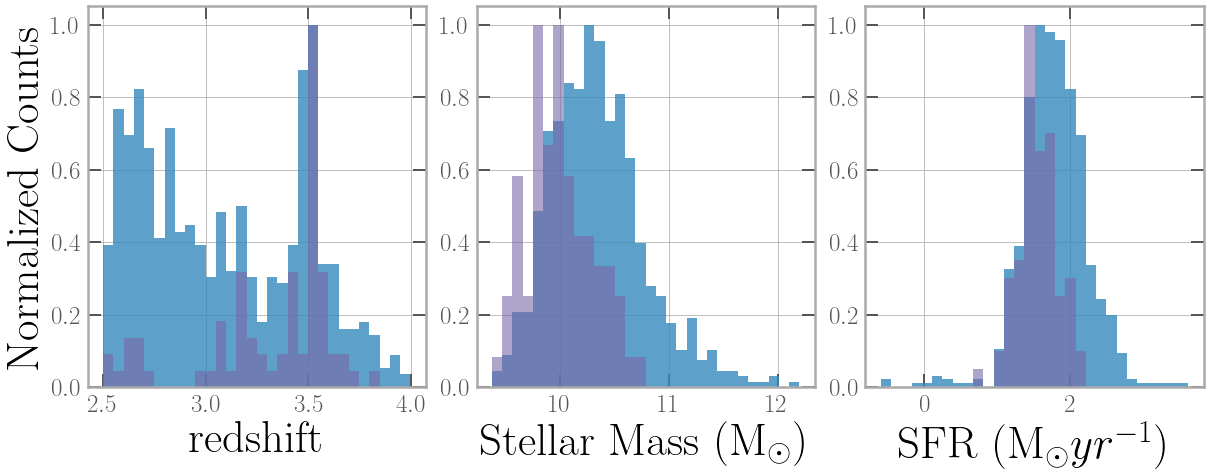

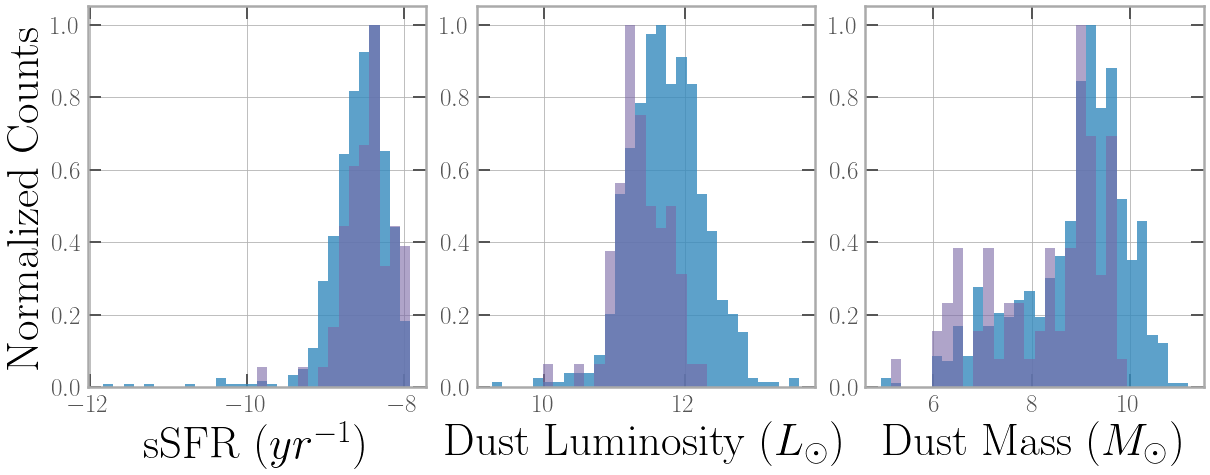

In [124]:
#PROSPECT- with emission lines
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(2.5,max(SAM_z),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(SAM_z, bins=bin_lims)
hist2, _ = np.histogram(Pro_z, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(min(log10(SAM_SM)),max(log10(SAM_SM)),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(log10(SAM_SM), bins=bin_limsSM)
hist2SM, _ = np.histogram(log10(Pro_SM), bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(min(SAM_SFR),max(SAM_SFR),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SAM_SFR, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(Pro_SFR, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(log10(10**SAM_SFR/(SAM_SM))),max(log10(10**SAM_SFR/(SAM_SM))),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(log10(10**SAM_SFR/(SAM_SM)), bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(log10(10**Pro_SFR/(Pro_SM)), bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(min(log10(SAM_dlum)),max(log10(SAM_dlum)),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(log10(SAM_dlum), bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(log10(Pro_dlum), bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(min(log10(SAM_dmas)),max(log10(SAM_dmas)),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(log10(SAM_dmas), bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(log10(Pro_dmas), bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

# ##computing the bin properties (same for both distributions) Dust Attenuation
# num_bintauISM = 30
# bin_limstauISM = np.linspace(0,max(tauISMh)/4,num_bintauISM+1)
# bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
# bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

# ##computing the histograms
# hist1tauISM, _ = np.histogram(tauISMh, bins=bin_limstauISM)
# hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

# ##normalizing
# hist1btauISM = hist1tauISM/np.max(hist1tauISM)
# hist2btauISM = hist2tauISM/np.max(hist2tauISM)

# ##computing the bin properties (same for both distributions) chi2
# num_binchi2 = 30
# bin_limschi2 = np.linspace(0,max(chi2h)/4,num_binchi2+1)
# bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
# bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

# ##computing the histograms
# hist1chi2, _ = np.histogram(chi2h, bins=bin_limschi2)
# hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

# ##normalizing
# hist1bchi2 = hist1chi2/np.max(hist1chi2)
# hist2bchi2 = hist2chi2/np.max(hist2chi2)

# ##computing the bin properties (same for both distributions) ISM Temperature
# num_binT_CISM = 30
# bin_limsT_CISM = np.linspace(0,max(T_CISMh),num_binT_CISM+1)
# bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
# bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

# ##computing the histograms
# hist1T_CISM, _ = np.histogram(T_CISMh, bins=bin_limsT_CISM)
# hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

# ##normalizing
# hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
# hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
# plt.savefig('NormPotato1',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
# # plt.savefig('NormPotato2',bbox_inches='tight')
# # plt.savefig('NormPotato2')
# ###############################################
# fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

# ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
# ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
# ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
# ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
# ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8)
# ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6)
# plt.tight_layout()
# plt.savefig('NormPotato3',bbox_inches='tight')
plt.show()

In [130]:
SAMPLE_noem[SAMPLE_noem['SFRburst']==min(SAMPLE_noem['SFRburst'])]
# min(SAMPLE_noem['SFRburst'])

id        z      mSFR     mpeak   mperiod     mskew  tau_birth  \
518  26508  3.88203  2.927354  1.941533 -0.964436 -0.358311   0.423216   

     tau_screen  alpha_SF_birth  alpha_SF_screen   Zfinal         LP  \
518   -0.454191        3.722335              4.0 -3.99577 -45.034792   

          masstot  dustmass.birth  dustmass.screen  dustmass.total  \
518  2.964842e+11             0.0     1.243785e+09    1.243785e+09   

     dustlum.birth  dustlum.screen  dustlum.total  SFRburst   StellarMass  \
518            0.0    1.051171e+11   1.051171e+11       0.0  5.175978e-72   

      mSFR_LB  mpeak_LB  mperiod_LB  mskew_LB  tau_birth_LB  tau_screen_LB  \
518  2.577643  1.484125        -1.0      -0.5     -1.109644      -1.312201   

     alpha_SF_birth_LB  alpha_SF_screen_LB  Zfinal_LB      LP_LB  \
518           0.952829                 0.0       -4.0 -49.182995   

       masstot_LB  dustmass.birth_LB  dustmass.screen_LB  dustmass.total_LB  \
518  1.979089e+11                0.0       112922.692649      112922.692649   

     dustlum.birth_LB  dustlum.screen_LB  dustlum.total_LB  SFRburst_LB  \
518               0.0       1.237974e+10      1.237974e+10          0.0   

     StellarMass_LB   mSFR_UB  mpeak_UB  mperiod_UB  mskew_UB  tau_birth_UB  \
518    3.455064e-72  2.927354  2.522611   -0.856107 -0.335961           1.5   

     tau_screen_UB  alpha_SF_birth_UB  alpha_SF_screen_UB  Zfinal_UB  \
518      -0.410899                4.0                 4.0   -2.91926   

         LP_UB    masstot_UB  dustmass.birth_UB  dustmass.screen_UB  \
518 -45.034792  3.419858e+11                0.0        1.485102e+09   

     dustmass.total_UB  dustlum.birth_UB  dustlum.screen_UB  dustlum.total_UB  \
518       1.485102e+09               0.0       1.290680e+11      1.290680e+11   

     SFRburst_UB  StellarMass_UB  
518          0.0    5.970338e-72

In [125]:
SAM_zn = SAMPLE_noem['z']
Pro_zn = ProEELG_noem['z']
SAM_SMn = SAMPLE_noem['StellarMass']
Pro_SMn = ProEELG_noem['StellarMass']
SAM_SFRn = log10(SAMPLE_noem['SFRburst'])
Pro_SFRn = log10(ProEELG_noem['SFRburst'])
SAM_dlumn = SAMPLE_noem['dustlum.total']
Pro_dlumn = ProEELG_noem['dustlum.total']
SAM_dmasn = SAMPLE_noem['dustmass.total']
Pro_dmasn = ProEELG_noem['dustmass.total']

/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/tmp/ipykernel_16351/3226181544.py:41: RuntimeWarning: invalid value encountered in true_divide
  hist1bSFR = hist1SFR/np.max(hist1SFR)
/tmp/ipykernel_16351/3226181544.py:42: RuntimeWarning: invalid value encountered in true_divide
  hist2bSFR = hist2SFR/np.max(hist2SFR)
/tmp/ipykernel_16351/3226181544.py:55: RuntimeWarning: invalid value encountered in true_divide
  hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
/tmp/ipykernel_16351/3226181544.py:56: RuntimeWarning: invalid value encountered in true_divide
  hist2bsSFR = hist2sSFR/np.max(hist2sSFR)
/tmp/ipykernel_16351/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipy

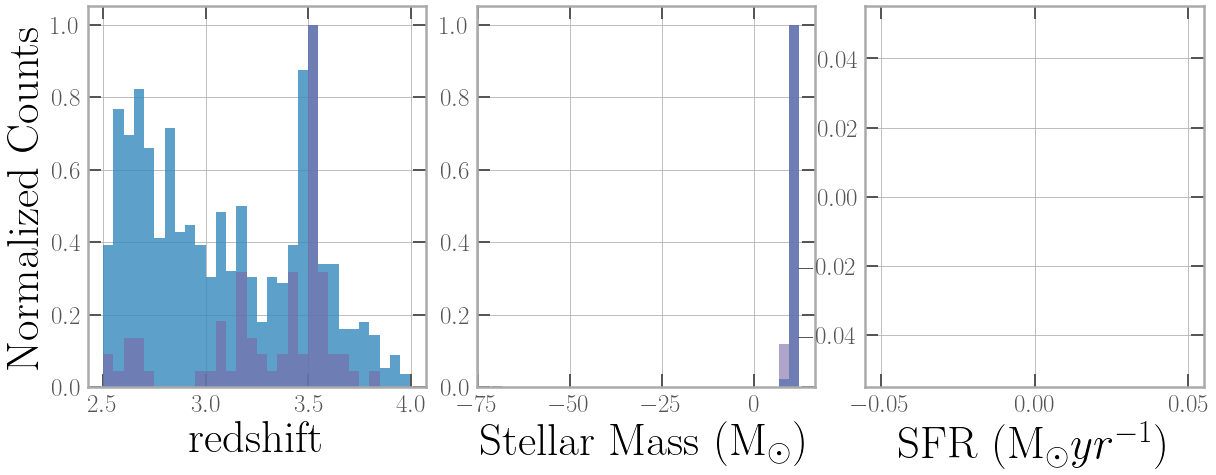

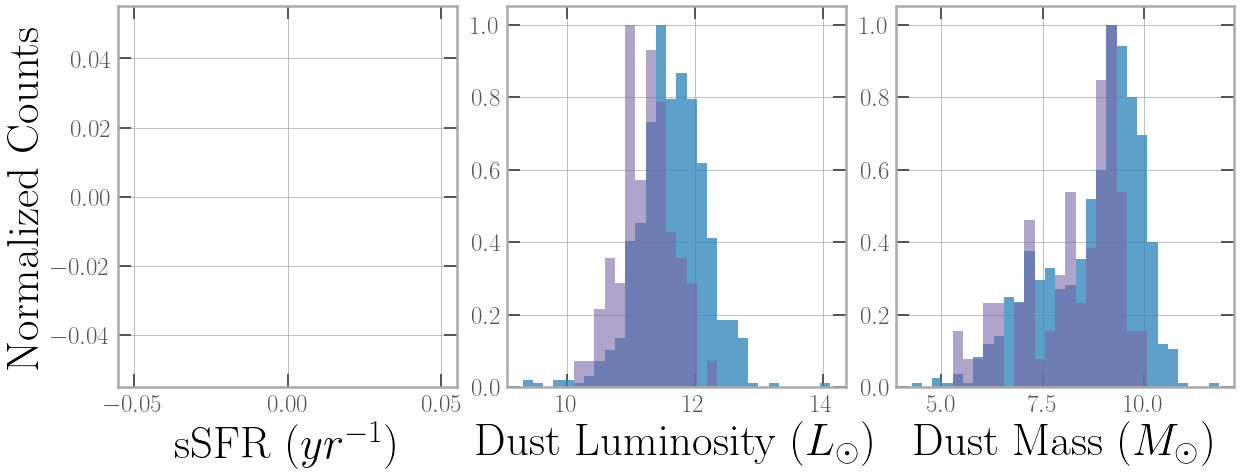

In [126]:
#PROSPECT- withOUT emission lines
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(2.5,max(SAM_zn),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(SAM_zn, bins=bin_lims)
hist2, _ = np.histogram(Pro_zn, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(min(log10(SAM_SMn)),max(log10(SAM_SMn)),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(log10(SAM_SMn), bins=bin_limsSM)
hist2SM, _ = np.histogram(log10(Pro_SMn), bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(min(SAM_SFRn),max(SAM_SFRn),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SAM_SFRn, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(Pro_SFRn, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(log10(10**SAM_SFRn/(SAM_SMn))),max(log10(10**SAM_SFRn/(SAM_SMn))),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(log10(10**SAM_SFRn/(SAM_SMn)), bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(log10(10**Pro_SFRn/(Pro_SMn)), bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(min(log10(SAM_dlumn)),max(log10(SAM_dlumn)),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(log10(SAM_dlumn), bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(log10(Pro_dlumn), bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(min(log10(SAM_dmasn)),max(log10(SAM_dmasn)),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(log10(SAM_dmasn), bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(log10(Pro_dmasn), bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

# ##computing the bin properties (same for both distributions) Dust Attenuation
# num_bintauISM = 30
# bin_limstauISM = np.linspace(0,max(tauISMh)/4,num_bintauISM+1)
# bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
# bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

# ##computing the histograms
# hist1tauISM, _ = np.histogram(tauISMh, bins=bin_limstauISM)
# hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

# ##normalizing
# hist1btauISM = hist1tauISM/np.max(hist1tauISM)
# hist2btauISM = hist2tauISM/np.max(hist2tauISM)

# ##computing the bin properties (same for both distributions) chi2
# num_binchi2 = 30
# bin_limschi2 = np.linspace(0,max(chi2h)/4,num_binchi2+1)
# bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
# bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

# ##computing the histograms
# hist1chi2, _ = np.histogram(chi2h, bins=bin_limschi2)
# hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

# ##normalizing
# hist1bchi2 = hist1chi2/np.max(hist1chi2)
# hist2bchi2 = hist2chi2/np.max(hist2chi2)

# ##computing the bin properties (same for both distributions) ISM Temperature
# num_binT_CISM = 30
# bin_limsT_CISM = np.linspace(0,max(T_CISMh),num_binT_CISM+1)
# bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
# bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

# ##computing the histograms
# hist1T_CISM, _ = np.histogram(T_CISMh, bins=bin_limsT_CISM)
# hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

# ##normalizing
# hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
# hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
# plt.savefig('NormPotato1',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
# # plt.savefig('NormPotato2',bbox_inches='tight')
# # plt.savefig('NormPotato2')
# ###############################################
# fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

# ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
# ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
# ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
# ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
# ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8)
# ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6)
# plt.tight_layout()
# plt.savefig('NormPotato3',bbox_inches='tight')
plt.show()

In [117]:
#highz EELG vs full sample histograms
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifth),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifth, bins=bin_lims)
hist2, _ = np.histogram(redshift, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMh),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMh, bins=bin_limsSM)
hist2SM, _ = np.histogram(SM, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRh),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRh, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFR, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRh),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRh, bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFR, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusth),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusth, bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldust, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusth),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusth, bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdust, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMh)/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMh, bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2h)/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2h, bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMh),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMh, bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
# plt.savefig('NormPotato1',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
# plt.savefig('NormPotato2',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8)
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6)
plt.tight_layout()
# plt.savefig('NormPotato3',bbox_inches='tight')
plt.show()

NameError: name 'redshifth' is not defined

In [22]:
# # x,bins,p=plt.hist([redshifth,redshift], bins=20, density=True, histtype='bar')#, stacked=True)
# x, bins, p=plt.hist([redshifth,redshift], density=True)
# # plt.bar(x, y2 ,bottom=y1,label='y2')
# # for item in p:
# #     item.set_height(item.get_height()/sum(x))
# plt.title('redshifts')
# plt.show()
# # plt.hist([SMh,SM], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([SMh,SM], density=True)
# plt.title('M(stars)')
# plt.show()
# # plt.hist([SFRh,SFR], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([SFRh,SFR], density=True)
# plt.title('SFR')
# plt.show()
# # plt.hist([Ldusth,Ldust], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([Ldusth,Ldust], density=True)
# plt.title('Ldust')
# plt.show()
# plt.hist([sSFRh,sSFR], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([sSFRh,sSFR], density=True)
# plt.title('sSFR')
# plt.show()
# # plt.hist([Mdusth,Mdust], bins=20, density=True, histtype='bar', stacked=True)
# x, bins, p=plt.hist([Mdusth,Mdust], density=True)
# plt.title('Mdust')
# plt.show()

In [32]:
#import full Strong emission line contaminated filters removed set(SEL) 
path = os.path.expanduser('~/notebook/Chestnuts/')
SEL=pd.read_csv(os.path.expanduser(path+'StrongEL.csv'),index_col=0)
SEL

Galaxy_ID  redshift  SFH $f_{mu}$  IR $f_{mu}$  $\mu$  $\tau_V$  \
0             1   0.61654         0.897        0.984  0.429    11.636   
1             2   0.43408         0.868        0.984  0.440     7.292   
2             3   0.95420         0.343        0.385  0.325     2.976   
3             4   3.81199         0.111        0.015  0.583     0.104   
4             5   4.86526         0.111        0.015  0.583     0.104   
...         ...       ...           ...          ...    ...       ...   
4090      30906   0.68055         0.161        0.290  0.195     6.197   
4091      30907   2.44406         0.090        0.015  0.279     0.120   
4092      30908   1.07964         0.332        0.306  0.304    11.246   
4093      30910   2.33941         0.124        0.015  0.228     1.524   
4094      30911   2.28540         0.171        0.015  0.502     0.095   

      sSFR$_{0.1Gyr}$      M(stars)         Ldust  $T_C^{ISM}$  ...  \
0        1.853000e-11  3.852000e+12  4.509000e+12         62.5  ...   
1        1.423000e-11  5.401000e+10  3.867000e+10         62.5  ...   
2        9.958000e-11  1.731000e+11  4.124000e+11         60.2  ...   
3        1.008000e-08  9.552000e+09  4.837000e+11         63.3  ...   
4        1.008000e-08  1.371000e+10  6.942000e+11         63.3  ...   
...               ...           ...           ...          ...  ...   
4090     1.103000e-08  2.468000e+08  8.240000e+10         32.8  ...   
4091     3.269000e-09  1.496000e+10  1.414000e+11         63.3  ...   
4092     3.960000e-10  3.446000e+11  3.444000e+12         69.9  ...   
4093     6.002000e-09  2.846000e+09  3.561000e+11         63.3  ...   
4094     3.847000e-09  7.446000e+09  7.250000e+10         63.3  ...   

      $\chi_{W}^{tot}$  $\tau_{V}^{ISM}$      M(dust)  $SFR_{0.1Gyr}$  $A_V$  \
0                0.014             4.997  432300000.0         71.3700  5.404   
1                0.014             3.211    3707000.0          0.7684  3.491   
2                0.285             0.967  117400000.0         17.2300  1.261   
3                0.637             0.061    4328000.0         96.2800  0.093   
4                0.637             0.061    6212000.0        138.2000  0.093   
...                ...               ...          ...             ...    ...   
4090             0.640             1.209   30690000.0          2.7220  2.605   
4091             0.637             0.034    1265000.0         48.9200  0.060   
4092             0.568             3.424  188200000.0        136.4000  4.140   
4093             0.637             0.347    3186000.0         17.0800  0.976   
4094             0.637             0.048     648700.0         28.6500  0.064   

      $age_M$   Tdust  lg(M/Lh)  lg(M/Lk)     chi2  
0       9.584  36.260     1.195     1.228  259.813  
1       9.857  36.260     0.987     1.074  299.269  
2       9.659  42.334     0.382     0.550   88.400  
3       7.791  62.863    -0.986    -0.791  372.905  
4       7.791  62.863    -0.986    -0.791  273.105  
...       ...     ...       ...       ...      ...  
4090    7.338  32.272    -0.730    -0.610   61.709  
4091    8.410  62.863    -0.551    -0.358   12.119  
4092    9.602  56.697     0.848     0.947   55.924  
4093    8.861  62.863    -0.792    -0.630    2.662  
4094    8.342  62.863    -0.487    -0.260    2.141  

[24091 rows x 24 columns]

In [33]:
#Separating the EELGs from the total SEL using galaxy ids
path = os.path.expanduser('~/notebook/Chestnuts/')
EELG_IDs=pd.read_csv(os.path.expanduser(path+'Parameters76Highz.csv'))
EELGSEL = pd.merge(left=EELG_IDs['Galaxy_ID'],right=SEL, left_on='Galaxy_ID', right_on='Galaxy_ID')
# EELGSEL
EELGSEL.to_csv('EELG_SEL.csv')
EELG_SEL=Table.read(os.path.expanduser(path+'EELG_SEL.csv'))
EELG_SEL.remove_column('col0')

# EELG_SEL.round({'redshift':3})
EELG_SEL

<Table length=76>
Galaxy_ID redshift SFH $f_{mu}$ IR $f_{mu}$ ... lg(M/Lh) lg(M/Lk)   chi2 
  int64   float64    float64      float64   ... float64  float64  float64
--------- -------- ------------ ----------- ... -------- -------- -------
    20366  3.53172        0.111       0.015 ...   -0.986   -0.791   3.265
    11462  3.81006        0.111       0.015 ...   -0.986   -0.791  15.552
    12533  3.54599        0.136       0.015 ...   -0.525   -0.322  22.478
    12552  3.19594        0.083       0.015 ...   -0.225    0.009   3.045
    12903  3.09734        0.111       0.015 ...   -0.986   -0.791    4.56
    14808  3.67329        0.111       0.015 ...   -0.986   -0.791   7.545
      ...      ...          ...         ... ...      ...      ...     ...
    16834  3.49973        0.136       0.015 ...   -0.525   -0.322   2.403
    22839  3.49055        0.066       0.015 ...   -0.394   -0.182   4.178
    23511   2.5311        0.118       0.015 ...   -0.732   -0.524  13.336
    24259  3.50945        0.213       0.385 ...   -0.531   -0.328   8.822
    26616  3.52112        0.066       0.015 ...   -0.394   -0.182   7.787
    27445  2.61569        0.333       0.385 ...   -0.233   -0.009  16.597
    28374  3.47362        0.077       0.015 ...   -0.973   -0.816  10.418

In [34]:
#Definitions for EELG SEL data
SFR_ES = log10(EELG_SEL[r'$SFR_{0.1Gyr}$'])
SM_ES = log10(EELG_SEL['M(stars)'])
# SFRa = log10(mag2[r'$SFR_{0.1Gyr}$'])
# Parameters=[,r'$\tau_{V}^{ISM}$','M(dust)',r'$SFR_{0.1Gyr}$']
# SFH=magphys[r'SFH $f_{mu}$']
SFH_ES=EELG_SEL[r'SFH $f_{mu}$']
# IR=magphys[r'IR $f_{mu}$']
IR_ES=EELG_SEL[r'IR $f_{mu}$']
# mu=magphys[r'$\mu$']
mu_ES=EELG_SEL[r'$\mu$']
# tauv=magphys[r'$\tau_V$'] 
tauv_ES=EELG_SEL[r'$\tau_V$']
# sSFR=log10(magphys[r'sSFR$_{0.1Gyr}$'])
sSFR_ES=log10(EELG_SEL[r'sSFR$_{0.1Gyr}$'])
# Ldust=log10(magphys['Ldust'])
Ldust_ES=log10(EELG_SEL['Ldust'])
# T_CISM=magphys[r'$T_C^{ISM}$']
T_CISM_ES=EELG_SEL[r'$T_C^{ISM}$']
# T_WBC=magphys[r'$T_W^{BC}$']
T_WBC_ES=EELG_SEL[r'$T_W^{BC}$']
# chiC=magphys[r'$\chi_C^{tot}$']
chiC_ES=EELG_SEL[r'$\chi_C^{tot}$']
# chiPAH=magphys[r'$\chi_{PAH}^{tot}$']
chiPAH_ES=EELG_SEL[r'$\chi_{PAH}^{tot}$']
# chiMIR=magphys[r'$\chi_{MIR}^{tot}$']
chiMIR_ES=EELG_SEL[r'$\chi_{MIR}^{tot}$']
# chiW=magphys[r'$\chi_{W}^{tot}$']
chiW_ES=EELG_SEL[r'$\chi_{W}^{tot}$']
# tauISM=magphys[r'$\tau_{V}^{ISM}$']
tauISM_ES=EELG_SEL[r'$\tau_{V}^{ISM}$']
# Mdust=log10(magphys['M(dust)'])
Mdust_ES=log10(EELG_SEL['M(dust)'])
# redshift=magphys['redshift']
redshift_ES=EELG_SEL['redshift']

chi2_ES=EELG_SEL['chi2']

/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/2444240089.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/2444240089.py:168: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


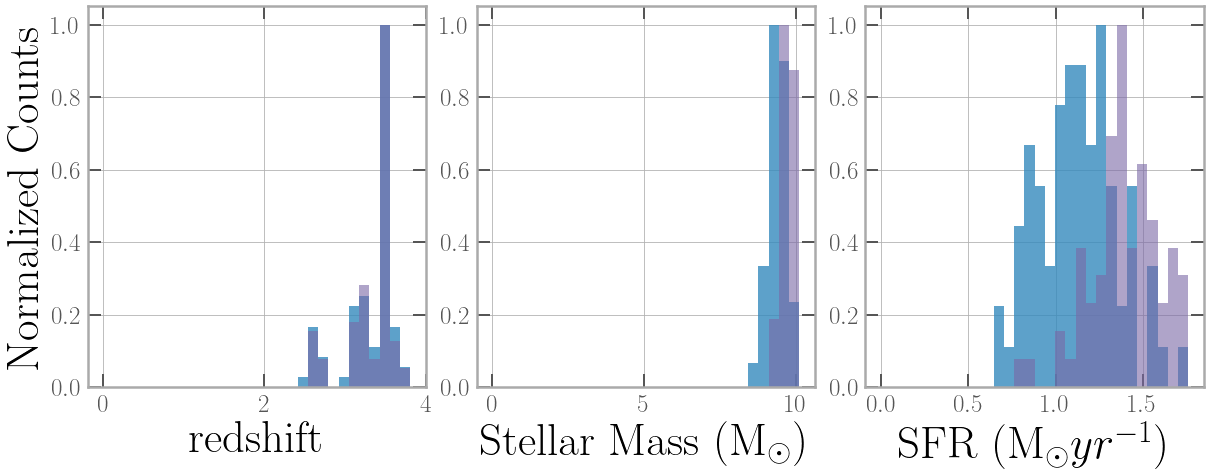

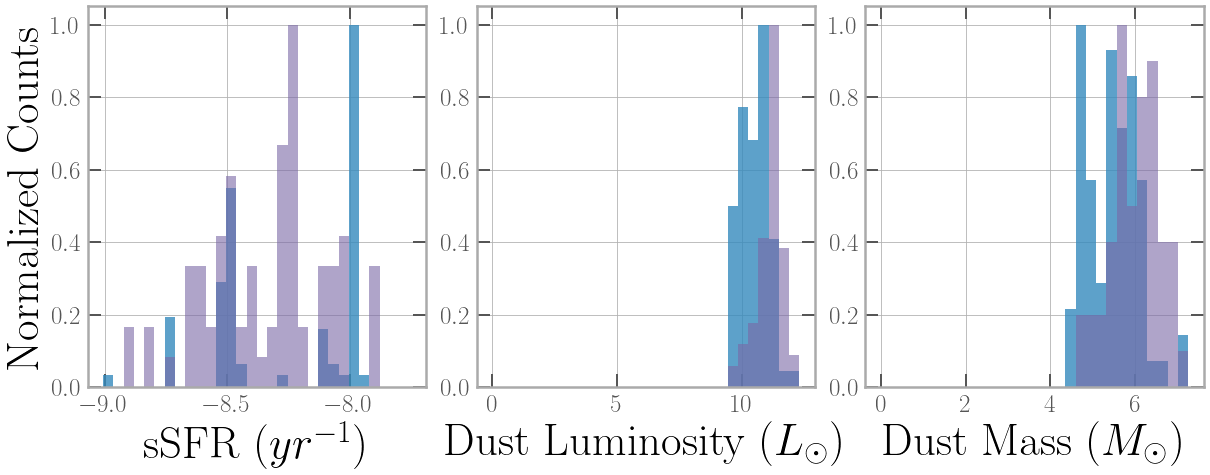

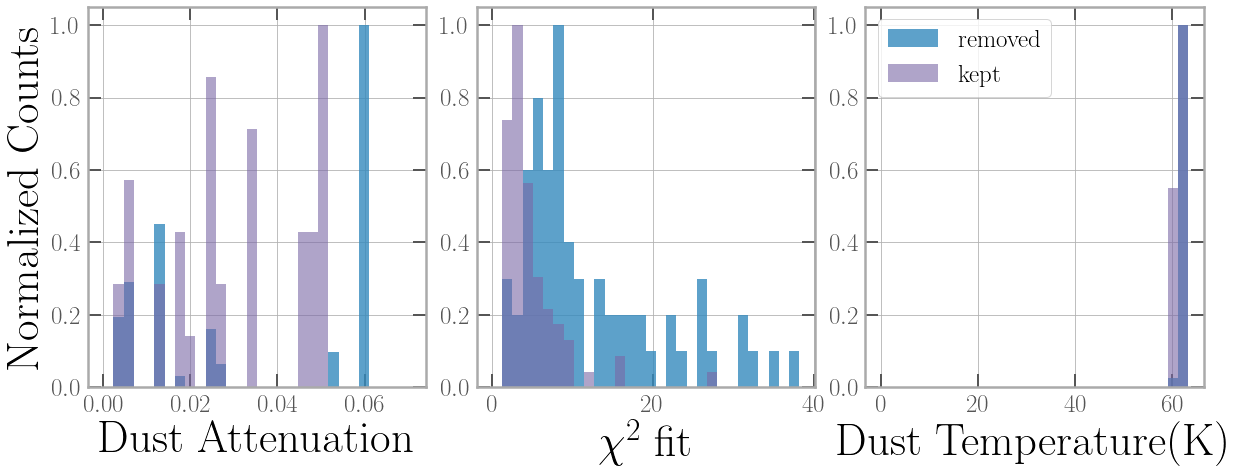

In [54]:
#histograms comparing EELGs for both SEL and non SEL sets
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshift_ES),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshift_ES, bins=bin_lims)
hist2, _ = np.histogram(redshift, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SM_ES),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SM_ES, bins=bin_limsSM)
hist2SM, _ = np.histogram(SM, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFR_ES),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFR_ES, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFR, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFR_ES),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFR_ES, bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFR, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldust_ES),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldust_ES, bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldust, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdust_ES),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdust_ES, bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdust, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISM_ES)/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISM_ES, bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2_ES)/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2_ES, bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISM_ES),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISM_ES, bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1_EELGSEL',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2_EELGSEL',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8, label='removed')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='kept')
plt.tight_layout()
plt.legend()
plt.savefig('NormPotato3_EELGSEL',bbox_inches='tight')
plt.show()

In [36]:
#tests that show rounding issue between highz and EELG_SEL redshifts
# test = Table(EELG_SEL['redshift'])#, magphys['redshift'].any())
# test
# test2 = Table(magphys['redshift'])
# test2

In [38]:
#SEL full dataset definitions
SFRs = log10(SEL[r'$SFR_{0.1Gyr}$'])
SMs = log10(SEL['M(stars)'])

SFHs=SEL[r'SFH $f_{mu}$']
IRs=SEL[r'IR $f_{mu}$']
mus=SEL[r'$\mu$']
tauvs=SEL[r'$\tau_V$']
sSFRs=log10(SEL[r'sSFR$_{0.1Gyr}$'])
Ldusts=log10(SEL['Ldust'])
T_CISMs=SEL[r'$T_C^{ISM}$']
T_WBCs=SEL[r'$T_W^{BC}$']
chiCs=SEL[r'$\chi_C^{tot}$']
chiPAHs=SEL[r'$\chi_{PAH}^{tot}$']
chiMIRs=SEL[r'$\chi_{MIR}^{tot}$']
chiWs=SEL[r'$\chi_{W}^{tot}$']
tauISMs=SEL[r'$\tau_{V}^{ISM}$']
Mdusts=log10(SEL['M(dust)'])
redshifts=SEL['redshift']

chi2s=SEL['chi2']

/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/640330499.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/640330499.py:169: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


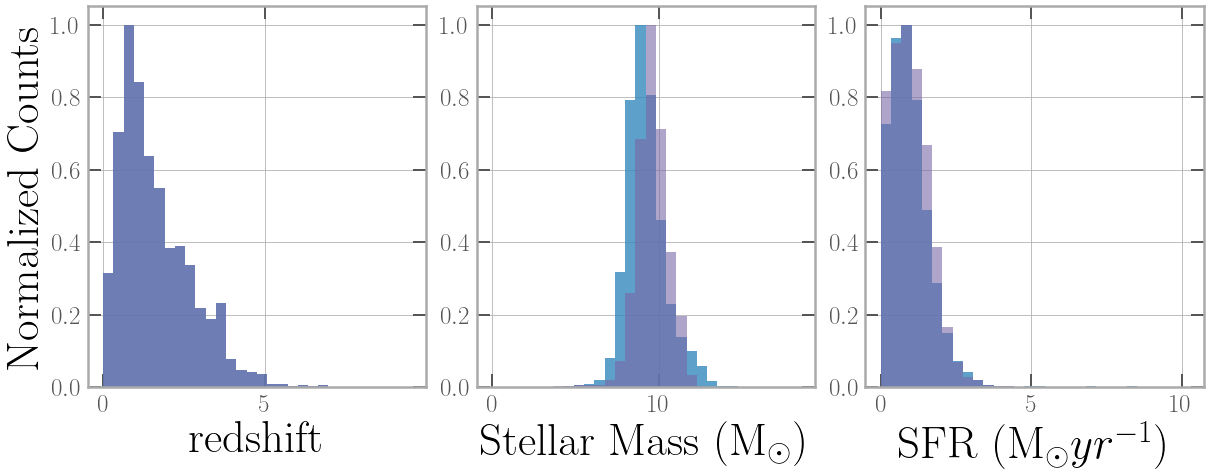

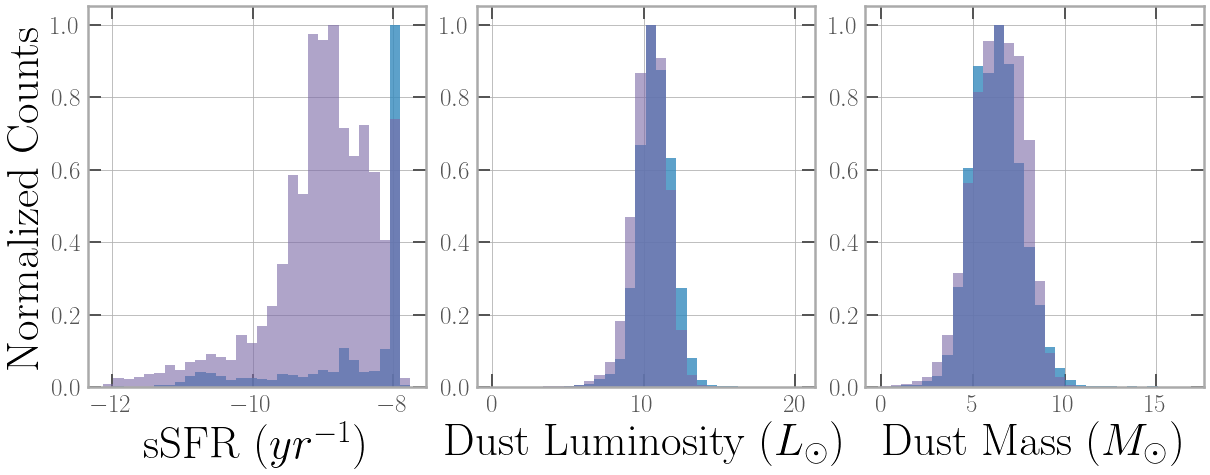

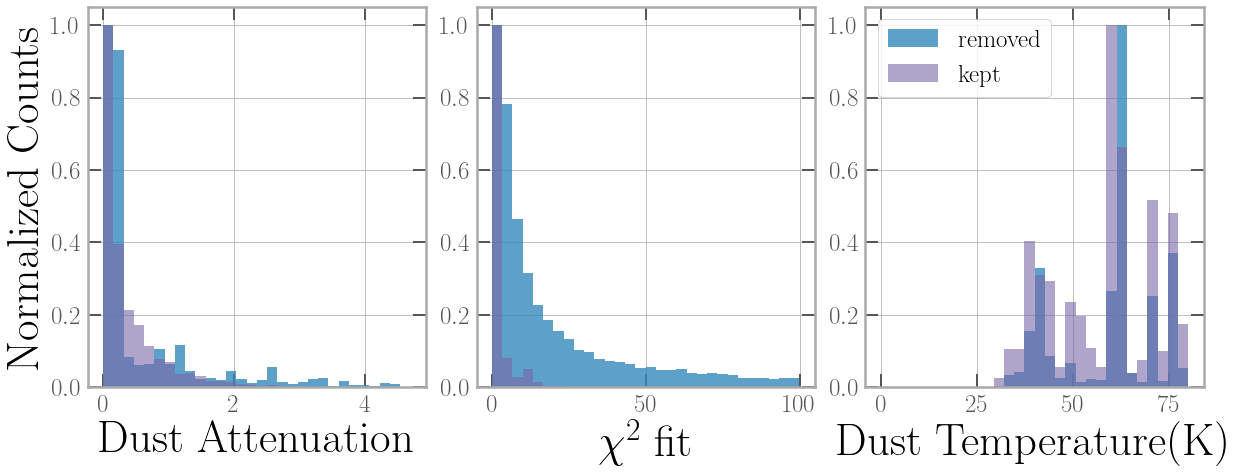

In [55]:
#histograms for SEL and non-SEL full datasets
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifts),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifts, bins=bin_lims)
hist2, _ = np.histogram(redshifth, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMs),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMs, bins=bin_limsSM)
hist2SM, _ = np.histogram(SMh, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRs),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRs, bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFRh, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRs),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRs, bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFRh, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusts),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusts, bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldusth, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusts),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusts, bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdusth, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMs)/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMs, bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISMh, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2s)/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2s, bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2h, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMs),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMs, bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISMh, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1-SEL',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2-SEL',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8,label='removed')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='kept')
plt.legend()
plt.tight_layout()
plt.savefig('NormPotato3-SEL',bbox_inches='tight')
plt.show()
#Blue = SEL

/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/1457408666.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/1457408666.py:171: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


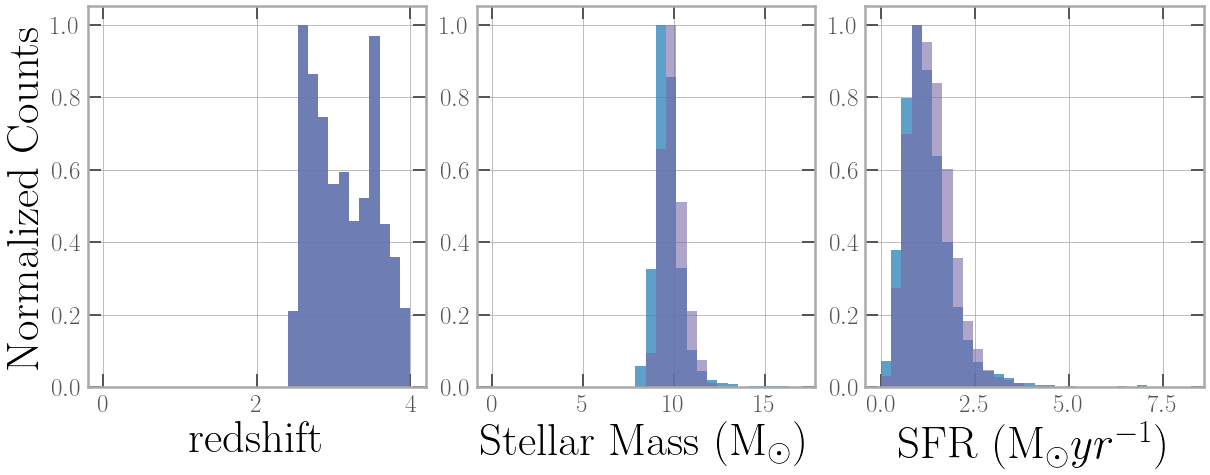

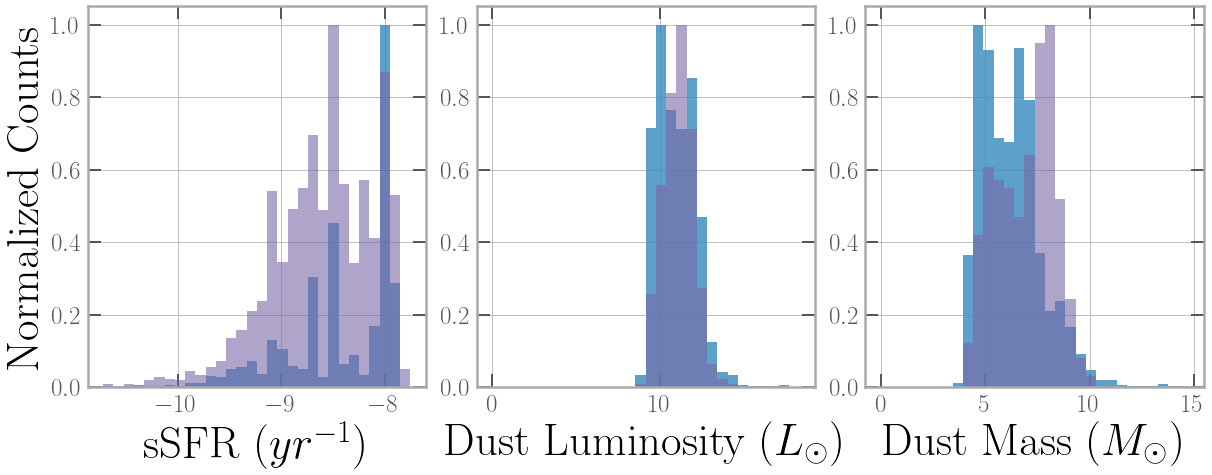

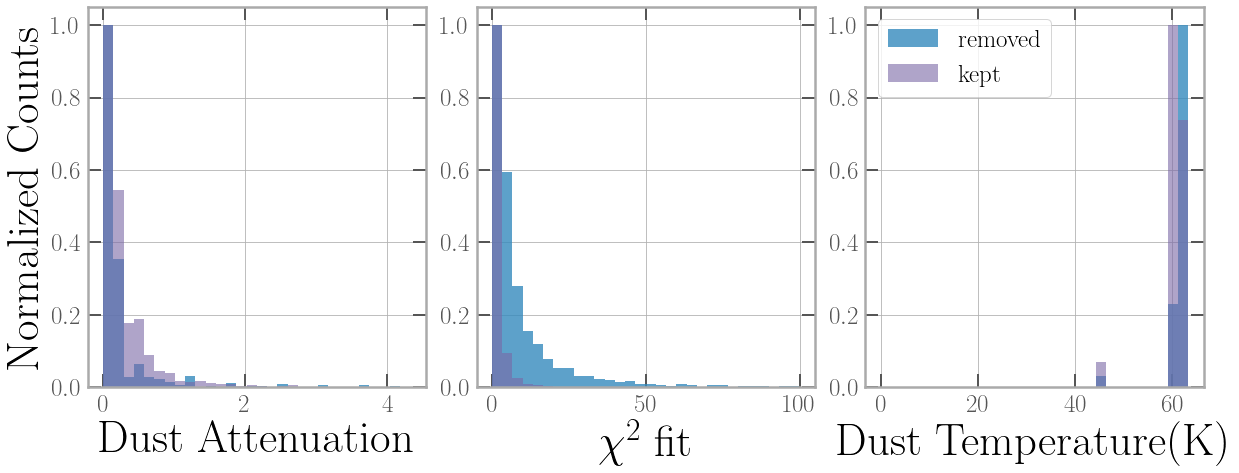

In [56]:
#Histograms for SEL and Non-SEL full datasets between redshifts 2.5 and 4
apples=(2.5<redshifts) & (redshifts<4)
oranges = (2.5<redshifth) & (redshifth<4)
##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifts[apples]),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifts[apples], bins=bin_lims)
hist2, _ = np.histogram(redshifth[oranges], bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMs[apples]),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMs[apples], bins=bin_limsSM)
hist2SM, _ = np.histogram(SMh[oranges], bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRs[apples]),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRs[apples], bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFRh[oranges], bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRs[apples]),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRs[apples], bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFRh[oranges], bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusts[apples]),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusts[apples], bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldusth[oranges], bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusts[apples]),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusts[apples], bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdusth[oranges], bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMs[apples])/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMs[apples], bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISMh[oranges], bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2s[apples])/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2s[apples], bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2h[oranges], bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMs[apples]),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMs[apples], bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISMh[oranges], bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1-SEL-cut',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2-SEL-cut',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8,label='removed')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='kept')
plt.legend()
plt.tight_layout()
plt.savefig('NormPotato3-SEL-cut',bbox_inches='tight')
plt.show()
#Blue = SEL
#full sample with redshift 2.5-4 only. 

In [41]:
# rem = mag2['redshift'] != 0
maska = (redshifth>2.5) & (redshifth<3) #& (mag2['redshift'] != 0)
maskb = (redshifth<3.5) & (redshifth >3)
maskc = (redshifth<4) & (redshifth >3.5)

mask1a = (redshift>2.5) & (redshift<3) #& (mag2['redshift'] != 0)
mask1b = (redshift<3.5) & (redshift >3)
mask1c = (redshift<4) & (redshift >3.5)

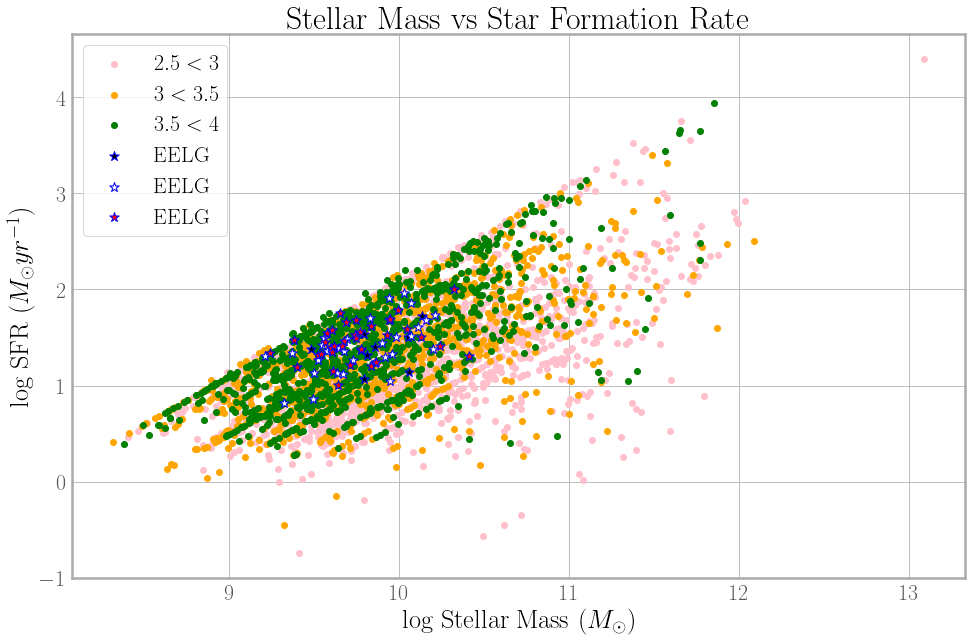

In [59]:
#SM vs SFR with redshifts between 2.5 and 4 (no SEL stuff here)
# plt.scatter(SM[mask6],SFR[mask6])
# smol=big[oranges]
maskchi=big['chi2']<10
# maskred=big['redshift']>0.1
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMh[maska*maskchi*oranges],SFRh[maska*maskchi*oranges],c='pink',label=r'$2.5<3$')
plt.scatter(SMh[maskb*maskchi*oranges],SFRh[maskb*maskchi*oranges],c='orange',label=r'$3<3.5$')
plt.scatter(SMh[maskc*maskchi*oranges],SFRh[maskc*maskchi*oranges],c='green',label=r'$3.5<4$')
plt.scatter(SM[mask1a],SFR[mask1a],marker='*',s=100,c='black',edgecolors='blue',label='EELG')
plt.scatter(SM[mask1b],SFR[mask1b],marker='*',s=100,c='white',edgecolors='blue',label='EELG')
plt.scatter(SM[mask1c],SFR[mask1c],marker='*',s=100,c='red',edgecolors='blue',label='EELG')#s=marker size
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.legend()
# plt.plot(SM,SM**0.96-7.2)
# plt.plot(SMa[rem],SMa[rem]**0.96-7.8)



plt.title('Stellar Mass vs Star Formation Rate')
plt.savefig('Mass Relation full-cut',bbox_inches='tight')
#create a mask of EELG galaxies and represent these as * with the colour corresponding to z
#once you have all 30911 galaxies.

In [43]:
# rem = mag2['redshift'] != 0
maska2 = (redshifts>2.5) & (redshifts<3) #& (mag2['redshift'] != 0)
maskb2 = (redshifts<3.5) & (redshifts >3)
maskc2 = (redshifts<4) & (redshifts >3.5)

mask1a2 = (redshift_ES>2.5) & (redshift_ES<3) #& (mag2['redshift'] != 0)
mask1b2 = (redshift_ES<3.5) & (redshift_ES >3)
mask1c2 = (redshift_ES<4) & (redshift_ES >3.5)

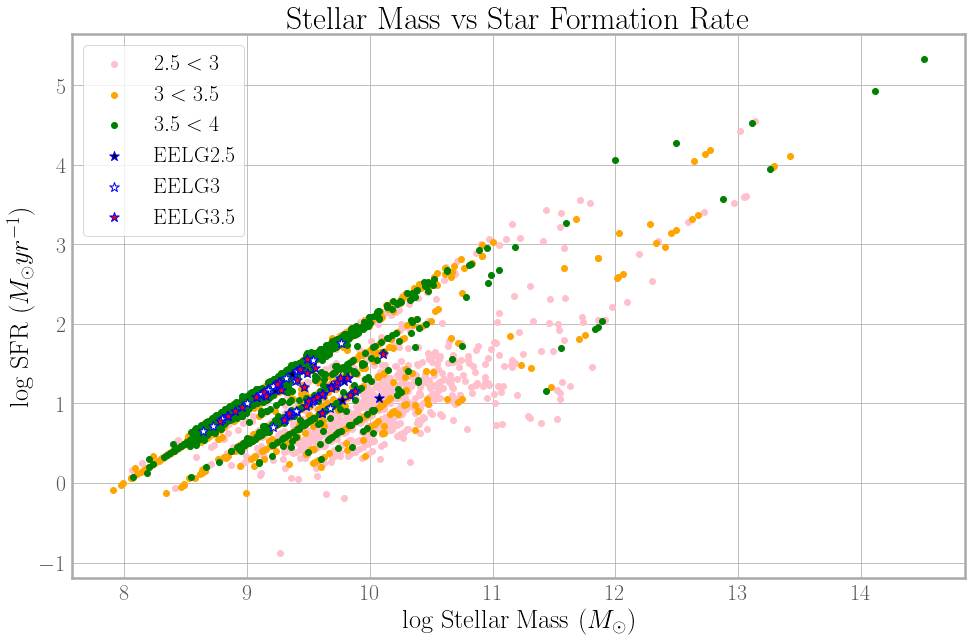

In [60]:
#SM vs SFR for SEL removed and for redshifts between 2.5-4 in the big sample.
# plt.scatter(SM[mask6],SFR[mask6]) 
# smol=big[oranges]
maskchi2=chi2s<10
# maskred=big['redshift']>0.1
plt.figure(figsize=(16,10))
mpl.rcParams.update({'font.size': 22})
plt.scatter(SMs[maska2*maskchi2*apples],SFRs[maska2*maskchi2*apples],c='pink',label=r'$2.5<3$')
plt.scatter(SMs[maskb2*maskchi2*apples],SFRs[maskb2*maskchi2*apples],c='orange',label=r'$3<3.5$')
plt.scatter(SMs[maskc2*maskchi2*apples],SFRs[maskc2*maskchi2*apples],c='green',label=r'$3.5<4$')
plt.scatter(SM_ES[mask1a2],SFR_ES[mask1a2],marker='*',s=100,c='black',edgecolors='blue',label='EELG2.5')
plt.scatter(SM_ES[mask1b2],SFR_ES[mask1b2],marker='*',s=100,c='white',edgecolors='blue',label='EELG3')
plt.scatter(SM_ES[mask1c2],SFR_ES[mask1c2],marker='*',s=100,c='red',edgecolors='blue',label='EELG3.5')#s=marker size
plt.ylabel('log SFR ($M_{\odot}yr^{-1}$)')
plt.xlabel('log Stellar Mass ($M_{\odot}$)')
plt.legend()
# plt.plot(SM,SM**0.96-7.2)
# plt.plot(SMa[rem],SMa[rem]**0.96-7.8)



plt.title('Stellar Mass vs Star Formation Rate')
plt.savefig('Mass Relation full-SEL-cut',bbox_inches='tight')
#create a mask of EELG galaxies and represent these as * with the colour corresponding to z
#once you have all 30911 galaxies.

In [48]:
print(len(SMh))
SMh_massmask=(SMh> min(SM)) & (SMh<max(SM))
print(len(SMh[SMh_massmask]))
print(len(SMh[SMh_massmask*oranges]))

24091
11909
3026


/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/234313586.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/234313586.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


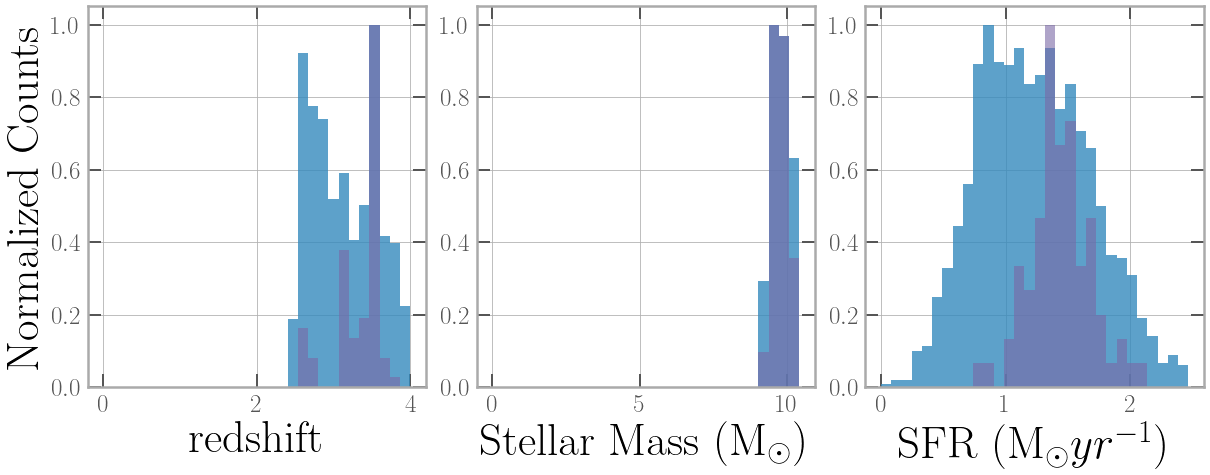

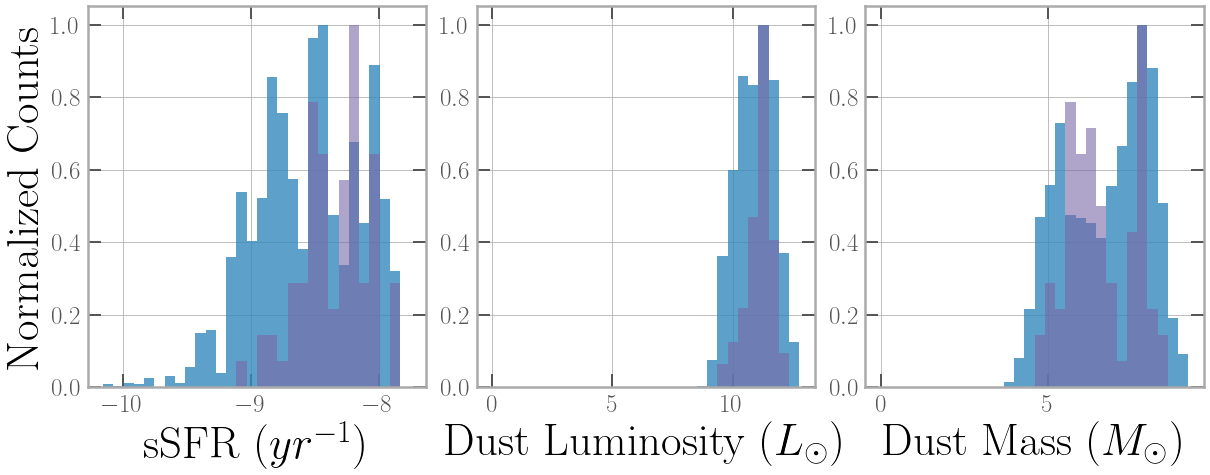

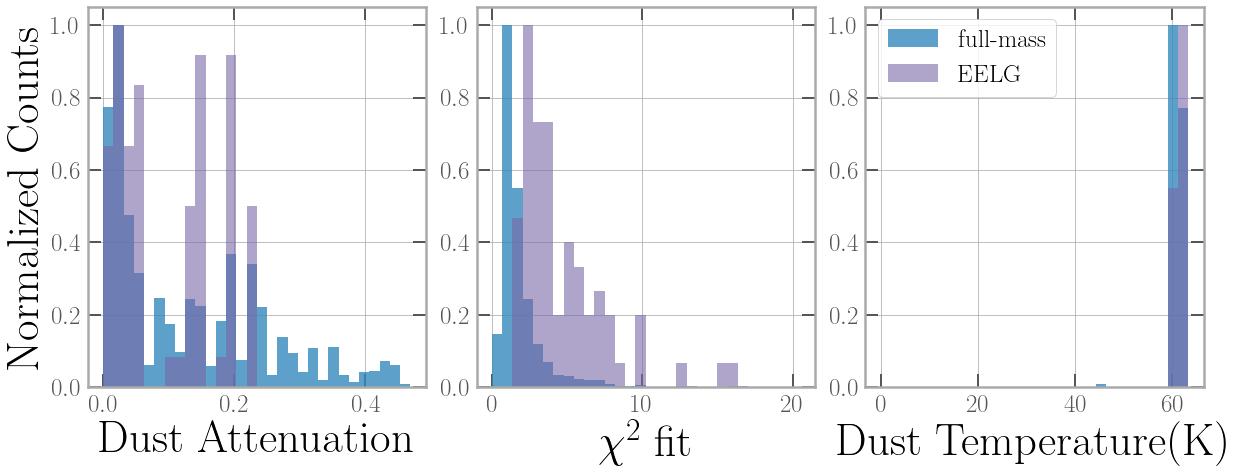

In [62]:
#nonSEL histograms for galaxies between z2.5-4 and mass between min(SM_EELG) and max(SM_EELG)

##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifth[SMh_massmask*oranges]),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifth[SMh_massmask*oranges], bins=bin_lims)
hist2, _ = np.histogram(redshift, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMh[SMh_massmask*oranges]),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMh[SMh_massmask*oranges], bins=bin_limsSM)
hist2SM, _ = np.histogram(SM, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRh[SMh_massmask*oranges]),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRh[SMh_massmask*oranges], bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFR, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRh[SMh_massmask*oranges]),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRh[SMh_massmask*oranges], bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFR, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusth[SMh_massmask*oranges]),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusth[SMh_massmask*oranges], bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldust, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusth[SMh_massmask*oranges]),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusth[SMh_massmask*oranges], bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdust, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMh[SMh_massmask*oranges])/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMh[SMh_massmask*oranges], bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISM, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2h[SMh_massmask*oranges])/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2h[SMh_massmask*oranges], bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMh[SMh_massmask*oranges]),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMh[SMh_massmask*oranges], bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISM, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1-masscut',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2-masscut',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8,label='full-mass')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='EELG')
plt.legend()
plt.tight_layout()
plt.savefig('NormPotato3-masscut',bbox_inches='tight')
plt.show()
#Blue = SEL
#full sample with redshift 2.5-4 only. 

In [45]:
#masks for comparing EELG and normal galaxies with the same mass/redshift range
print(len(SMs))
SM_massmask=(SMs> min(SM_ES)) & (SMs<max(SM_ES))
print(len(SMs[SM_massmask]))
SM_SEL_comp = SMs[SM_massmask*apples]
print(len(SM_SEL_comp))

24091
11706
3227


/tmp/ipykernel_10644/1409362938.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_10644/454164823.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_10644/454164823.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


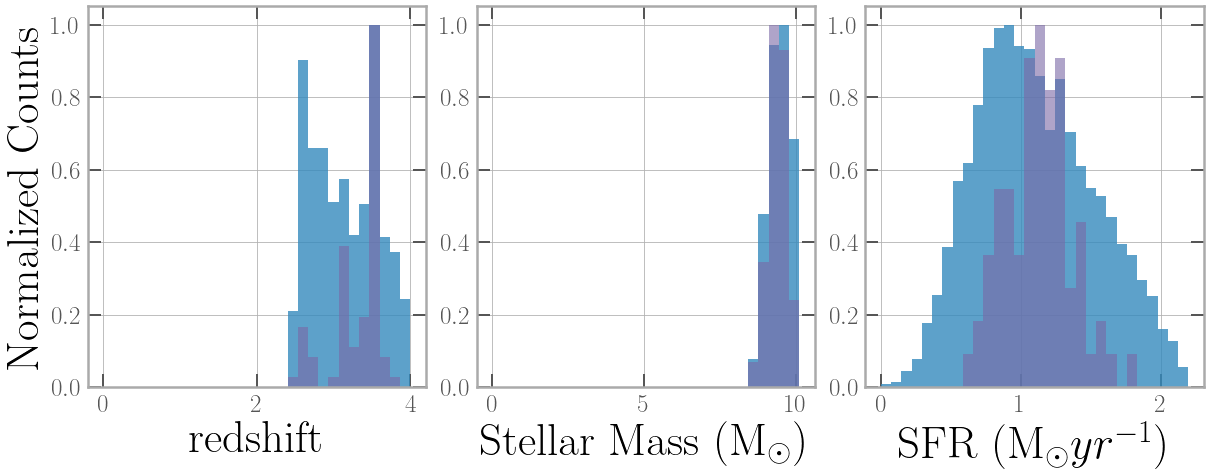

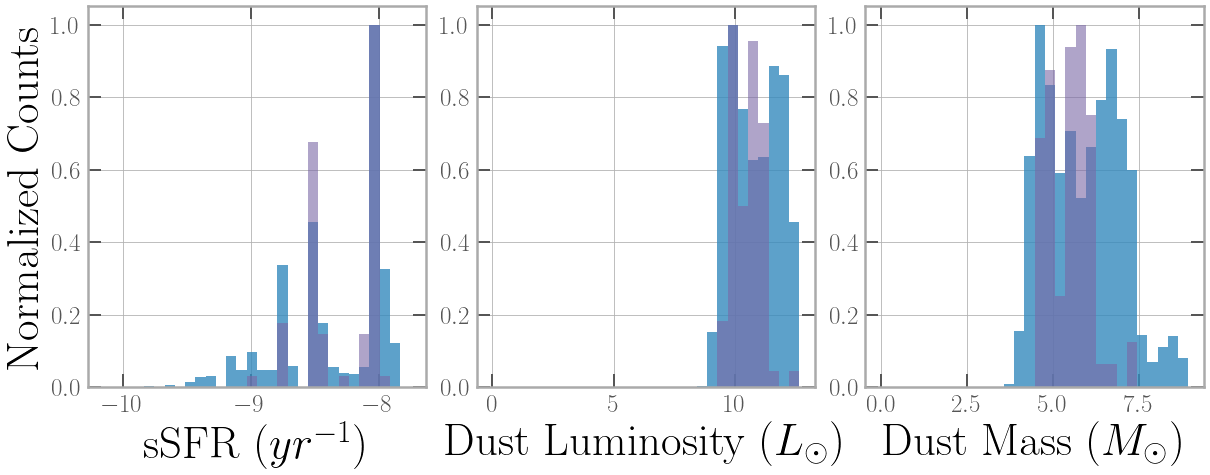

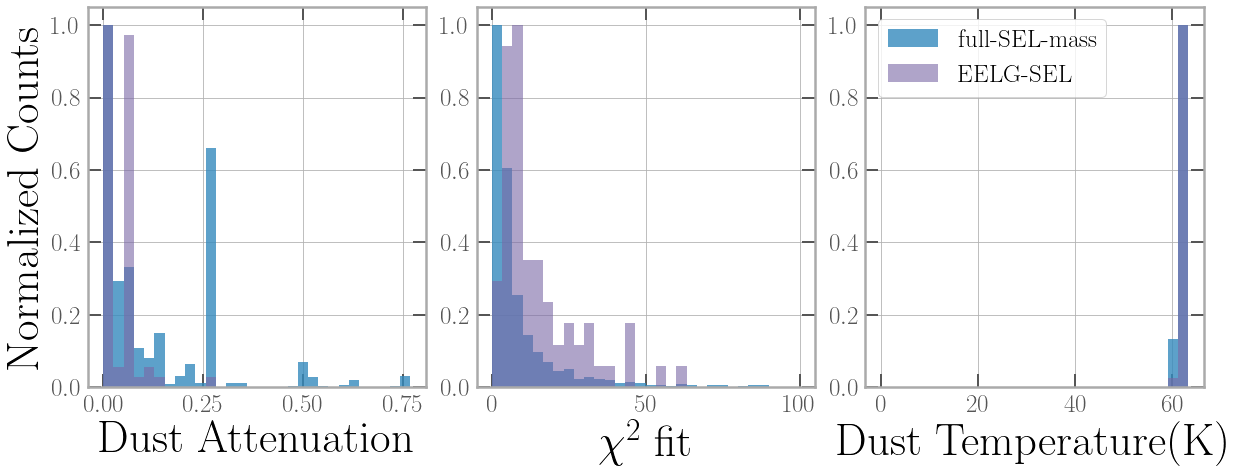

In [63]:
#SEL histograms for galaxies between z2.5-4 and mass between min(SEL_EELG) and max(SEL_EELG)

##computing the bin properties (same for both distributions) Redshift
num_bin = 30
bin_lims = np.linspace(0,max(redshifts[SM_massmask*apples]),num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(redshifts[SM_massmask*apples], bins=bin_lims)
hist2, _ = np.histogram(redshift_ES, bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

##computing the bin properties (same for both distributions) Stellar Mass
num_binSM = 30
bin_limsSM = np.linspace(0,max(SMs[SM_massmask*apples]),num_binSM+1)
bin_centersSM = 0.5*(bin_limsSM[:-1]+bin_limsSM[1:])
bin_widthsSM = bin_limsSM[1:]-bin_limsSM[:-1]

##computing the histograms
hist1SM, _ = np.histogram(SMs[SM_massmask*apples], bins=bin_limsSM)
hist2SM, _ = np.histogram(SM_ES, bins=bin_limsSM)

##normalizing
hist1bSM = hist1SM/np.max(hist1SM)
hist2bSM = hist2SM/np.max(hist2SM)

##computing the bin properties (same for both distributions) Star Formation Rate
num_binSFR = 30
bin_limsSFR = np.linspace(0,max(SFRs[SM_massmask*apples]),num_binSFR+1)
bin_centersSFR = 0.5*(bin_limsSFR[:-1]+bin_limsSFR[1:])
bin_widthsSFR = bin_limsSFR[1:]-bin_limsSFR[:-1]

##computing the histograms
hist1SFR, _ = np.histogram(SFRs[SM_massmask*apples], bins=bin_limsSFR)
hist2SFR, _ = np.histogram(SFR_ES, bins=bin_limsSFR)

##normalizing
hist1bSFR = hist1SFR/np.max(hist1SFR)
hist2bSFR = hist2SFR/np.max(hist2SFR)

##computing the bin properties (same for both distributions) Specific Star Formation Rate
num_binsSFR = 30
bin_limssSFR = np.linspace(min(sSFRs[SM_massmask*apples]),max(sSFRh),num_binsSFR+1)
bin_centerssSFR = 0.5*(bin_limssSFR[:-1]+bin_limssSFR[1:])
bin_widthssSFR = bin_limssSFR[1:]-bin_limssSFR[:-1]

##computing the histograms
hist1sSFR, _ = np.histogram(sSFRs[SM_massmask*apples], bins=bin_limssSFR)
hist2sSFR, _ = np.histogram(sSFR_ES, bins=bin_limssSFR)

##normalizing
hist1bsSFR = hist1sSFR/np.max(hist1sSFR)
hist2bsSFR = hist2sSFR/np.max(hist2sSFR)

##computing the bin properties (same for both distributions) Dust Luminosity
num_binLdust = 30
bin_limsLdust = np.linspace(0,max(Ldusts[SM_massmask*apples]),num_binLdust+1)
bin_centersLdust = 0.5*(bin_limsLdust[:-1]+bin_limsLdust[1:])
bin_widthsLdust = bin_limsLdust[1:]-bin_limsLdust[:-1]

##computing the histograms
hist1Ldust, _ = np.histogram(Ldusts[SM_massmask*apples], bins=bin_limsLdust)
hist2Ldust, _ = np.histogram(Ldust_ES, bins=bin_limsLdust)

##normalizing
hist1bLdust = hist1Ldust/np.max(hist1Ldust)
hist2bLdust = hist2Ldust/np.max(hist2Ldust)

##computing the bin properties (same for both distributions) Dust Mass
num_binMdust = 30
bin_limsMdust = np.linspace(0,max(Mdusts[SM_massmask*apples]),num_binMdust+1)
bin_centersMdust = 0.5*(bin_limsMdust[:-1]+bin_limsMdust[1:])
bin_widthsMdust = bin_limsMdust[1:]-bin_limsMdust[:-1]

##computing the histograms
hist1Mdust, _ = np.histogram(Mdusts[SM_massmask*apples], bins=bin_limsMdust)
hist2Mdust, _ = np.histogram(Mdust_ES, bins=bin_limsMdust)

##normalizing
hist1bMdust = hist1Mdust/np.max(hist1Mdust)
hist2bMdust = hist2Mdust/np.max(hist2Mdust)

##computing the bin properties (same for both distributions) Dust Attenuation
num_bintauISM = 30
bin_limstauISM = np.linspace(0,max(tauISMs[SM_massmask*apples])/4,num_bintauISM+1)
bin_centerstauISM = 0.5*(bin_limstauISM[:-1]+bin_limstauISM[1:])
bin_widthstauISM = bin_limstauISM[1:]-bin_limstauISM[:-1]

##computing the histograms
hist1tauISM, _ = np.histogram(tauISMs[SM_massmask*apples], bins=bin_limstauISM)
hist2tauISM, _ = np.histogram(tauISM_ES, bins=bin_limstauISM)

##normalizing
hist1btauISM = hist1tauISM/np.max(hist1tauISM)
hist2btauISM = hist2tauISM/np.max(hist2tauISM)

##computing the bin properties (same for both distributions) chi2
num_binchi2 = 30
bin_limschi2 = np.linspace(0,max(chi2s[SM_massmask*apples])/4,num_binchi2+1)
bin_centerschi2 = 0.5*(bin_limschi2[:-1]+bin_limschi2[1:])
bin_widthschi2 = bin_limschi2[1:]-bin_limschi2[:-1]

##computing the histograms
hist1chi2, _ = np.histogram(chi2s[SM_massmask*apples], bins=bin_limschi2)
hist2chi2, _ = np.histogram(chi2_ES, bins=bin_limschi2)

##normalizing
hist1bchi2 = hist1chi2/np.max(hist1chi2)
hist2bchi2 = hist2chi2/np.max(hist2chi2)

##computing the bin properties (same for both distributions) ISM Temperature
num_binT_CISM = 30
bin_limsT_CISM = np.linspace(0,max(T_CISMs[SM_massmask*apples]),num_binT_CISM+1)
bin_centersT_CISM = 0.5*(bin_limsT_CISM[:-1]+bin_limsT_CISM[1:])
bin_widthsT_CISM = bin_limsT_CISM[1:]-bin_limsT_CISM[:-1]

##computing the histograms
hist1T_CISM, _ = np.histogram(T_CISMs[SM_massmask*apples], bins=bin_limsT_CISM)
hist2T_CISM, _ = np.histogram(T_CISM_ES, bins=bin_limsT_CISM)

##normalizing
hist1bT_CISM = hist1T_CISM/np.max(hist1T_CISM)
hist2bT_CISM = hist2T_CISM/np.max(hist2T_CISM)



# fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3)
fig,ax1,ax2,ax3=HexPlot(r'redshift',r'Normalized Counts',r'Stellar Mass (M$_\odot$)','',r'SFR (M$_\odot yr^{-1}$)',wspace=0.15)

ax1.bar(bin_centers, hist1b, width = bin_widths, align = 'center',alpha=0.8)
ax1.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.6)

ax2.bar(bin_centersSM, hist1bSM, width = bin_widthsSM, align = 'center',alpha=0.8)
ax2.bar(bin_centersSM, hist2bSM, width = bin_widthsSM, align = 'center', alpha = 0.6)

ax3.bar(bin_centersSFR, hist1bSFR, width = bin_widthsSFR, align = 'center',alpha=0.8)
ax3.bar(bin_centersSFR, hist2bSFR, width = bin_widthsSFR, align = 'center', alpha = 0.6)
plt.tight_layout()
plt.savefig('NormPotato1-masscut-SEL',bbox_inches='tight')
###############################################

fig,ax1,ax2,ax3=HexPlot(r'sSFR ($yr^{-1}$)',r'Normalized Counts',r'Dust Luminosity ($L_\odot$)','',r'Dust Mass ($M_\odot$)',wspace=0.15)

ax1.bar(bin_centerssSFR, hist1bsSFR, width = bin_widthssSFR, align = 'center',alpha=0.8)
ax1.bar(bin_centerssSFR, hist2bsSFR, width = bin_widthssSFR, align = 'center', alpha = 0.6)

ax2.bar(bin_centersLdust, hist1bLdust, width = bin_widthsLdust, align = 'center',alpha=0.8)
ax2.bar(bin_centersLdust, hist2bLdust, width = bin_widthsLdust, align = 'center', alpha = 0.6)

ax3.bar(bin_centersMdust, hist1bMdust, width = bin_widthsMdust, align = 'center',alpha=0.8)
ax3.bar(bin_centersMdust, hist2bMdust, width = bin_widthsMdust, align = 'center', alpha = 0.6)
plt.savefig('NormPotato2-masscut-SEL',bbox_inches='tight')
# plt.savefig('NormPotato2')
###############################################
fig,ax1,ax2,ax3=HexPlot(r'Dust Attenuation',r'Normalized Counts',r'$\chi^2$ fit','',r'Dust Temperature(K)',wspace=0.15)

ax1.bar(bin_centerstauISM, hist1btauISM, width = bin_widthstauISM, align = 'center',alpha=0.8)
ax1.bar(bin_centerstauISM, hist2btauISM, width = bin_widthstauISM, align = 'center', alpha = 0.6)
# ax1.set_xlim(right=5)
ax2.bar(bin_centerschi2, hist1bchi2, width = bin_widthschi2, align = 'center',alpha=0.8)
ax2.bar(bin_centerschi2, hist2bchi2, width = bin_widthschi2, align = 'center', alpha = 0.6)
# ax2.set_xlim(right=50)
ax3.bar(bin_centersT_CISM, hist1bT_CISM, width = bin_widthsT_CISM, align = 'center',alpha=0.8,label='full-SEL-mass')
ax3.bar(bin_centersT_CISM, hist2bT_CISM, width = bin_widthsT_CISM, align = 'center', alpha = 0.6,label='EELG-SEL')
plt.legend()
plt.tight_layout()
plt.savefig('NormPotato3-masscut-SEL',bbox_inches='tight')
plt.show()

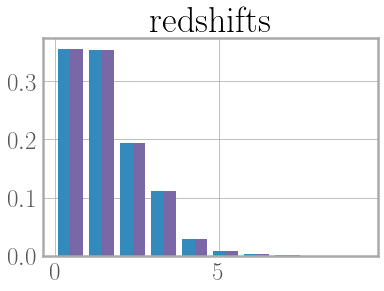

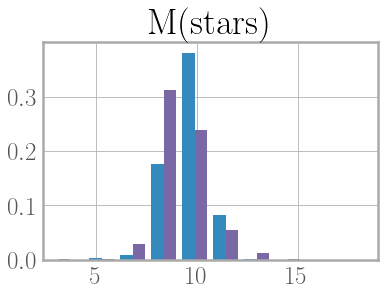

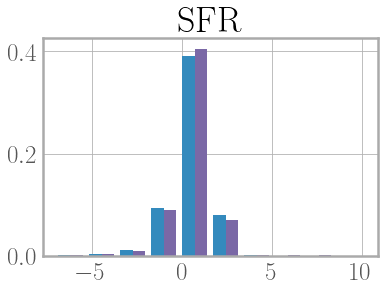

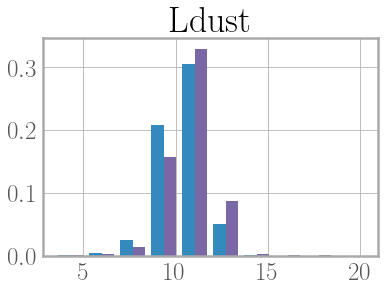

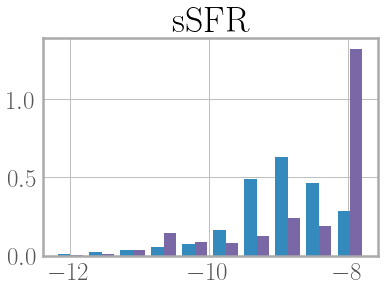

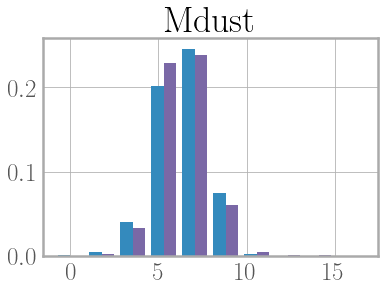

In [47]:
# x,bins,p=plt.hist([redshifth,redshift], bins=20, density=True, histtype='bar')#, stacked=True)
x, bins, p=plt.hist([redshifth,redshifts], density=True)
# plt.bar(x, y2 ,bottom=y1,label='y2')
# for item in p:
#     item.set_height(item.get_height()/sum(x))
plt.title('redshifts')
plt.show()
# plt.hist([SMh,SM], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([SMh,SMs], density=True)
plt.title('M(stars)')
plt.show()
# plt.hist([SFRh,SFR], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([SFRh,SFRs], density=True)
plt.title('SFR')
plt.show()
# plt.hist([Ldusth,Ldust], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([Ldusth,Ldusts], density=True)
plt.title('Ldust')
plt.show()
# plt.hist([sSFRh,sSFR], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([sSFRh,sSFRs], density=True)
plt.title('sSFR')
plt.show()
# plt.hist([Mdusth,Mdust], bins=20, density=True, histtype='bar', stacked=True)
x, bins, p=plt.hist([Mdusth,Mdusts], density=True)
plt.title('Mdust')
plt.show()

<Figure size 1440x720 with 0 Axes>

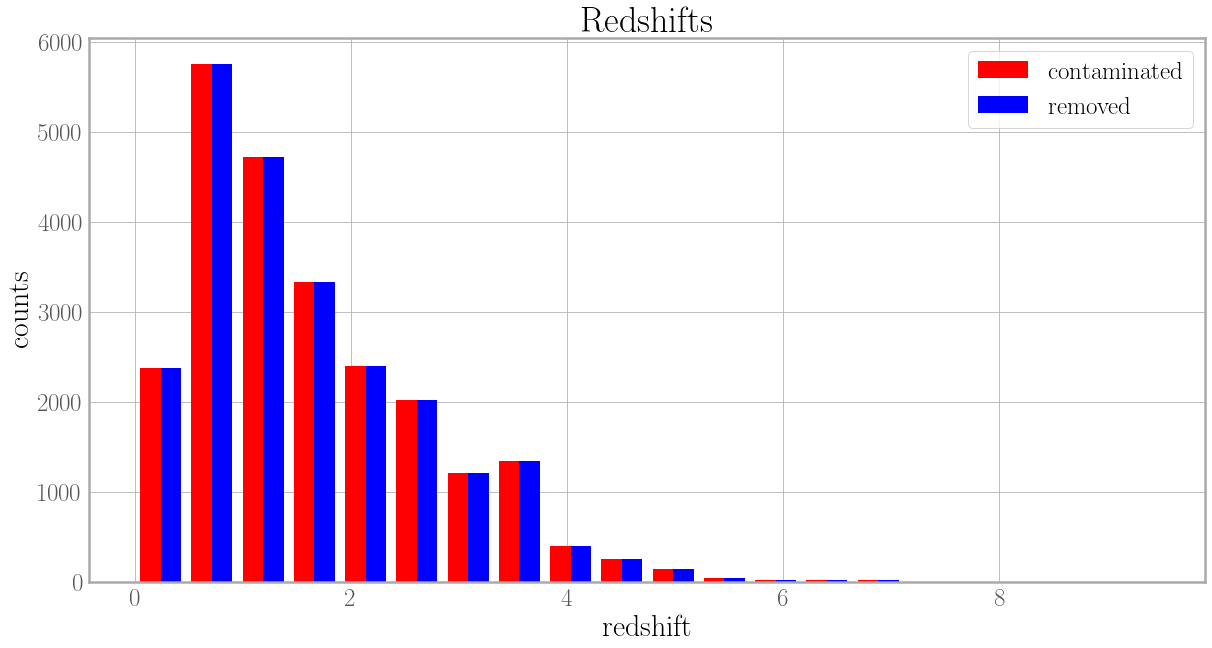

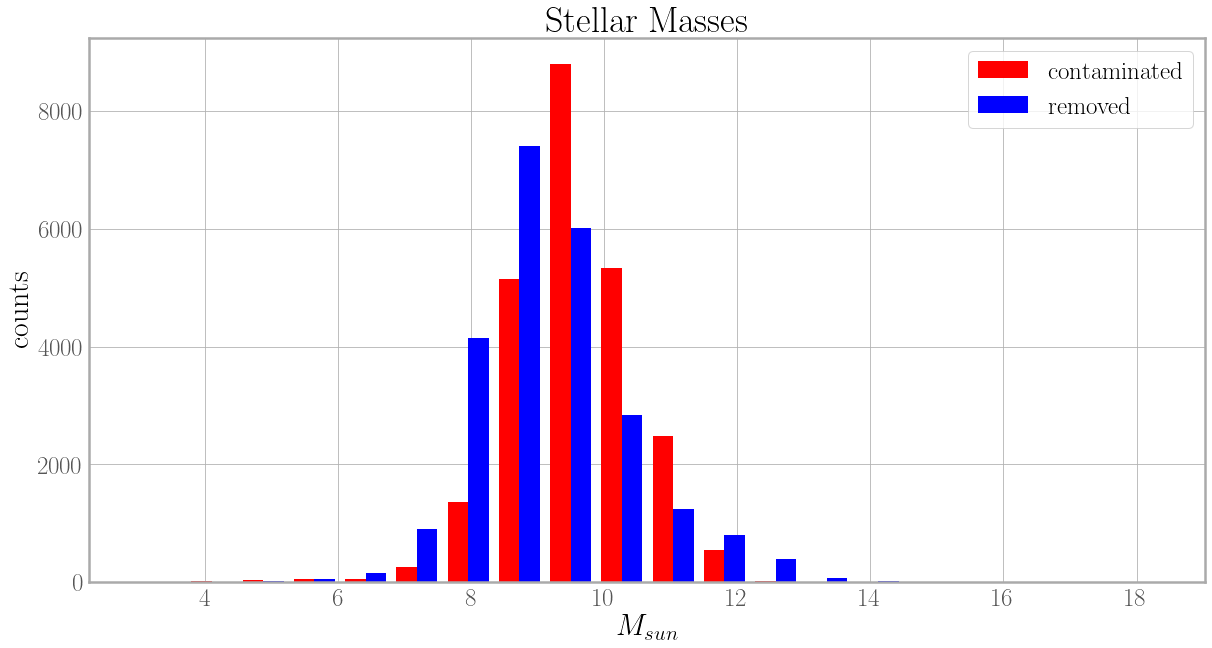

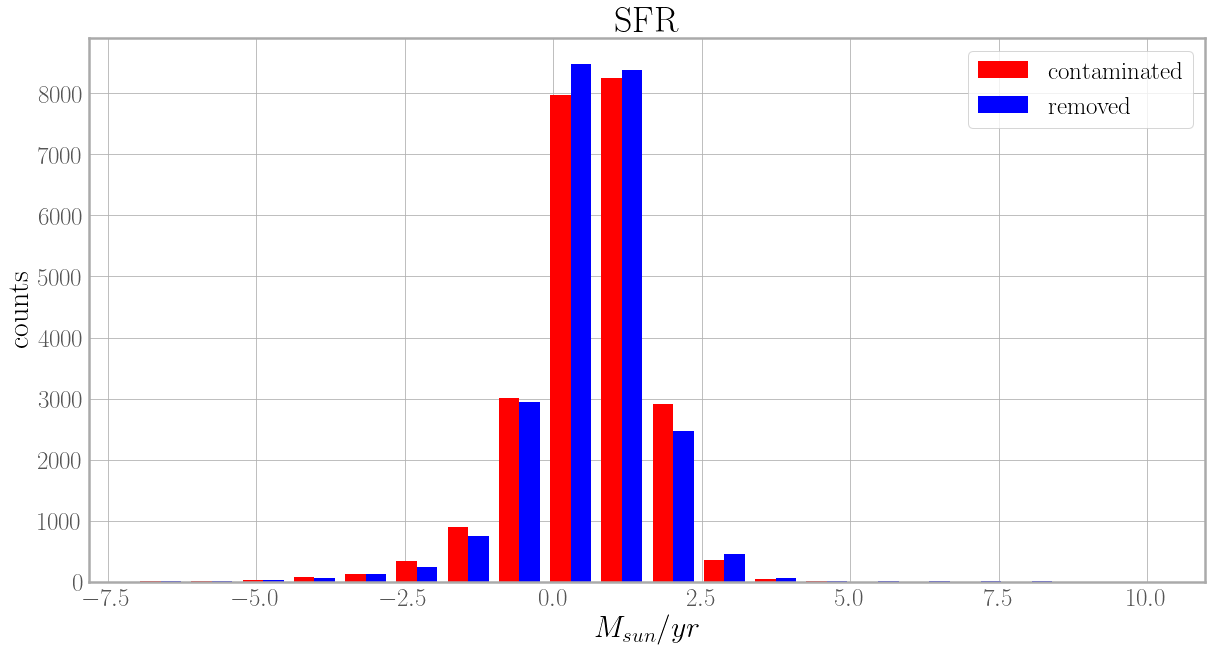

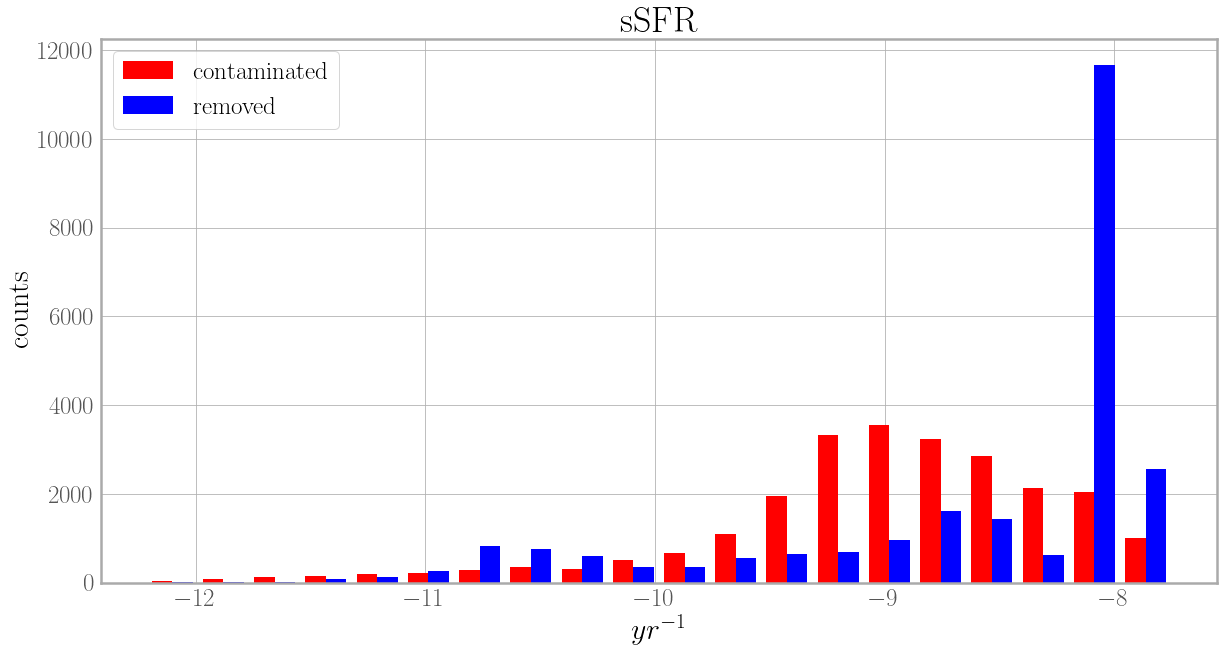

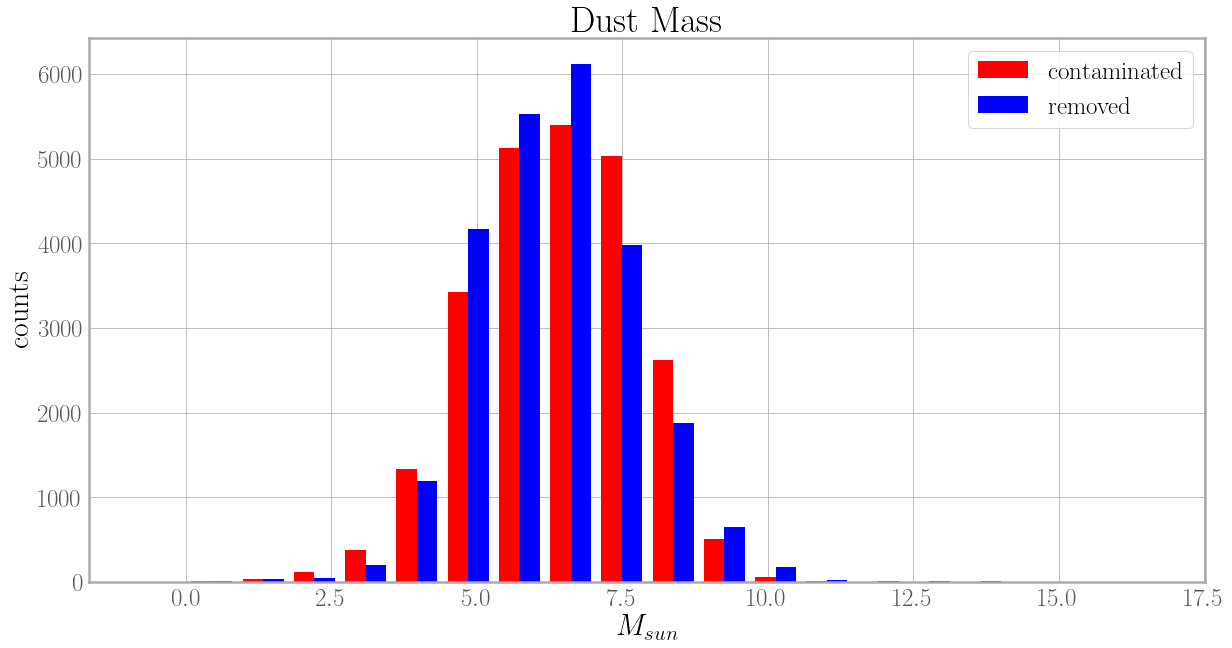

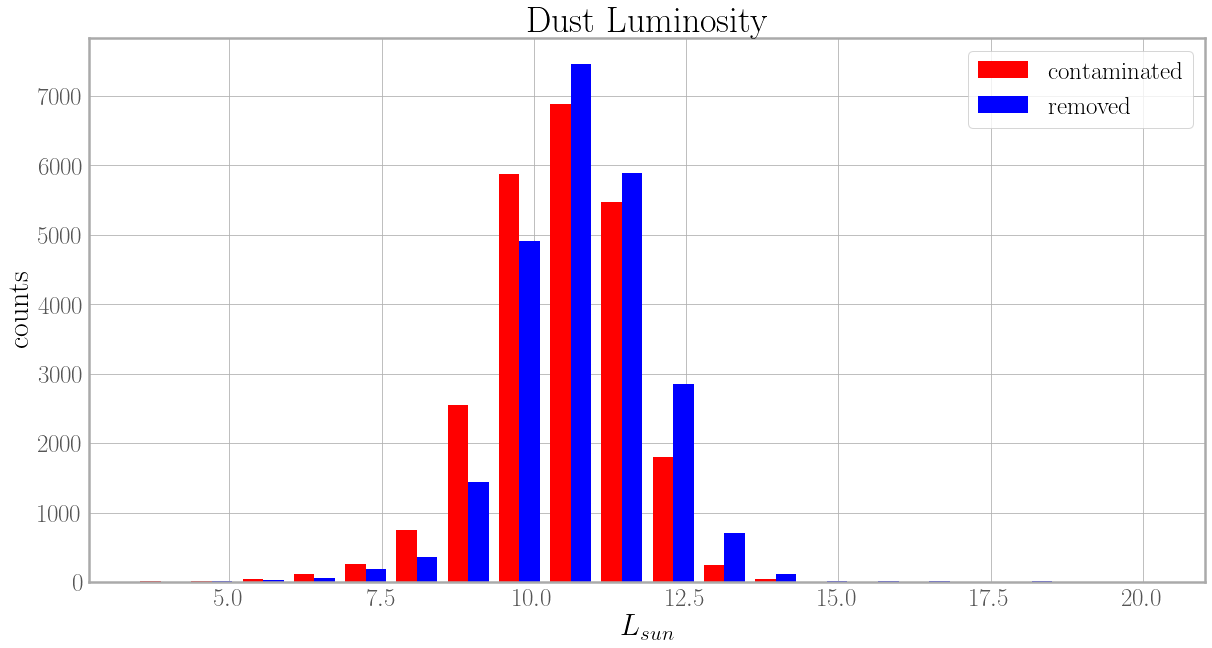

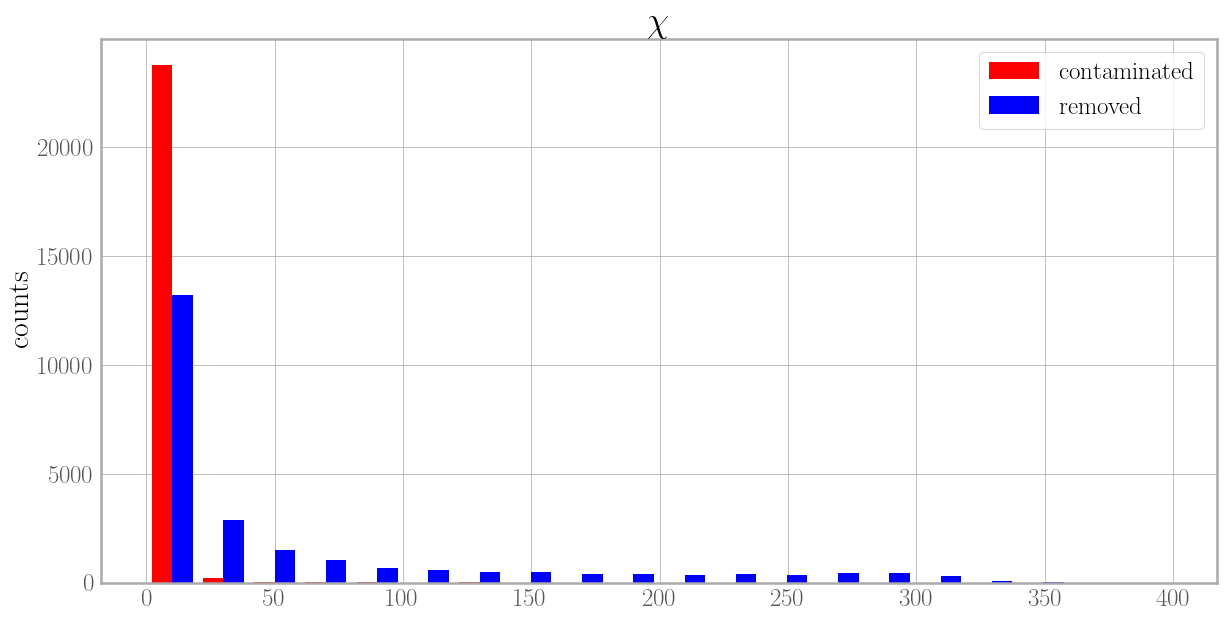

<Figure size 1440x720 with 0 Axes>

In [85]:
plt.figure(figsize=(20,10))
plt.hist([redshifth,redshifts],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Redshifts')
plt.xlabel('redshift')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL1',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([SMh,SMs],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Stellar Masses')
plt.xlabel(r'$M_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL2',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([SFRh,SFRs],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('SFR')
plt.xlabel(r'$M_{sun}/yr$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL3',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([sSFRh,sSFRs],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('sSFR')
plt.xlabel(r'$yr^{-1}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL4',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([Mdusth,Mdusts],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Dust Mass')
plt.xlabel(r'$M_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL5',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([Ldusth,Ldusts],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Dust Luminosity')
plt.xlabel(r'$L_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL6',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([chi2h,chi2s],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title(r'$\chi$')
plt.xlabel('')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL7',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################

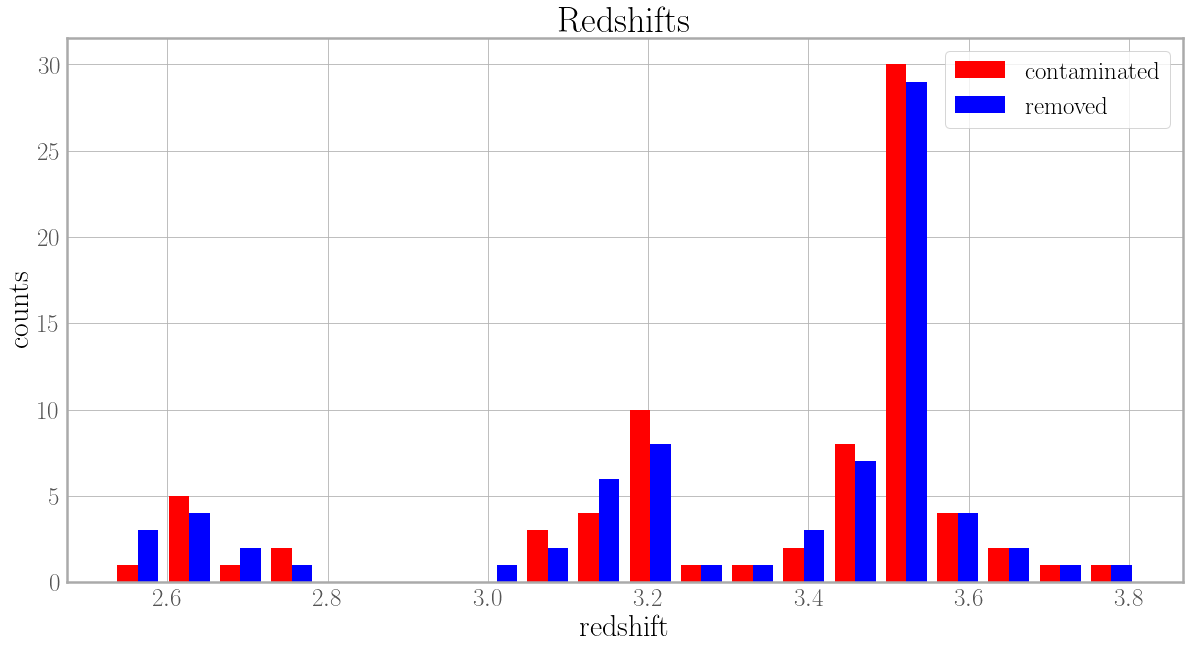

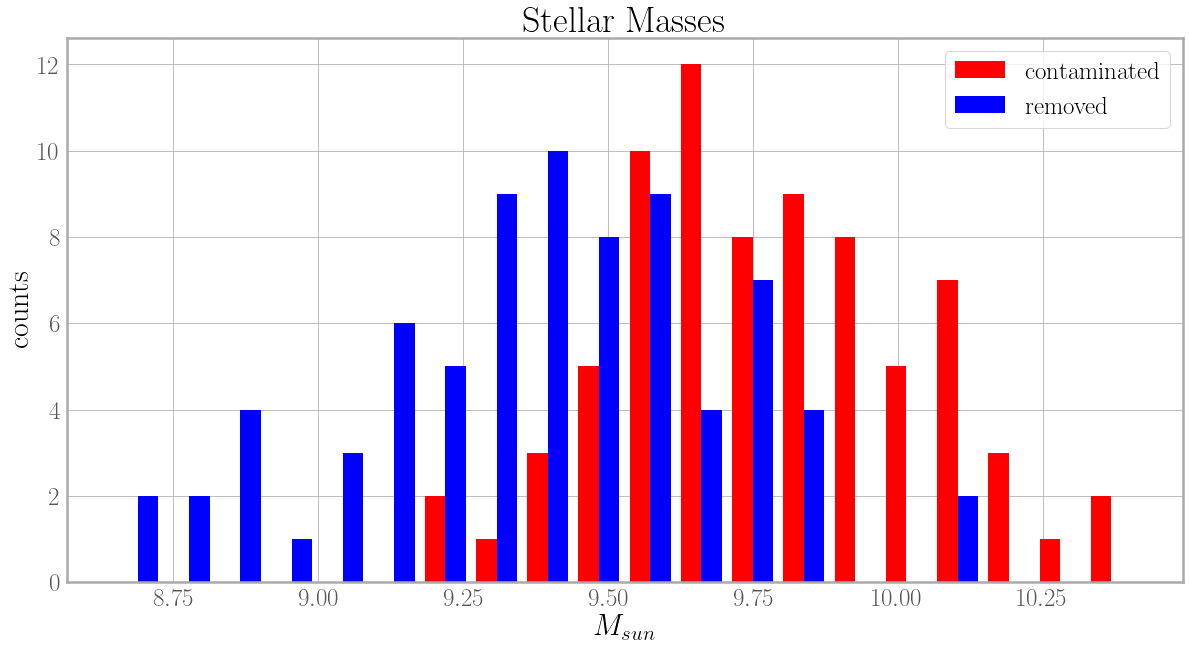

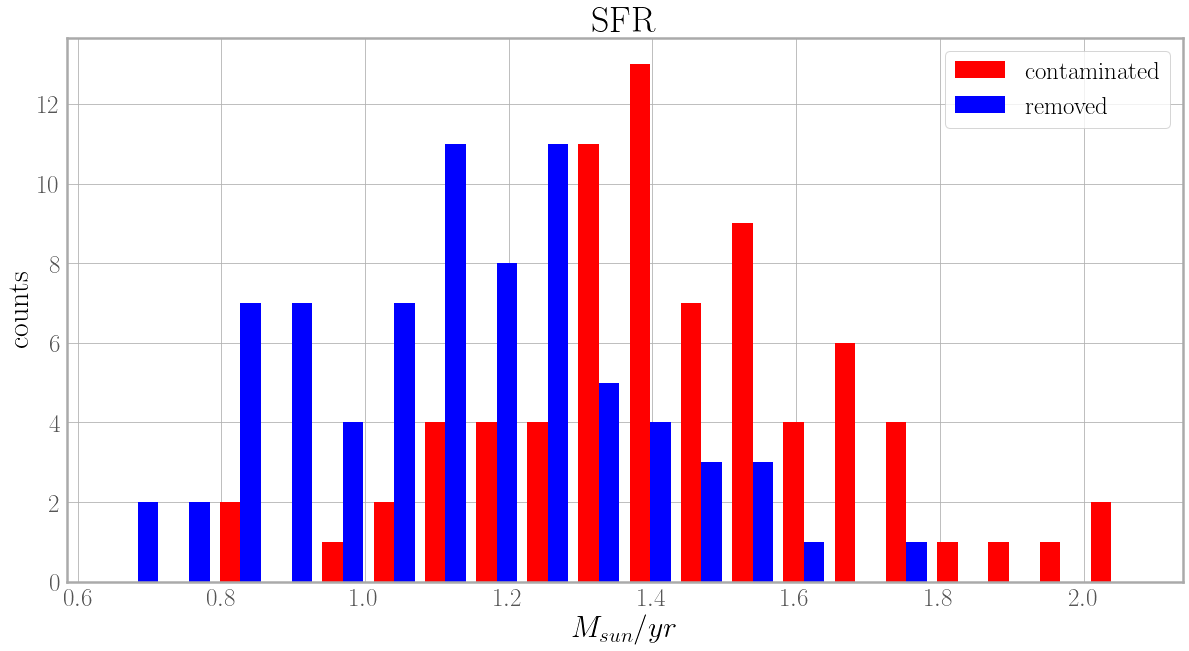

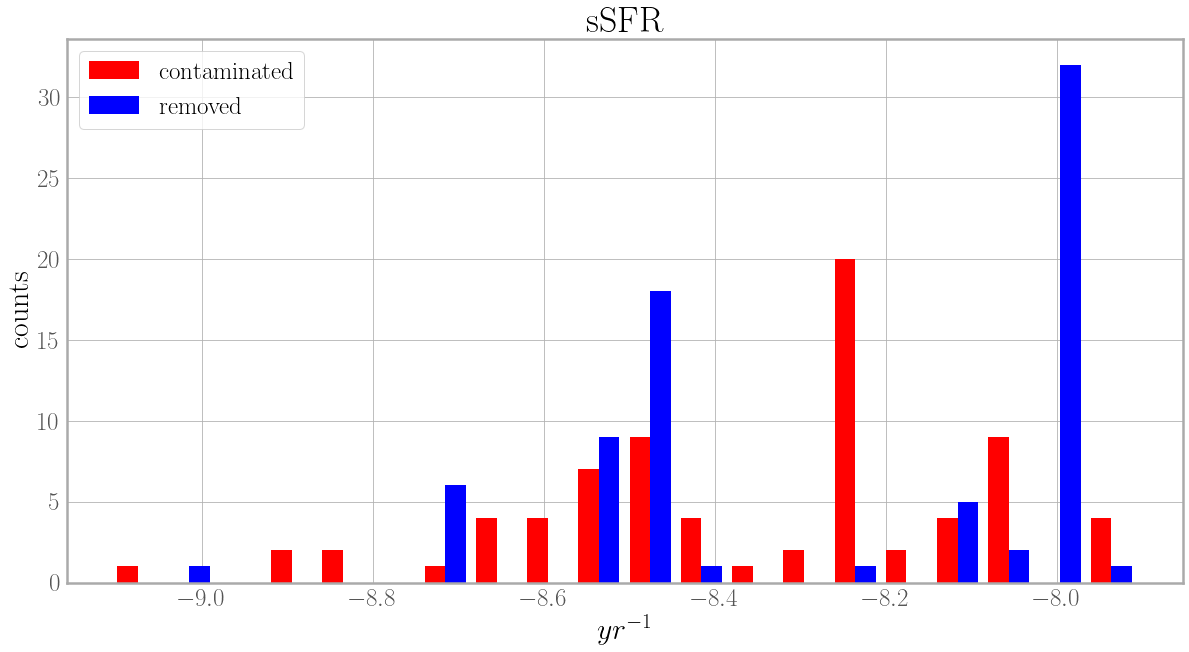

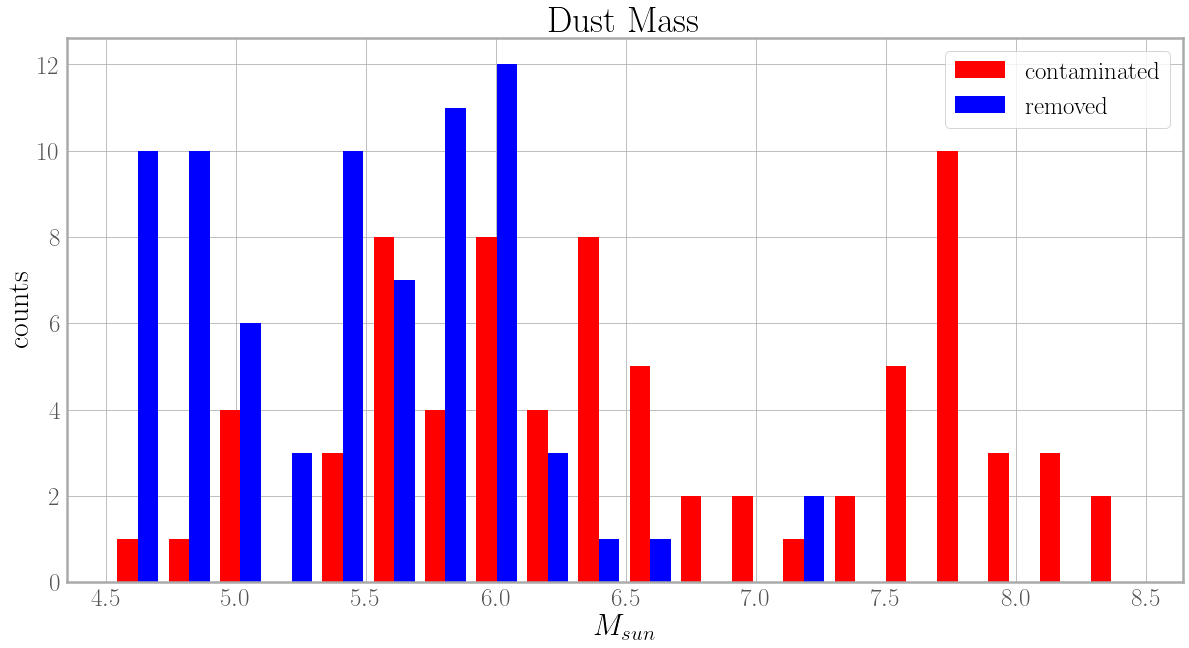

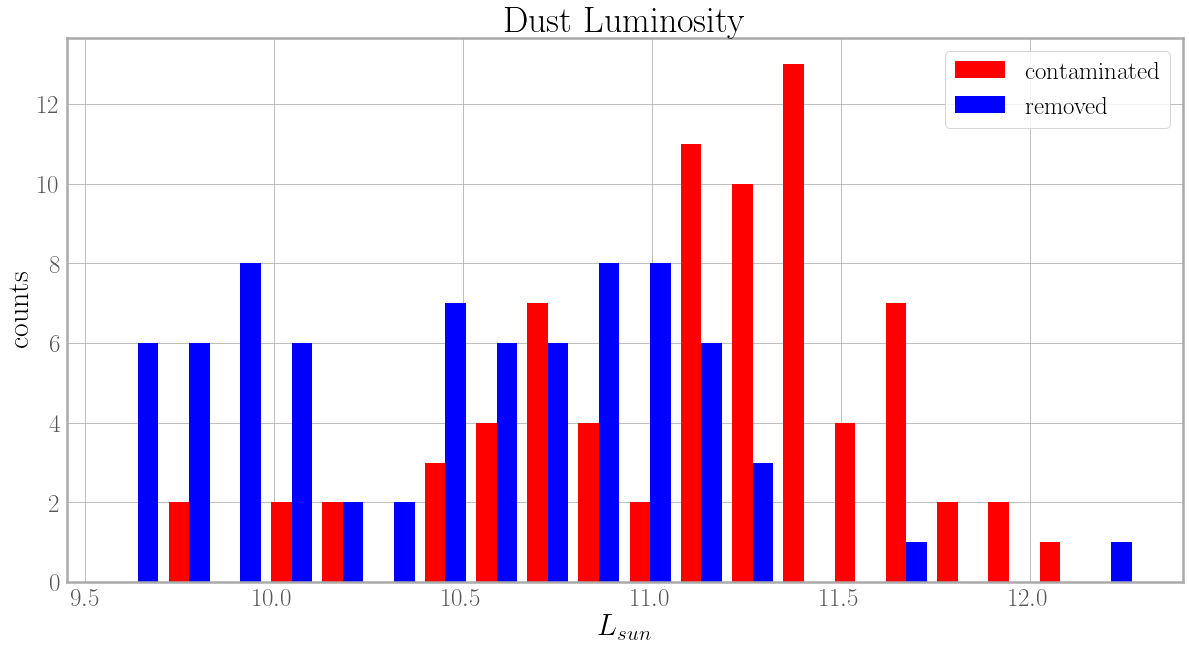

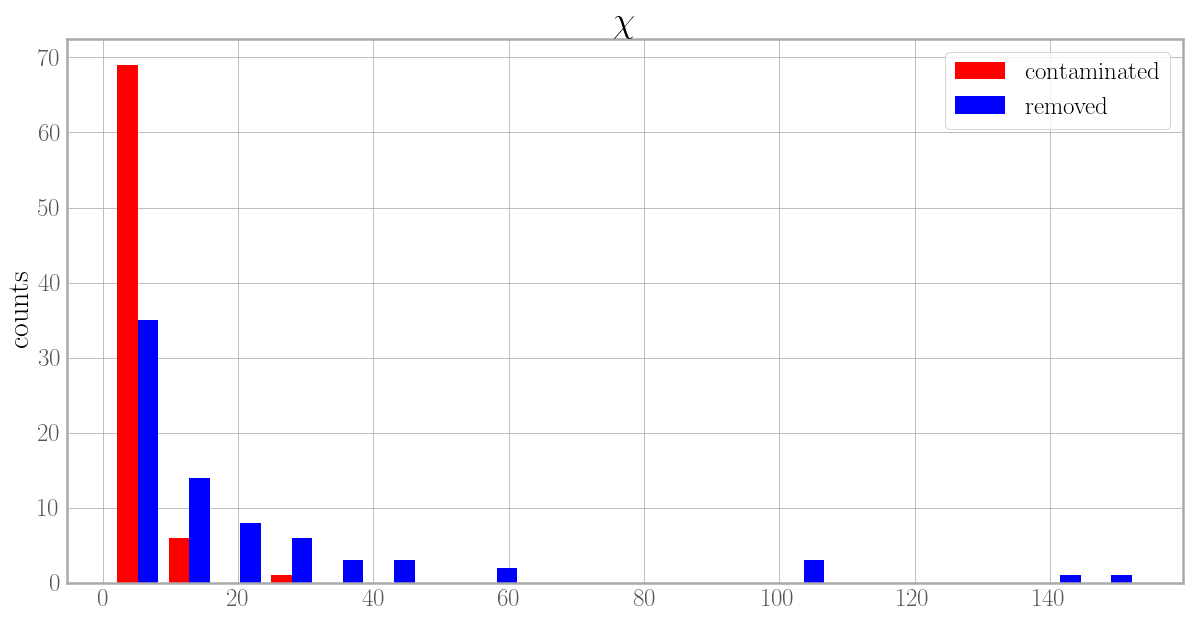

In [87]:
plt.figure(figsize=(20,10))
plt.hist([redshift,redshift_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Redshifts')
plt.xlabel('redshift')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL1EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([SM,SM_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Stellar Masses')
plt.xlabel(r'$M_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL2EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([SFR,SFR_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('SFR')
plt.xlabel(r'$M_{sun}/yr$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL3EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([sSFR,sSFR_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('sSFR')
plt.xlabel(r'$yr^{-1}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL4EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([Mdust,Mdust_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Dust Mass')
plt.xlabel(r'$M_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL5EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([Ldust,Ldust_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title('Dust Luminosity')
plt.xlabel(r'$L_{sun}$')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL6EELGS',bbox_inches='tight')
plt.figure(figsize=(20,10))
######################################################################################
plt.hist([chi2,chi2_ES],color=['red','blue'],label=['contaminated','removed'],bins=20)
plt.legend()
plt.title(r'$\chi$')
plt.xlabel('')
plt.ylabel('counts')
plt.savefig('SeptemberUpdateSELnonSEL7EELGS',bbox_inches='tight')
# plt.figure(figsize=(20,10))
######################################################################################

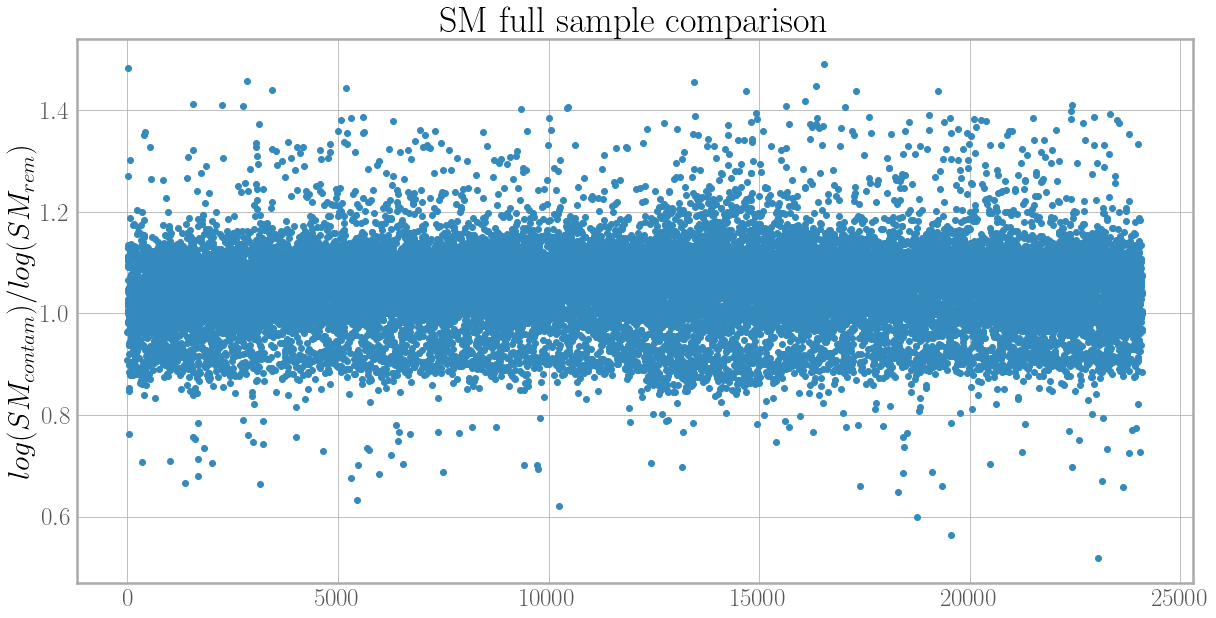

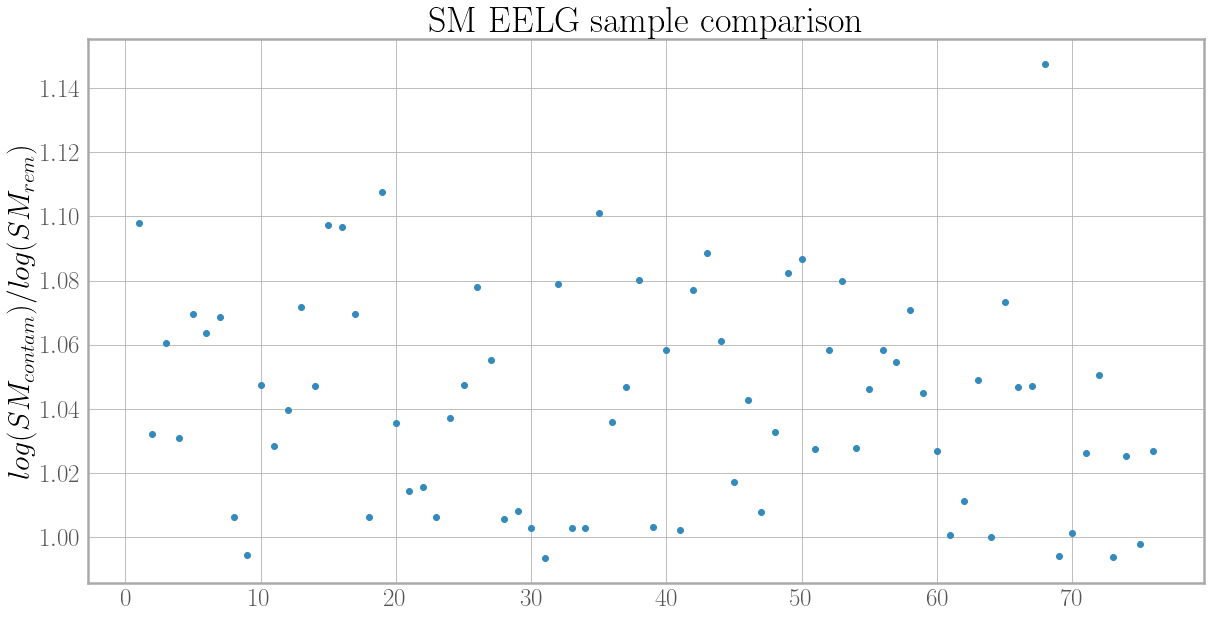

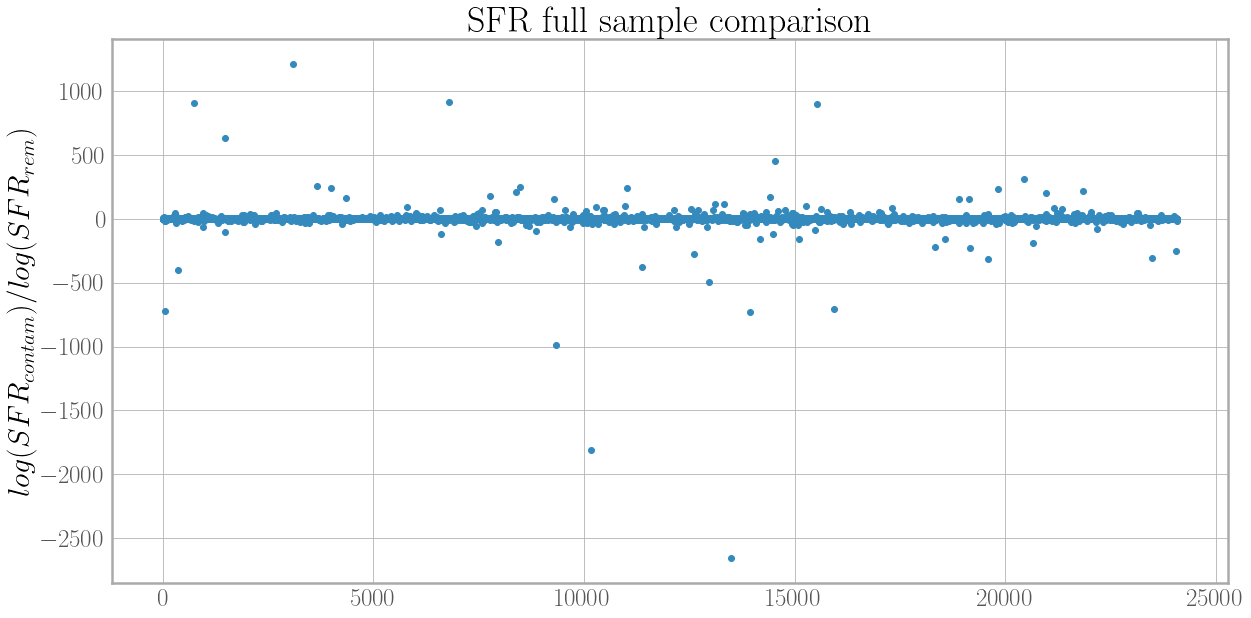

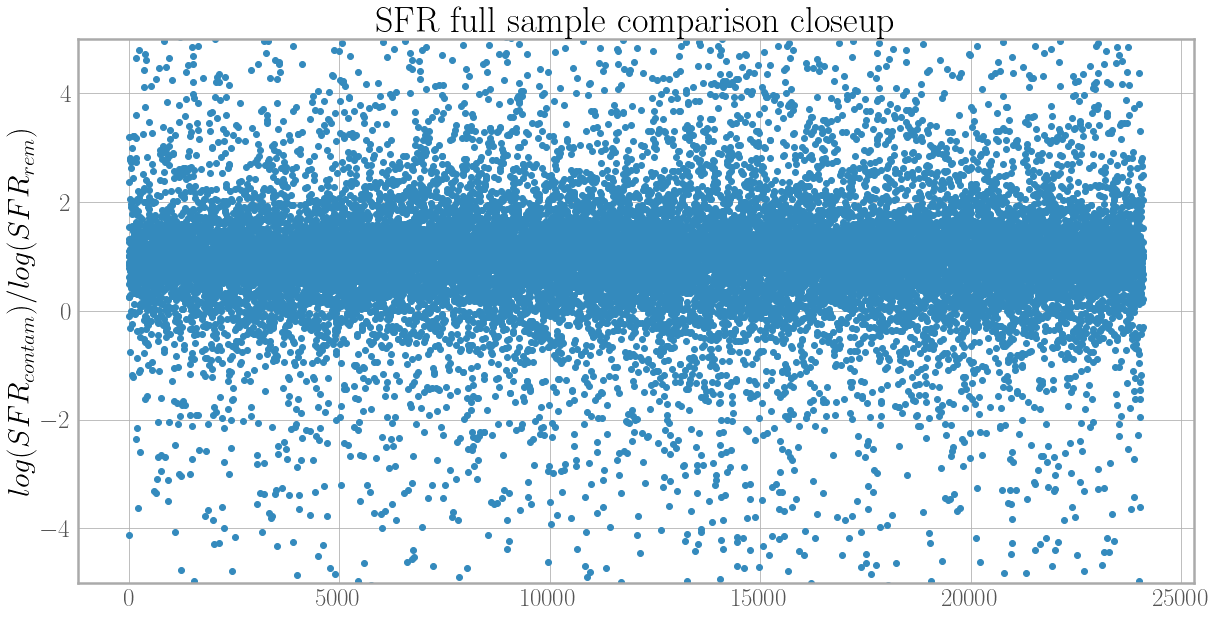

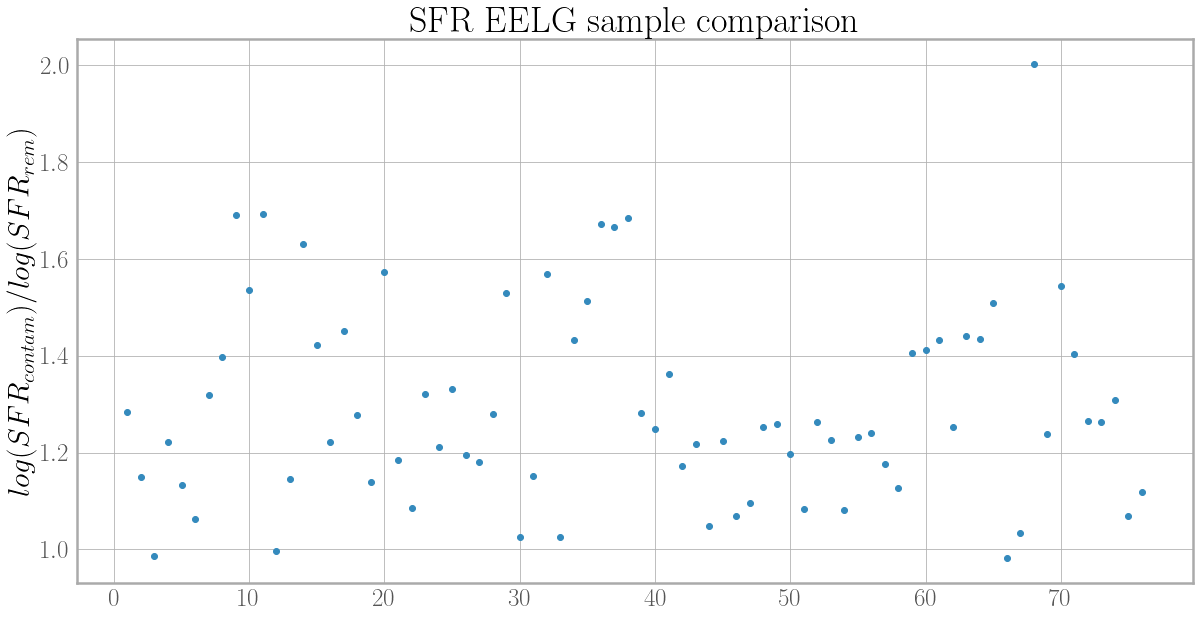

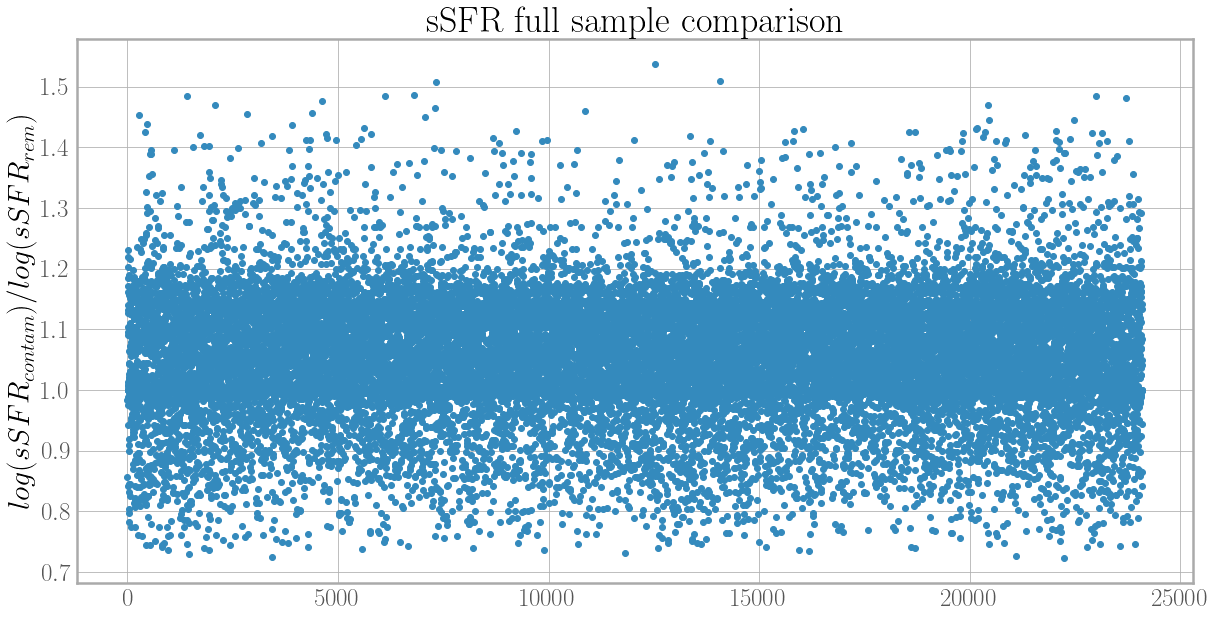

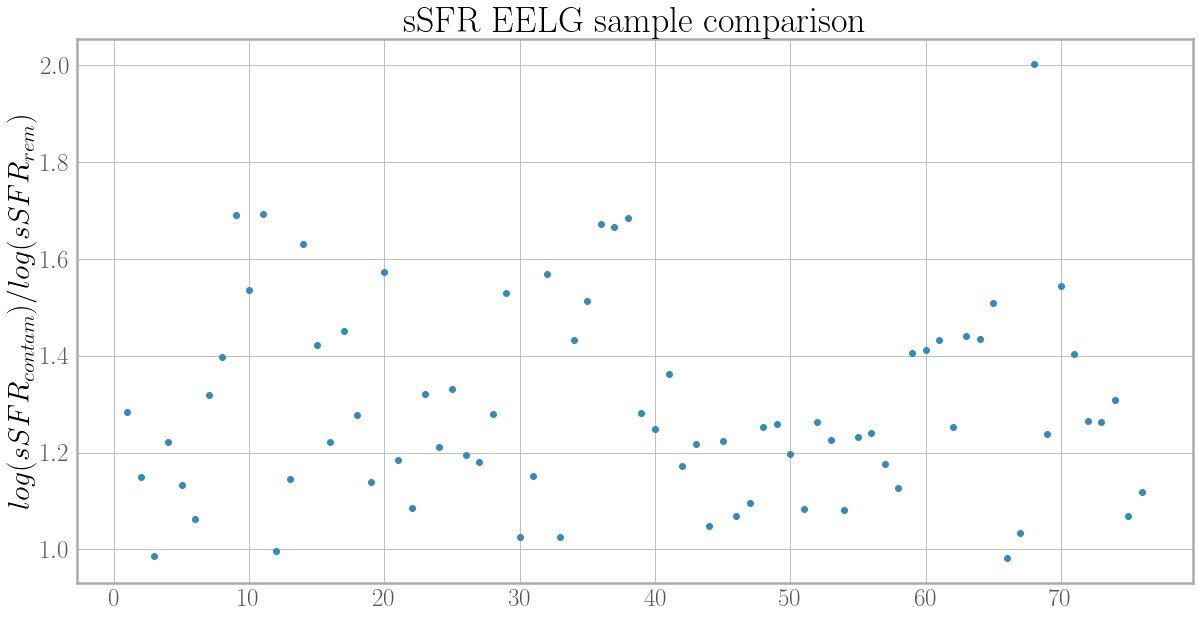

In [115]:
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SMh),len(SMh)),(SMh/SMs))
plt.ylabel(r'$log(SM_{contam})/log(SM_{rem})$')
plt.title('SM full sample comparison')
plt.savefig('SeptemberUpdateSM1',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SM),len(SM)),(SM/SM_ES))
plt.ylabel(r'$log(SM_{contam})/log(SM_{rem})$')
plt.title('SM EELG sample comparison')
plt.savefig('SeptemberUpdateSM2',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SFRh),len(SFRh)),(SFRh/SFRs))
plt.ylabel(r'$log(SFR_{contam})/log(SFR_{rem})$')
plt.savefig('SeptemberUpdateSFR1a',bbox_inches='tight')
plt.title('SFR full sample comparison')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SFRh),len(SFRh)),(SFRh/SFRs))
plt.ylabel(r'$log(SFR_{contam})/log(SFR_{rem})$')
plt.title('SFR full sample comparison closeup')
plt.ylim(-5,5)
plt.savefig('SeptemberUpdateSFR1b',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SFR),len(SFR)),(SFR/SFR_ES))
plt.ylabel(r'$log(SFR_{contam})/log(SFR_{rem})$')
plt.title('SFR EELG sample comparison')
plt.savefig('SeptemberUpdateSFR2',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(sSFRh),len(sSFRh)),(sSFRh/sSFRs))
plt.ylabel(r'$log(sSFR_{contam})/log(sSFR_{rem})$')
plt.title('sSFR full sample comparison')
plt.savefig('SeptemberUpdate_sSFR1',bbox_inches='tight')
plt.figure(figsize=(20,10))
plt.scatter(linspace(1,len(SFR),len(SFR)),(SFR/SFR_ES))
plt.ylabel(r'$log(sSFR_{contam})/log(sSFR_{rem})$')
plt.title('sSFR EELG sample comparison')
plt.savefig('SeptemberUpdate_sSFR2',bbox_inches='tight')


/tmp/ipykernel_72438/2594181827.py:91: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax =plt.subplots(1,1,figsize=(16,10))


Text(0, 0.5, 'lg(M/Lk)')

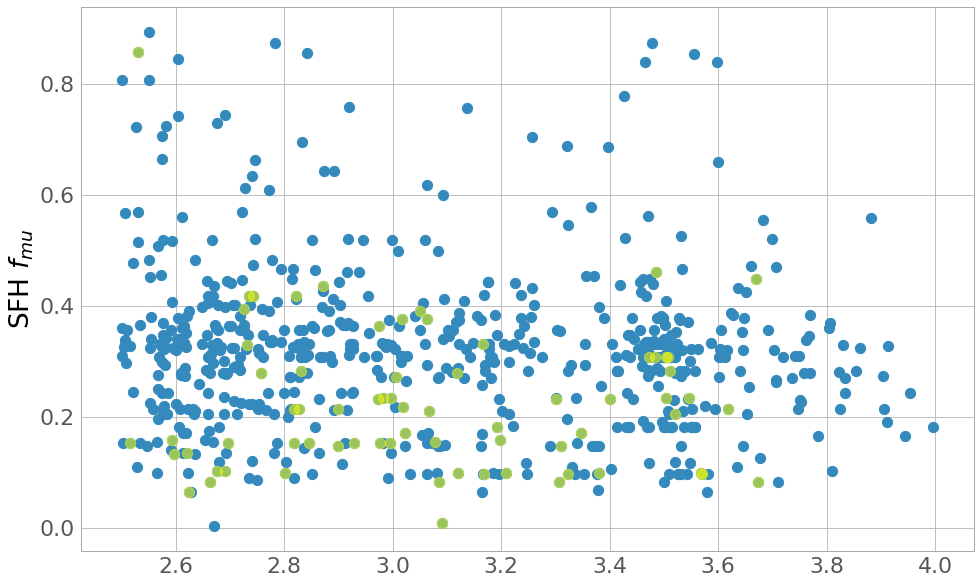

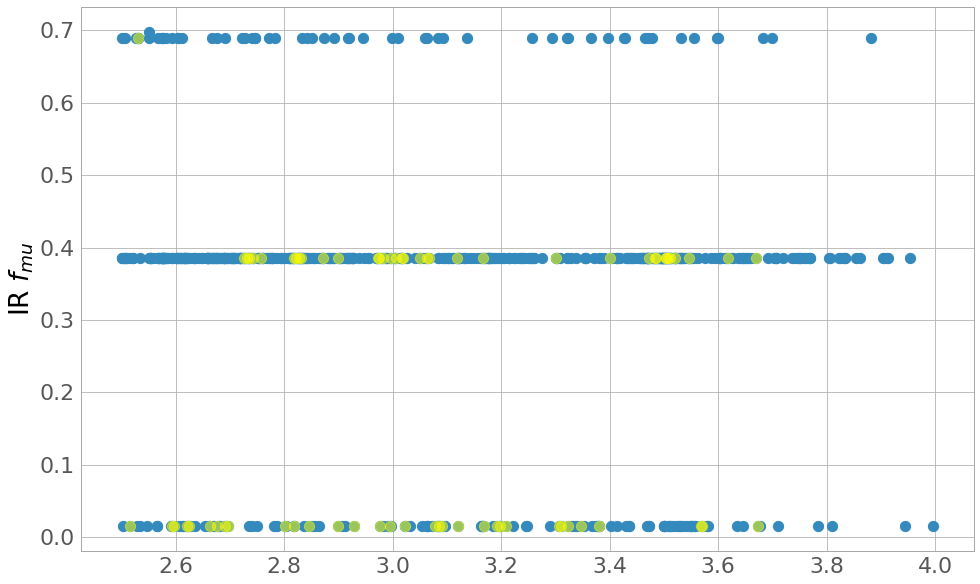

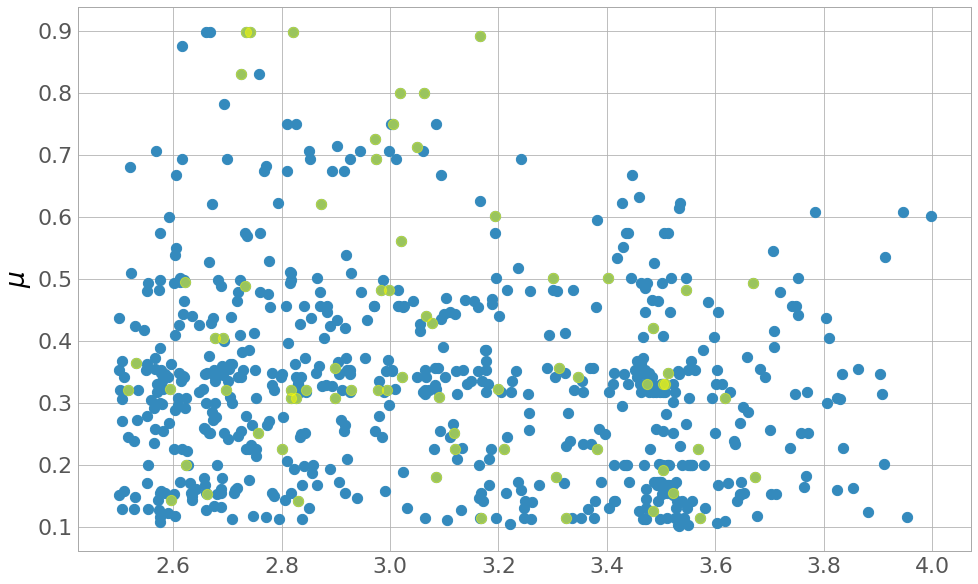

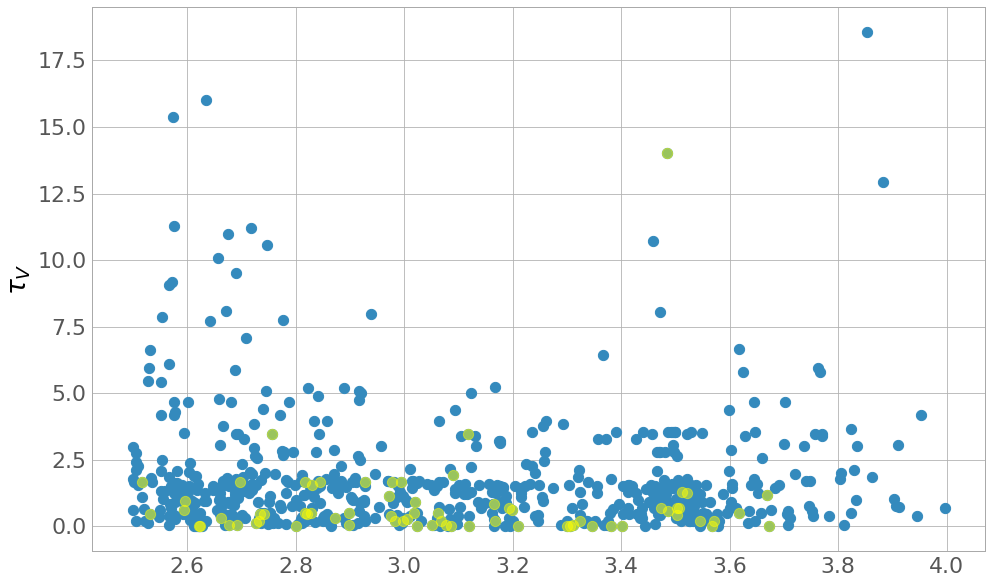

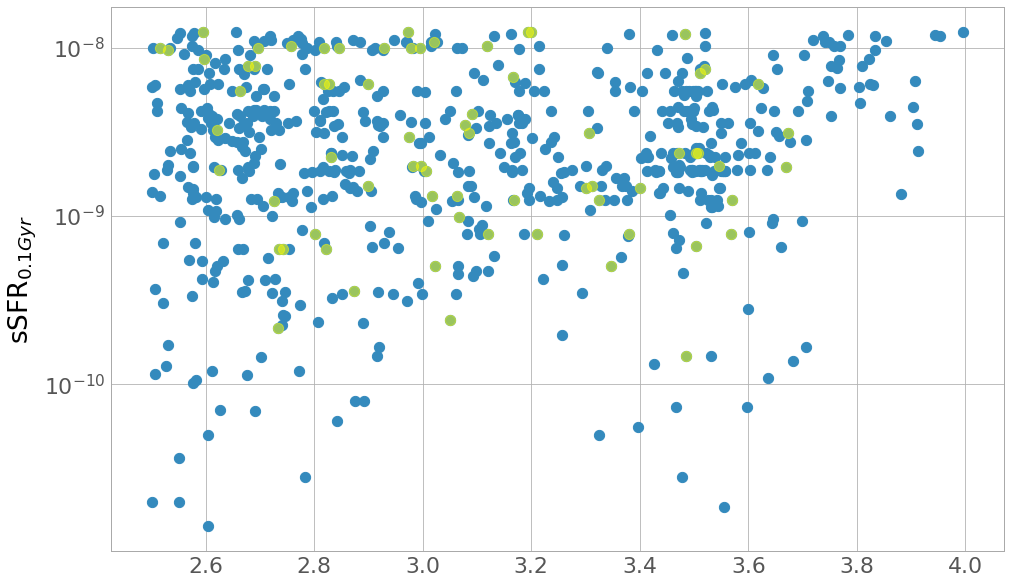

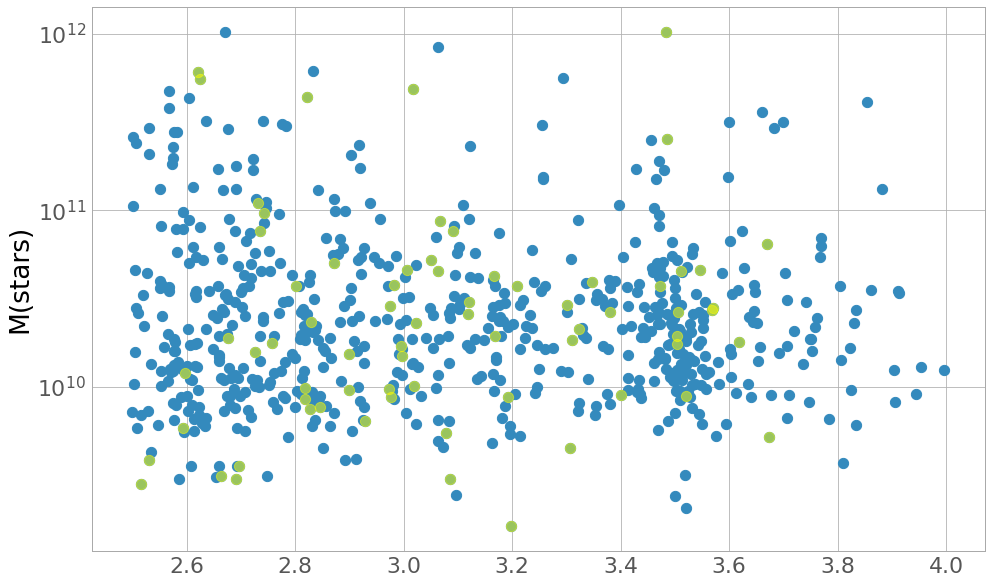

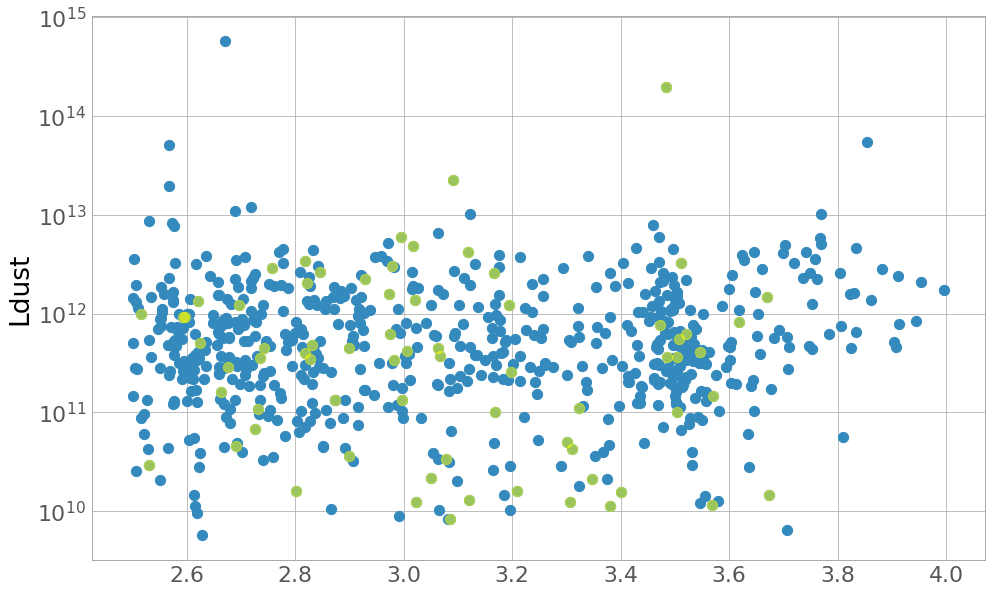

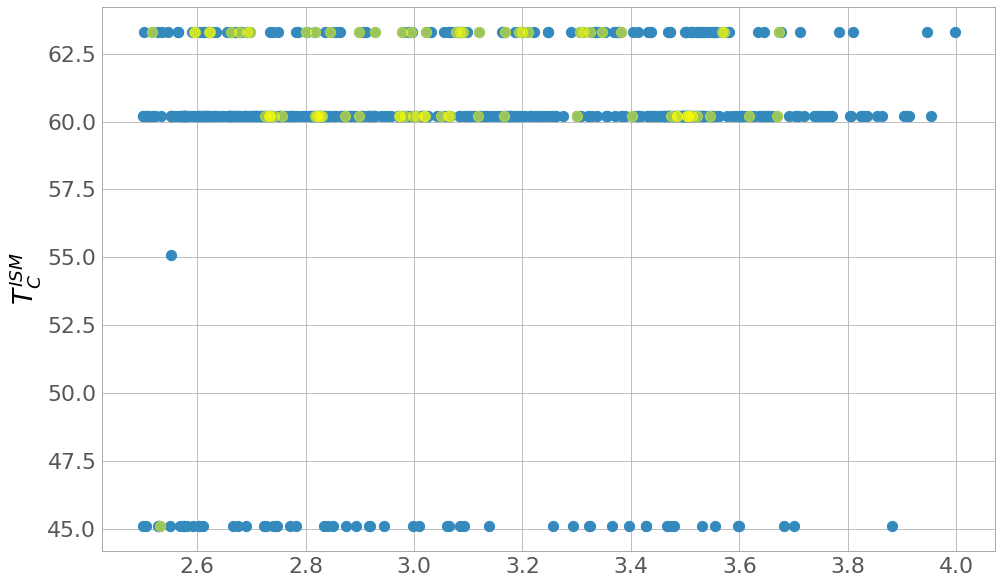

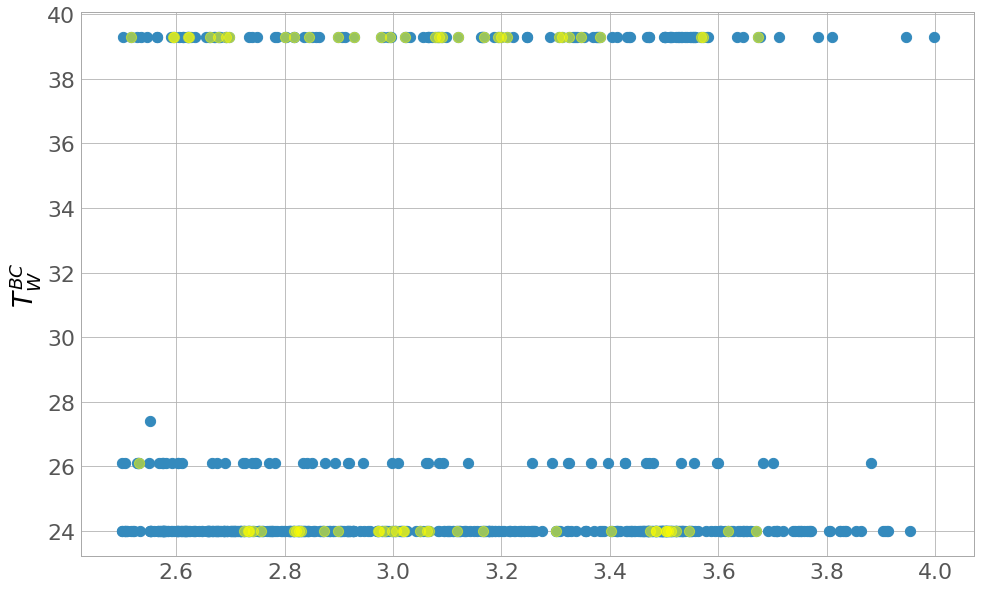

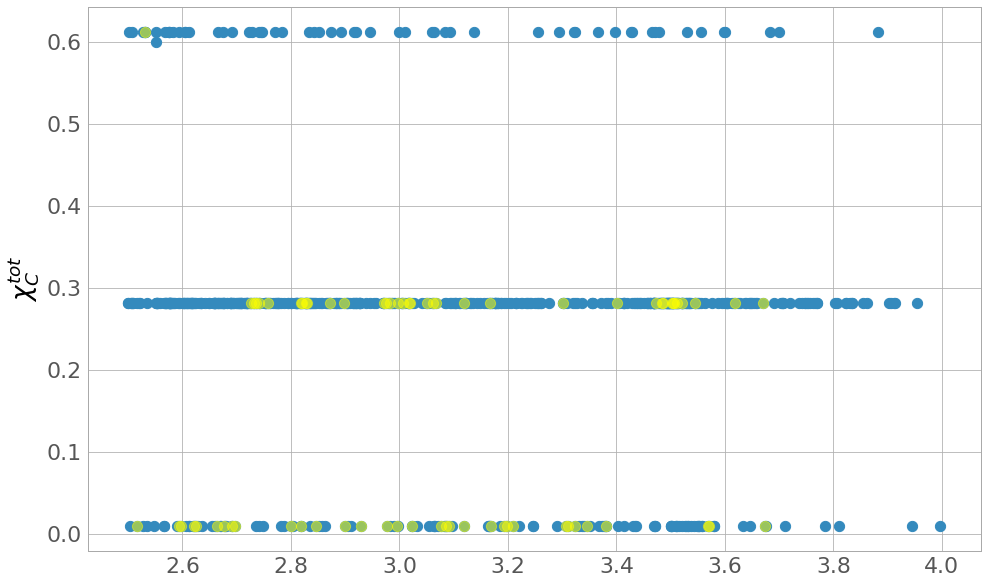

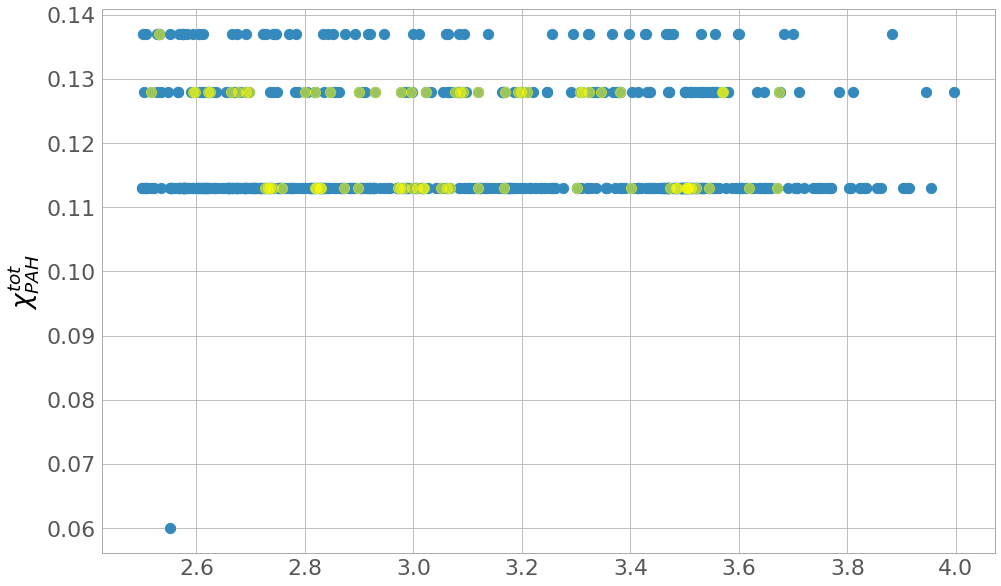

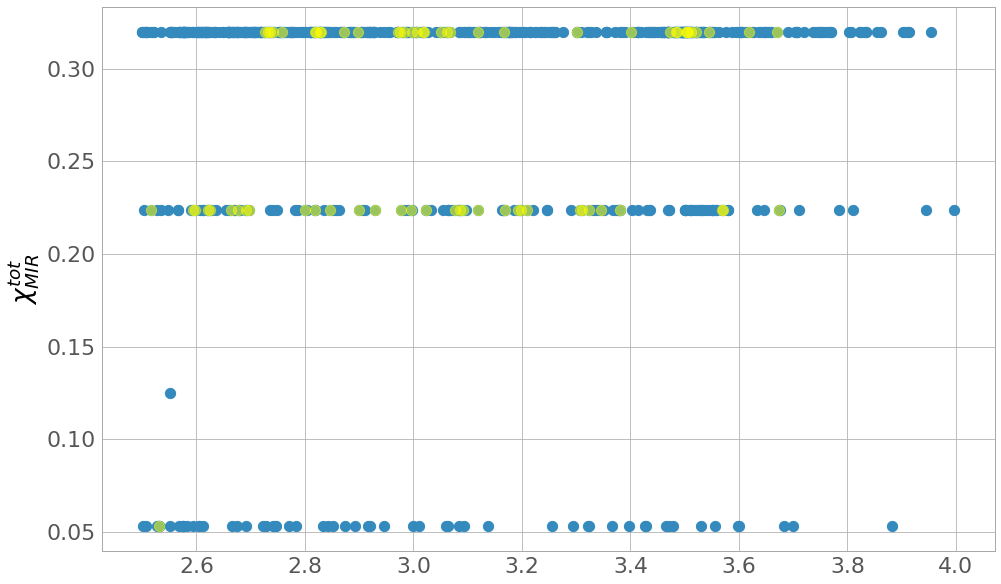

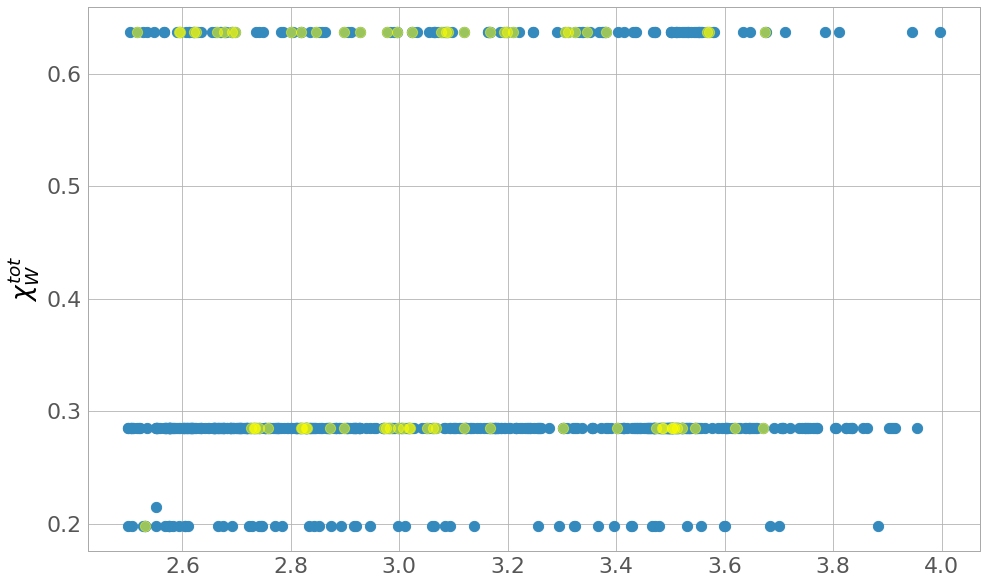

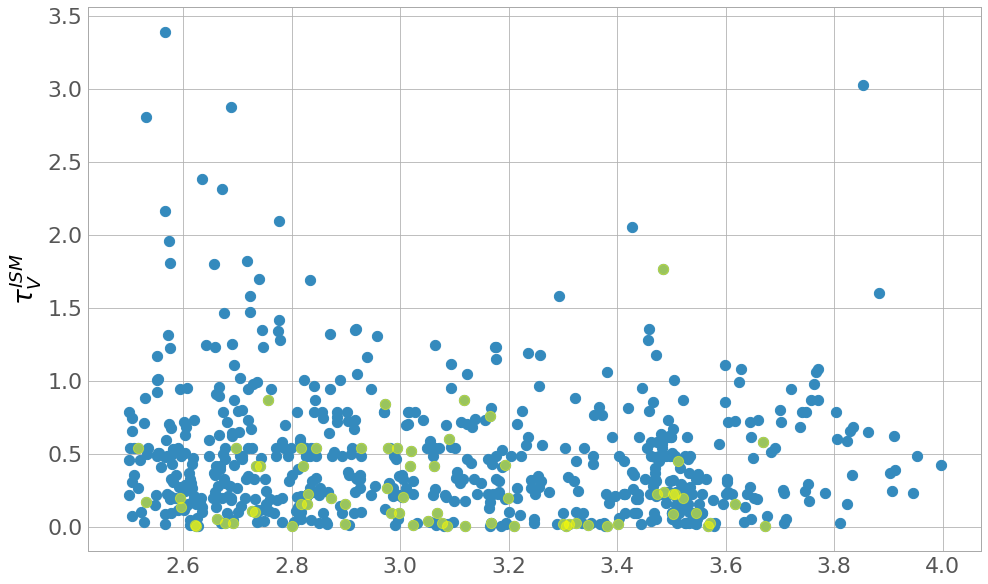

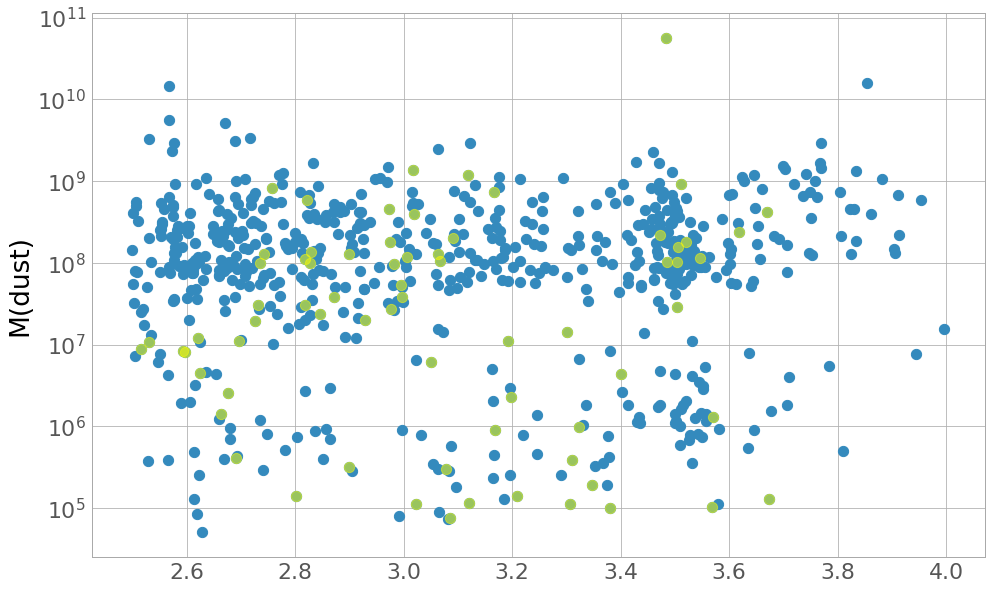

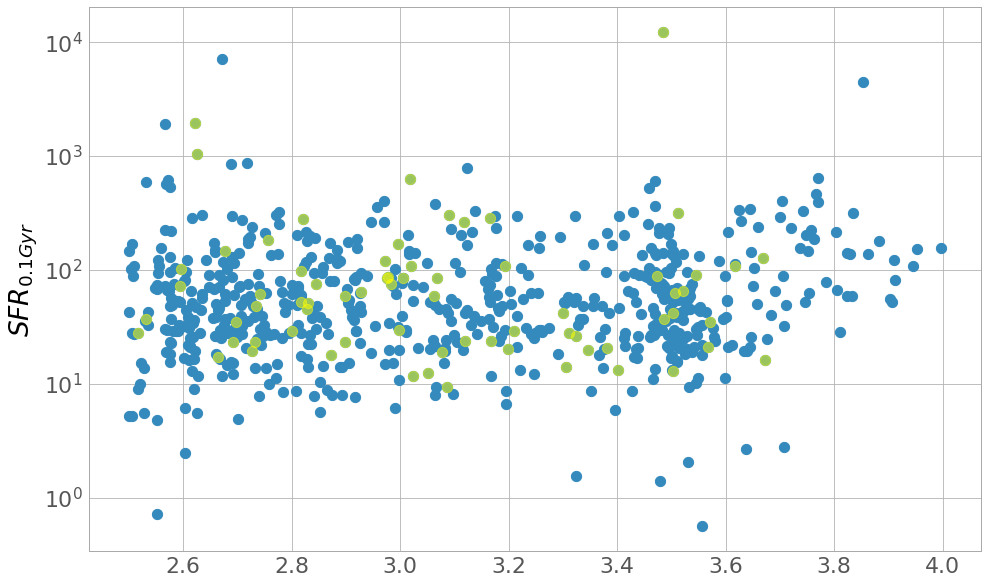

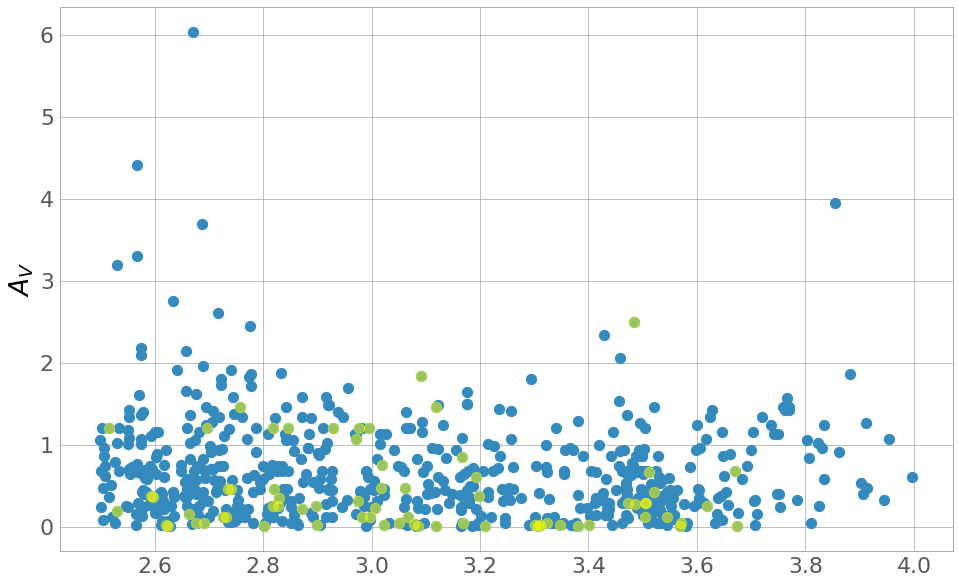

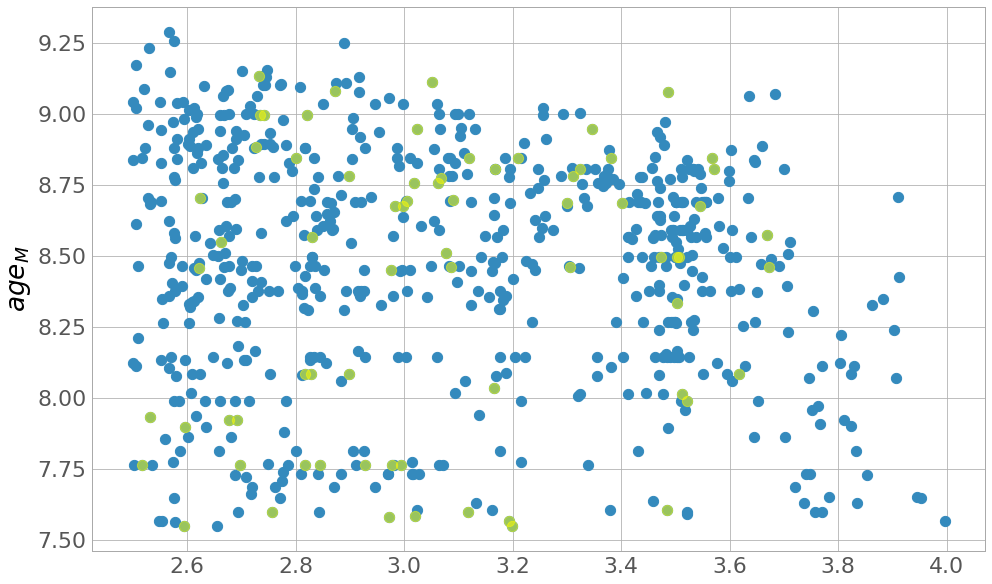

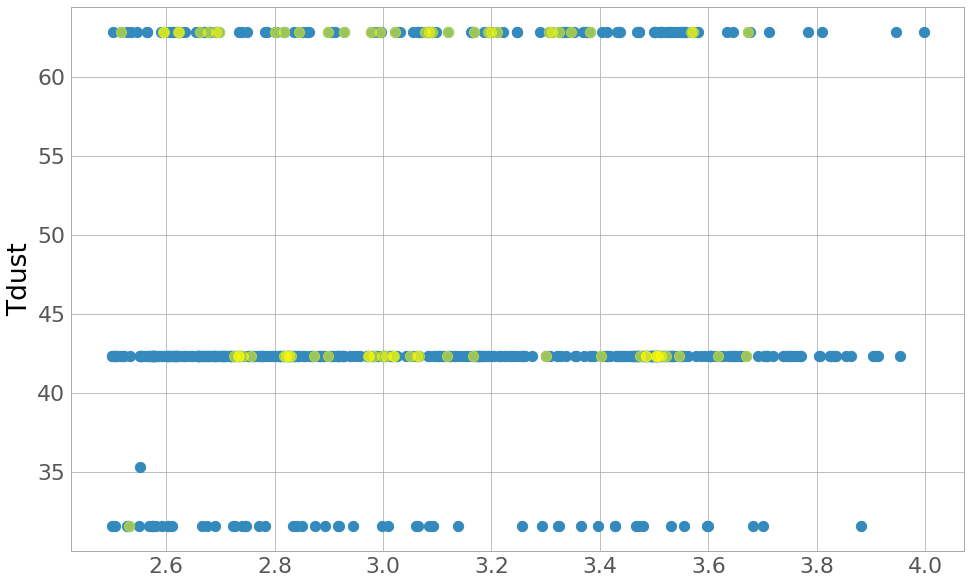

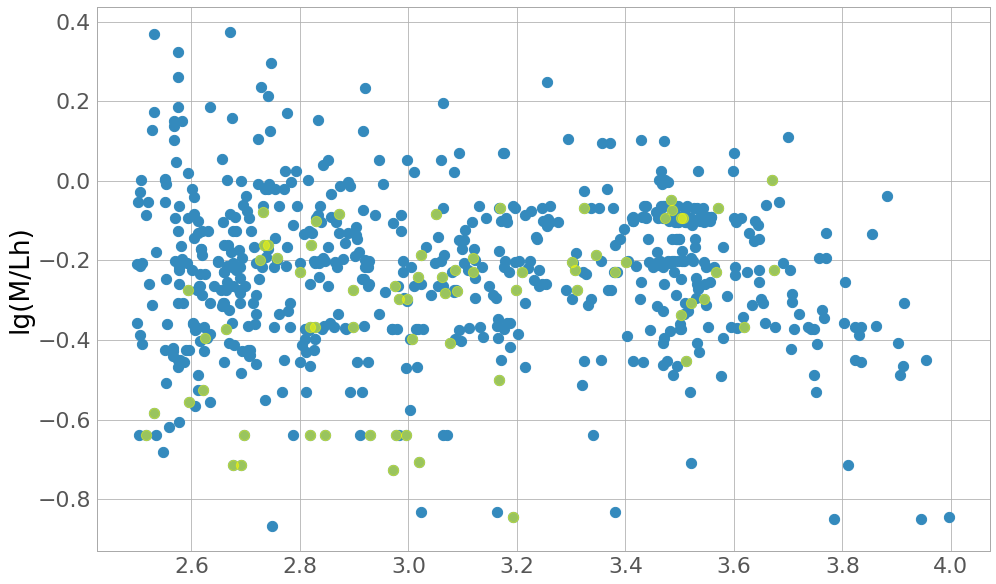

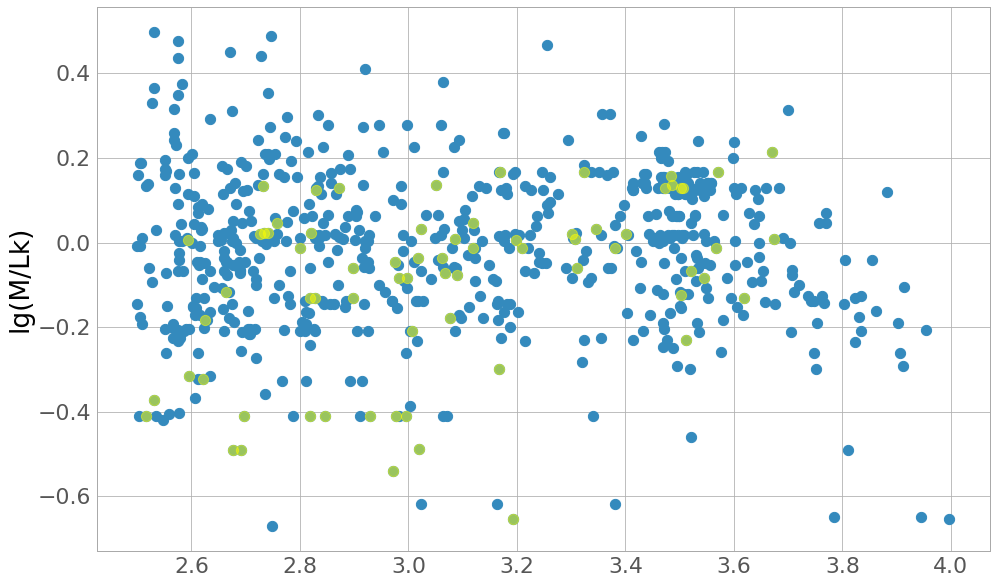

In [84]:
# Parameters=[r'SFH $f_{mu}$',r'IR $f_{mu}$',r'$\mu$',r'$\tau_V$',r'sSFR$_{0.1Gyr}$',
#'M(stars)','Ldust',r'$T_C^{ISM}$',r'$T_W^{BC}$',r'$\chi_C^{tot}$',r'$\chi_{PAH}^{tot}$',
#r'$\chi_{MIR}^{tot}$',r'$\chi_{W}^{tot}$',r'$\tau_{V}^{ISM}$','M(dust)',r'$SFR_{0.1Gyr}$',
#r'$A_V$',r'$age_M$','Tdust','lg(M/Lh)','lg(M/Lk)']
mpl.rcParams.update({'font.size': 22})
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'SFH $f_{mu}$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'SFH $f_{mu}$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'SFH $f_{mu}$')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'IR $f_{mu}$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'IR $f_{mu}$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'IR $f_{mu}$')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'$\mu$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'$\mu$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'$\mu$')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'$\tau_V$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'$\tau_V$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'$\tau_V$')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'sSFR$_{0.1Gyr}$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'sSFR$_{0.1Gyr}$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'sSFR$_{0.1Gyr}$')
ax.set_yscale('log')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F['M(stars)'],s=105)
plt.scatter(Fun['redshift'],Fun['M(stars)'],s=105, c='yellow',alpha=0.5)
plt.ylabel('M(stars)')
ax.set_yscale('log')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F['Ldust'],s=105)
plt.scatter(Fun['redshift'],Fun['Ldust'],s=105, c='yellow',alpha=0.5)
plt.ylabel('Ldust')
ax.set_yscale('log')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'$T_C^{ISM}$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'$T_C^{ISM}$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'$T_C^{ISM}$')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'$T_W^{BC}$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'$T_W^{BC}$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'$T_W^{BC}$')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'$\chi_C^{tot}$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'$\chi_C^{tot}$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'$\chi_C^{tot}$')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'$\chi_{PAH}^{tot}$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'$\chi_{PAH}^{tot}$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'$\chi_{PAH}^{tot}$')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'$\chi_{MIR}^{tot}$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'$\chi_{MIR}^{tot}$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'$\chi_{MIR}^{tot}$')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'$\chi_{W}^{tot}$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'$\chi_{W}^{tot}$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'$\chi_{W}^{tot}$')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'$\tau_{V}^{ISM}$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'$\tau_{V}^{ISM}$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'$\tau_{V}^{ISM}$')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F['M(dust)'],s=105)
plt.scatter(Fun['redshift'],Fun['M(dust)'],s=105, c='yellow',alpha=0.5)
plt.ylabel('M(dust)')
ax.set_yscale('log')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'$SFR_{0.1Gyr}$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'$SFR_{0.1Gyr}$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'$SFR_{0.1Gyr}$')
ax.set_yscale('log')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'$A_V$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'$A_V$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'$A_V$')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F[r'$age_M$'],s=105)
plt.scatter(Fun['redshift'],Fun[r'$age_M$'],s=105, c='yellow',alpha=0.5)
plt.ylabel(r'$age_M$')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F['Tdust'],s=105)
plt.scatter(Fun['redshift'],Fun['Tdust'],s=105, c='yellow',alpha=0.5)
plt.ylabel('Tdust')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F['lg(M/Lh)'],s=105)
plt.scatter(Fun['redshift'],Fun['lg(M/Lh)'],s=105, c='yellow',alpha=0.5)
plt.ylabel('lg(M/Lh)')
fig,ax =plt.subplots(1,1,figsize=(16,10))
plt.scatter(F['redshift'],F['lg(M/Lk)'],s=105)
plt.scatter(Fun['redshift'],Fun['lg(M/Lk)'],s=105, c='yellow',alpha=0.5)
plt.ylabel('lg(M/Lk)')
# plt.scatter((F[r'$SFR_{0.1Gyr}$']),(S['SFRburst']))
# plt.xlabel('Magphys SFR')
# plt.ylabel('ProSpect SFR')
# plt.plot(linspace(1,3500,10),linspace(1,3500,10))

# ax.set_xscale('log')
# ax.set_yscale('log')
# plt.ylim(1,3000)

In [61]:
BF = Table.read(os.path.expanduser(path+'Bluminosity-FINAL.csv'), format='ascii')
BF=BF.to_pandas()
BF=pd.concat([BF,F['Galaxy_ID']],axis=1)
BFM = Table.read(os.path.expanduser(path+'Bluminosity-FINALM.csv'), format='ascii')
BFM=BFM.to_pandas()
BFM=pd.concat([BFM,FM['Galaxy_ID']],axis=1)
BIGM = Table.read(os.path.expanduser(path+'Bluminosity-NOIGM.csv'), format='ascii')
BIGM=BIGM.to_pandas()
BIGM=pd.concat([BIGM,F['Galaxy_ID']],axis=1)
BFIGM = Table.read(os.path.expanduser(path+'Bluminosity-FMIGM.csv'), format='ascii')
BFIGM=BFIGM.to_pandas()
BFIGM=pd.concat([BFIGM,FM['Galaxy_ID']],axis=1)

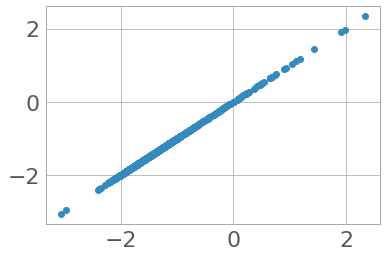

In [72]:
plt.scatter(BFM['betaP'],BFIGM['betaP'])